#1) Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stat
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
#Read the data
startups = pd.read_csv("50_Startups.csv")
startups.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

###EDA

In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [6]:
startups.isnull()

R&D Spend  Administration  Marketing Spend  State  Profit
0       False           False            False  False   False
1       False           False            False  False   False
2       False           False            False  False   False
3       False           False            False  False   False
4       False           False            False  False   False
5       False           False            False  False   False
6       False           False            False  False   False
7       False           False            False  False   False
8       False           False            False  False   False
9       False           False            False  False   False
10      False           False            False  False   False
11      False           False            False  False   False
12      False           False            False  False   False
13      False           False            False  False   False
14      False           False            False  False   False
15      False           False            False  False   False
16      False           False            False  False   False
17      False           False            False  False   False
18      False           False            False  False   False
19      False           False            False  False   False
20      False           False            False  False   False
21      False           False            False  False   False
22      False           False            False  False   False
23      False           False            False  False   False
24      False           False            False  False   False
25      False           False            False  False   False
26      False           False            False  False   False
27      False           False            False  False   False
28      False           False            False  False   False
29      False           False            False  False   False
30      False           False            False  False   False
31      False           False            False  False   False
32      False           False            False  False   False
33      False           False            False  False   False
34      False           False            False  False   False
35      False           False            False  False   False
36      False           False            False  False   False
37      False           False            False  False   False
38      False           False            False  False   False
39      False           False            False  False   False
40      False           False            False  False   False
41      False           False            False  False   False
42      False           False            False  False   False
43      False           False            False  False   False
44      False           False            False  False   False
45      False           False            False  False   False
46      False           False            False  False   False
47      False           False            False  False   False
48      False           False            False  False   False
49      False           False            False  False   False

In [7]:
#check for missing values
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startups.shape

(50, 5)

###Renaming Columns to make it short

In [9]:
startup= startups.rename({'R&D Spend':'RD_S', 'Administration':'Admin_S','Marketing Spend': 'MRKT_S'}, axis=1)
startup.head()

RD_S    Admin_S     MRKT_S       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

#independent and dependent variable
x(Independent) = dataset.iloc[ : , : -1].values  
[RD_s , Admin_s , MRK_S , State ]

y= dataset.iloc[: , -1].values   
[profit]               

##Visualization

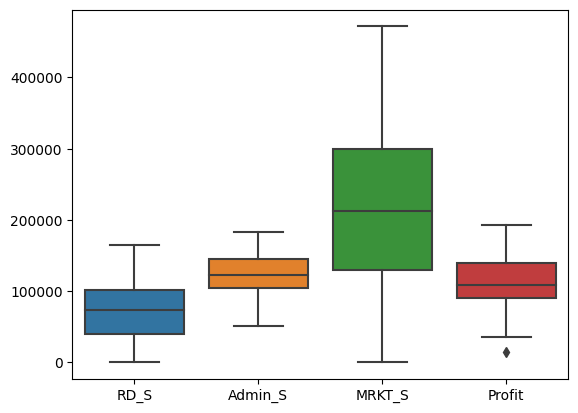

In [10]:
sns.boxplot(data = startup)
plt.show()

from the above bloxplot we can say there are Outliers in the Profit i.e our Dependent Variable, but there are no Outliers in our Independent variable(dependent feature)

 We need to handle the outliers the best way possible, Sometimes just removing the outliers from the dataset can stop or reduce the skewness but that will lead to loss of our data since our dataset is small


Lets try to find the Outliers in the Profit Dependent Variable

[Transforming the variables can also eliminate the outliers as the transform variables reduces the variation caused by the extreme values]

In [11]:
#to find the outlier in Profit

Q1 = np.quantile(startup.Profit,0.25)
Q3 = np.quantile(startup.Profit,0.75)
med = np.median(startup.Profit)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [12]:
Outliers = startup.Profit[(startup.Profit <= lower_bound) | (startup.Profit >= upper_bound)]
print('The Outlier in the boxplot is', Outliers)

The Outlier in the boxplot is 49    14681.4
Name: Profit, dtype: float64


In [13]:
startup.iloc[[49]]

RD_S   Admin_S    MRKT_S       State   Profit
49   0.0  116983.8  45173.06  California  14681.4

Transformation

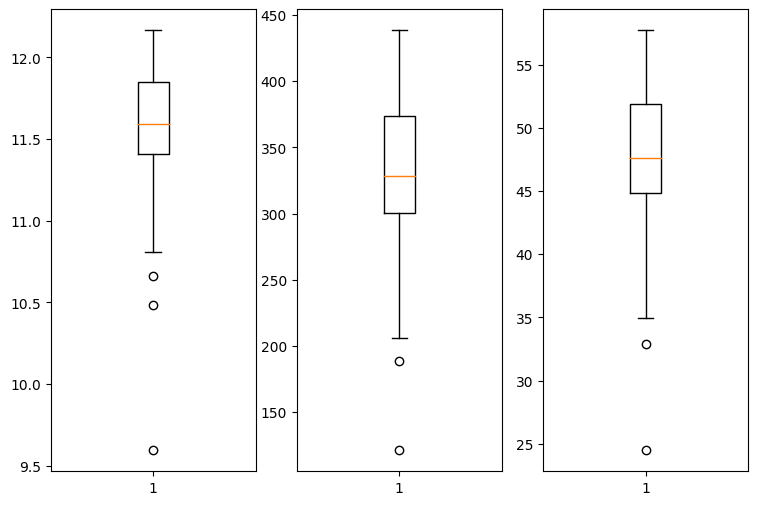

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(startup['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(startup['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(startup['Profit']))
plt.show()

Even after Transformation we cannot get rid of the Outlier, rather after transformation the number of outliers have increased


Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

R-squared measures the strength of the relationship between the model and the dependent variable on a 0 - 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

###Preapring Model

In [15]:
model = smf.ols("Profit~RD_S+Admin_S+MRKT_S",data =startup).fit()


In [16]:
# Calculating Values

print("Model Parameters\n" ,model.params,"\n")

#tvalues and pvalues
print("t values\n" ,model.tvalues)
print("P values\n" ,model.pvalues,"\n")

#R squared values
print("Rsquared Values :\n","r_squared value " , model.rsquared,"\n" , " r_squared_adj_value :",model.rsquared_adj,)

Model Parameters
 Intercept    50122.192990
RD_S             0.805715
Admin_S         -0.026816
MRKT_S           0.027228
dtype: float64 

t values
 Intercept     7.626218
RD_S         17.846374
Admin_S      -0.525507
MRKT_S        1.655077
dtype: float64
P values
 Intercept    1.057379e-09
RD_S         2.634968e-22
Admin_S      6.017551e-01
MRKT_S       1.047168e-01
dtype: float64 

Rsquared Values :
 r_squared value  0.9507459940683246 
  r_squared_adj_value : 0.9475337762901719


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        17:07:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_S           0.8057      0.045     17.846      0.000       0.715       0.897
Admin_S       -0.0268      0.051     -0.526      0.602      -0.130       0.076
MRKT_S         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Median Imputation to handle Outlier in Profit

In [18]:
startup.Profit.median()

107978.19

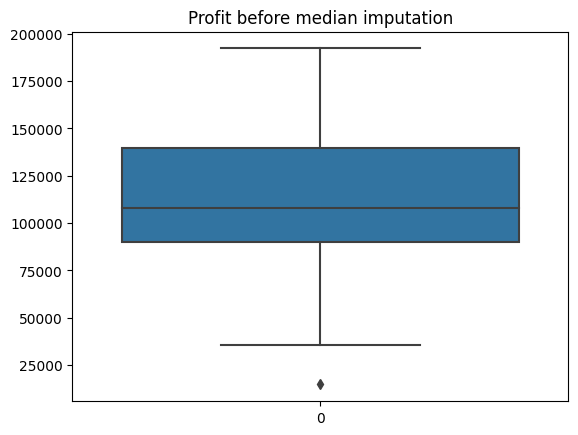

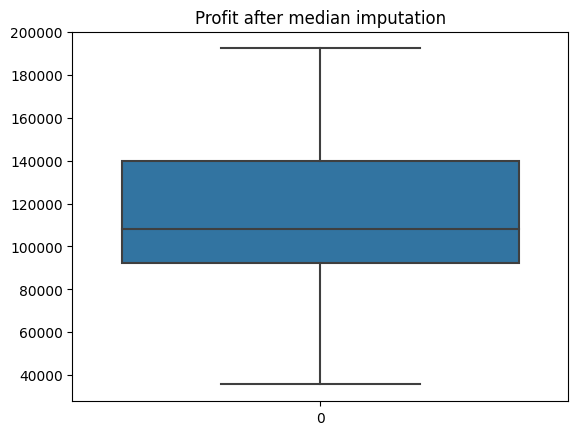

In [19]:
df = startup.copy()
sns.boxplot(df['Profit'])
plt.title('Profit before median imputation')
plt.show()

for i in df['Profit']:
    q1 = np.quantile(df.Profit,0.25)
    q3 = np.quantile(df.Profit,0.75)
    med = np.median(df.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df['Profit'] = df['Profit'].replace(i, np.median(df['Profit']))
sns.boxplot(df['Profit'])
plt.title('Profit after median imputation')
plt.show()

###testing  our data in model and compare the R-squared with  Median imputation data model

In [20]:
model_after_median_imputation = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = df).fit()
# Finding rsquared values
model_after_median_imputation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           5.06e-25
Time:                        17:07:16   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RD_S           0.7472      0.055     13.707      0.000       0.638       0.857
Admin_S       -0.0149      0.062     -0.242      0.810      -0.139       0.109
MRKT_S         0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the above result we can say median imputation the model is not performing well

###Mean Imputation to handle Outliers in Profit

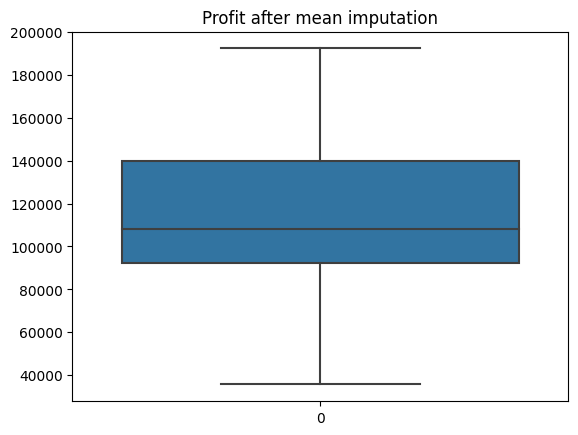

In [21]:
df1 = df.copy()
for i in df1['Profit']:
    q1 = np.quantile(df1.Profit,0.25)
    q3 = np.quantile(df1.Profit,0.75)
    med = np.median(df1.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Profit'] = df1['Profit'].replace(i, np.mean(df1['Profit']))
sns.boxplot(df1['Profit'])
plt.title('Profit after mean imputation')
plt.show()

In [22]:
#Let's test our data in model and compare the R-squared with Mean imputation data model

In [23]:
model_after_mean_imputation = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = df1).fit()
# Finding rsquared values
model_after_mean_imputation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           5.06e-25
Time:                        17:07:16   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RD_S           0.7472      0.055     13.707      0.000       0.638       0.857
Admin_S       -0.0149      0.062     -0.242      0.810      -0.139       0.109
MRKT_S         0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 As you can see after mean imputation the model is not performing well it got a little worse than the median one

Now we have to try something else to get out better results than the raw data
The best thing we can do is now to remove the outlier and see the results

In [24]:
data1 = startup.copy()
data1.drop([49], inplace = True)
data1

RD_S    Admin_S     MRKT_S       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73
48     542.05   51743.15       0.00    New York   35673.41

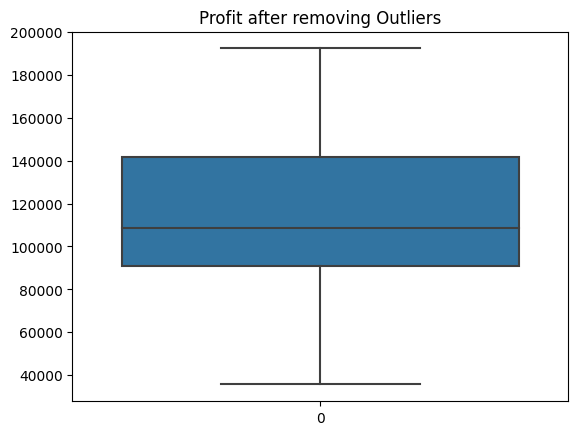

In [25]:
sns.boxplot(data1.Profit)
plt.title('Profit after removing Outliers')
plt.show()

testing  our data in model and compare the R-squared with and without imputation data models

In [26]:
model_after_removing_outlier = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = data1).fit()
# Finding rsquared values
model_after_removing_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           8.85e-32
Time:                        17:07:18   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_S           0.7830      0.038     20.470      0.000       0.706       0.860
Admin_S       -0.0222      0.043     -0.518      0.607      -0.109       0.064
MRKT_S         0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A Slightly better score than the other data models

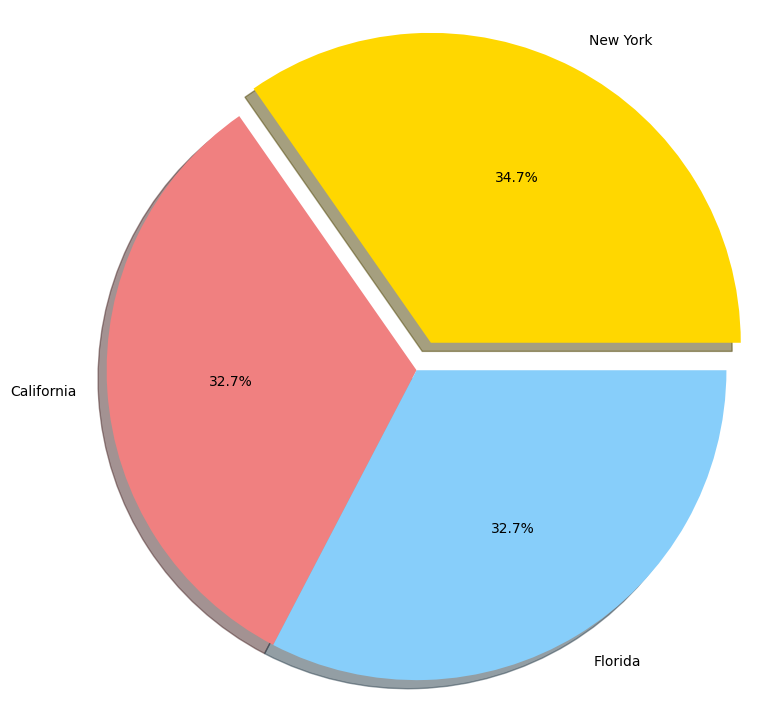

In [27]:
plt.figure(figsize = (9,9))
labels = ['New York','California','Florida']
colors = ['gold','lightcoral','lightskyblue']
explode = (0.1,0,0)
plt.pie(x = data1['State'].value_counts(),labels = labels, explode = explode, colors = colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

In [28]:
data1.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

In [29]:
#Visualizing the Relation between each Independent Feature with respect to the Dependent Feature

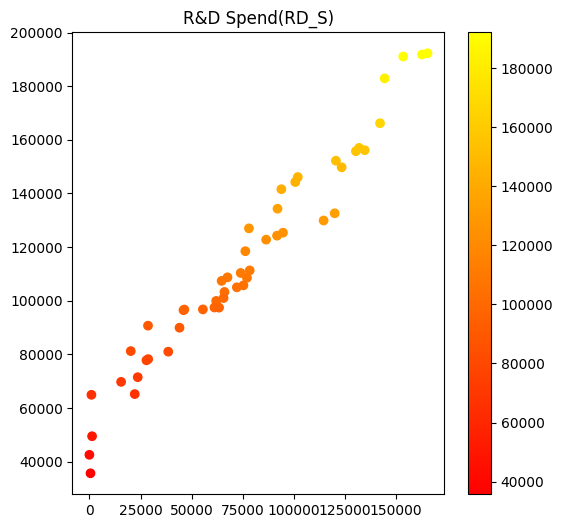

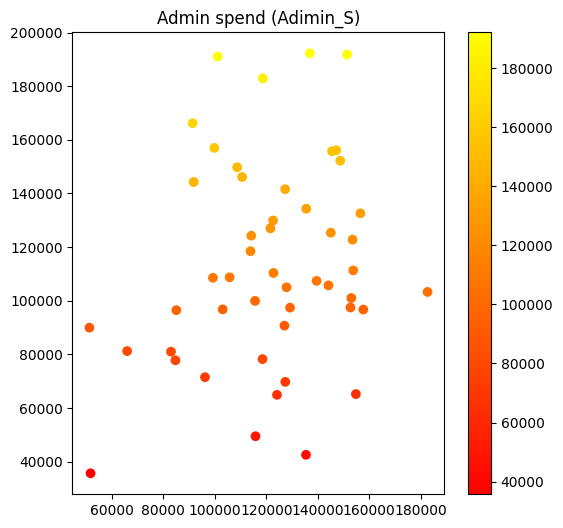

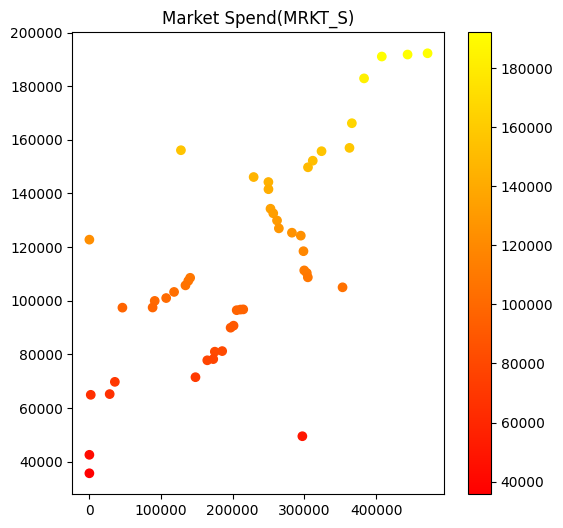

In [30]:
plt.figure(figsize = (6,6))
plt.scatter(x = data1['RD_S'], y = data1['Profit'], c = data1['Profit'],cmap = 'autumn')
plt.title('R&D Spend(RD_S)')
plt.colorbar()
plt.show()

plt.figure(figsize = (6,6))
plt.scatter(x = data1['Admin_S'], y = data1['Profit'], c = data1['Profit'],cmap = 'autumn')
plt.title('Admin spend (Adimin_S)')
plt.colorbar()
plt.show()

plt.figure(figsize = (6,6))
plt.scatter(x = data1['MRKT_S'], y = data1['Profit'], c = data1['Profit'],cmap = 'autumn')
plt.title('Market Spend(MRKT_S)')
plt.colorbar()
plt.show()



RD_S feature has a good linear relation with Profit as compare to other features

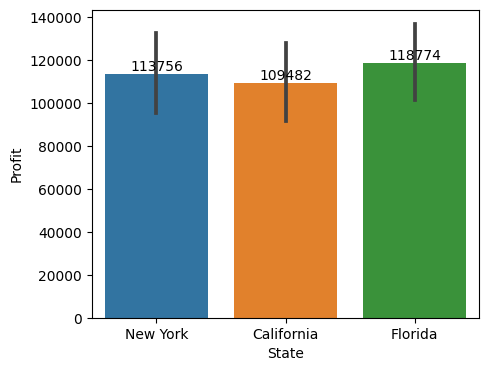

In [31]:
plt.figure(figsize =(5,4))
ax = sns.barplot(x = "State", y = "Profit", data = data1)
for i in ax.containers:
    ax.bar_label(i, fmt = '%g')

There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation

In [32]:
data2 = data1.copy()
data2 = data1.drop('State', axis = 1)
data2.head()

RD_S    Admin_S     MRKT_S     Profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

###Correlation Matrix

In [33]:
data2.corr()

RD_S   Admin_S    MRKT_S    Profit
RD_S     1.000000  0.243438  0.711654  0.978437
Admin_S  0.243438  1.000000 -0.037280  0.205841
MRKT_S   0.711654 -0.037280  1.000000  0.739307
Profit   0.978437  0.205841  0.739307  1.000000

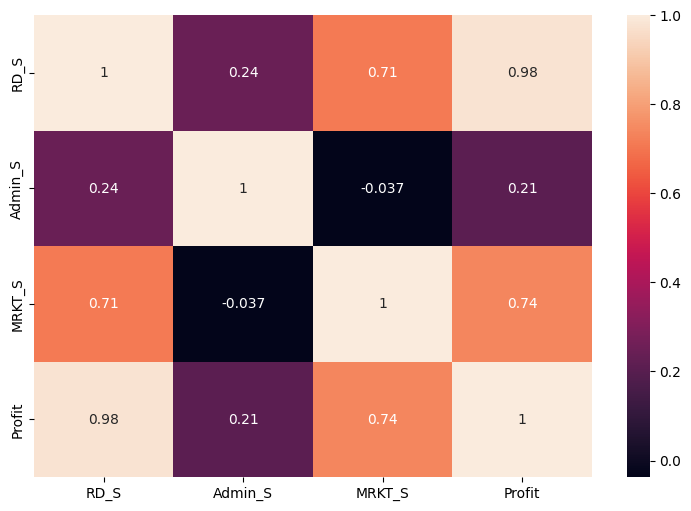

In [34]:
plt.figure(figsize = (9,6))
sns.heatmap(data2.corr(), annot = True)
plt.show()

###Pairplot

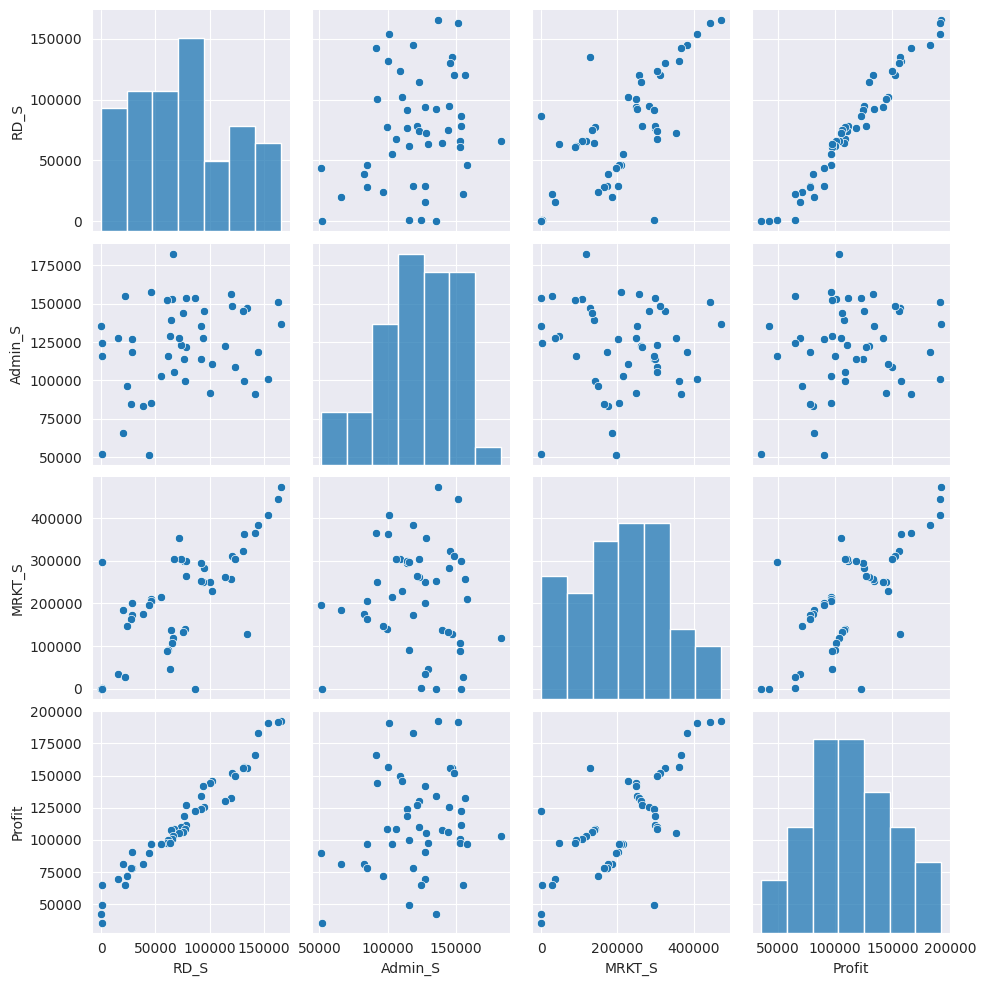

In [35]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data2)

RD_S has the highest score of correlation and the linear relation with Profit
Note: MRKT_S and RD_S also have a collinearity among themselves which will affect our model.


Feature Engineering
Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores


Applying Standard Scaler

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
x_scaled = x - mean/std_dev


However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data2.values)
scaled_features_df = pd.DataFrame(scaled_features, index = data2.index, columns = data2.columns)
scaled_features_df.head()

RD_S   Admin_S    MRKT_S    Profit
0  2.018325  0.552080  2.146120  2.071556
1  1.956704  1.069017  1.913596  2.059122
2  1.751650 -0.724297  1.613709  2.039490
3  1.548545 -0.098597  1.407457  1.823808
4  1.497818 -1.072513  1.265442  1.381401

Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [37]:
print(np.round(scaled_features_df.mean(),1),'\n',(np.round(scaled_features_df.std(),1)))

RD_S       0.0
Admin_S   -0.0
MRKT_S    -0.0
Profit    -0.0
dtype: float64 
 RD_S       1.0
Admin_S    1.0
MRKT_S     1.0
Profit     1.0
dtype: float64


For building Multi Linear Resgression there are assumption regarding the data set.

They are as follows:

Feature should be independent of each other there should'nt be any dependency upon each other

There shouldn't be any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)

Each Feature and Model Error (residuals) should be independent of each other

Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and should be independentally and identically distributed.

There should be a linear relation between the dependent variable and Independent variables

##Preparing a Model

In [38]:
model1 = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = scaled_features_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           8.85e-32
Time:                        17:07:38   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.419e-16      0.029  -4.84e-15      1.000      -0.059       0.059
RD_S           0.9254      0.045     20.470      0.000       0.834       1.017
Admin_S       -0.0165      0.032     -0.518      0.607      -0.080       0.048
MRKT_S         0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Model Testing
As ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)

Finding Coefficient Parameters (Beta0 and Beta1's values)

In [39]:
# Getting Coefficient Parameters
model1.params

Intercept   -1.419157e-16
RD_S         9.254411e-01
Admin_S     -1.646059e-02
MRKT_S       8.009988e-02
dtype: float64

Assupmtion for multi linear Regression fails

Feature should be independent of each other, there should'nt be any dependency upon each other

In [40]:
#tvalues and pvalues
display(np.round(model1.tvalues,3), np.round(model1.pvalues,3))

Intercept    -0.000
RD_S         20.470
Admin_S      -0.518
MRKT_S        1.825
dtype: float64

Intercept    1.000
RD_S         0.000
Admin_S      0.607
MRKT_S       0.075
dtype: float64

Here, (Intercept) Beta0 p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypothesis as Beta1≠0 (Some or significant Slope)



========================================================================
------------------------------------------------------------------------
Observation:
(Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

(RD_S) Beta1: tvalue=20.470, pvalue= 0.000

(Admin_S) Beta2: tvalue=-0.518, pvalue= 0.607

(MRKT_S) Beta3: tvalue=1.825, pvalue= 0.075

If (pvalue=0)<(α=0.05); Reject Null hyp.
Thus, X(RD_S) variable has good slope and variance w.r.t Y(profit) variable.

If (pvalue=0)>(α=0.05); We fail to reject Null hyp.
Thus, X1(admin) and X2(marketing) variable doesn't have good slope
.

###compare models by their R-Squared and p_values

#####**For  Admin_S**

In [41]:
model_admin = smf.ols("Profit~Admin_S", data = scaled_features_df).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Fri, 01 Sep 2023   Prob (F-statistic):              0.156
Time:                        17:07:38   Log-Likelihood:                -68.467
No. Observations:                  49   AIC:                             140.9
Df Residuals:                      47   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.143  -1.48e-15      1.000      -0.287       0.287
Admin_S        0.2058      0.143      1.442      0.156      -0.081       0.493
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#tvalues and pvalues
display(np.round(model_admin.tvalues,3), np.round(model_admin.pvalues,3))

Intercept   -0.000
Admin_S      1.442
dtype: float64

Intercept    1.000
Admin_S      0.156
dtype: float64

(Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

(Admin_S) Beta1: tvalue=1.442, pvalue= 0.156

If (pvalue=0)<(α=0.05); Reject Null hyp.

If (pvalue=0)>(α=0.05); We fail to reject Null hyp.

Thus, X(Admin_S) variable doesn't has good slope

#####**For  MRKT_S**

In [43]:
model_mrkt = smf.ols("Profit~MRKT_S", data = scaled_features_df).fit()
model_mrkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.30e-09
Time:                        17:07:38   Log-Likelihood:                -50.150
No. Observations:                  49   AIC:                             104.3
Df Residuals:                      47   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.098  -2.15e-15      1.000      -0.198       0.198
MRKT_S         0.7393      0.098      7.527      0.000       0.542       0.937
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#tvalues and pvalues
display(np.round(model_mrkt.tvalues,3), np.round(model_mrkt.pvalues,3))

Intercept   -0.000
MRKT_S       7.527
dtype: float64

Intercept    1.0
MRKT_S       0.0
dtype: float64

Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

(marketing) Beta1: tvalue=7.527, pvalue= 0.0

If (pvalue=0)<(α=0.05); Reject Null hyp.
Thus, X(marketing) variable has good slope


If (pvalue=0)>(α=0.05); We fail to reject Null hypothesis

## if we combine admin and marketing feature to predict profit we should get a total R-sqaure value of 58% right?


In [45]:
model_admin_plus_marketing= smf.ols('Profit~Admin_S+MRKT_S', data =scaled_features_df).fit()
# Finding rsquared values
model_admin_plus_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           6.59e-10
Time:                        17:07:38   Log-Likelihood:                -47.010
No. Observations:                  49   AIC:                             100.0
Df Residuals:                      46   BIC:                             105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.093  -2.27e-15      1.000      -0.187       0.187
Admin_S        0.2337      0.093      2.508      0.016       0.046       0.421
MRKT_S         0.7480      0.093      8.027      0.000       0.560       0.936
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To build two model in each model one of the feature will not be present and then we will come to an conclusion to remove the unnecessary feature by comparing the model parameter

In [46]:
model_admin_plus_RD = smf.ols('Profit~RD_S+Admin_S', data= scaled_features_df).fit()
model_admin_plus_RD.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.69e-32
Time:                        17:07:38   Log-Likelihood:                 8.4042
No. Observations:                  49   AIC:                            -10.81
Df Residuals:                      46   BIC:                            -5.133
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.030  -7.03e-15      1.000      -0.060       0.060
RD_S           0.9868      0.031     31.847      0.000       0.924       1.049
Admin_S       -0.0344      0.031     -1.110      0.273      -0.097       0.028
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

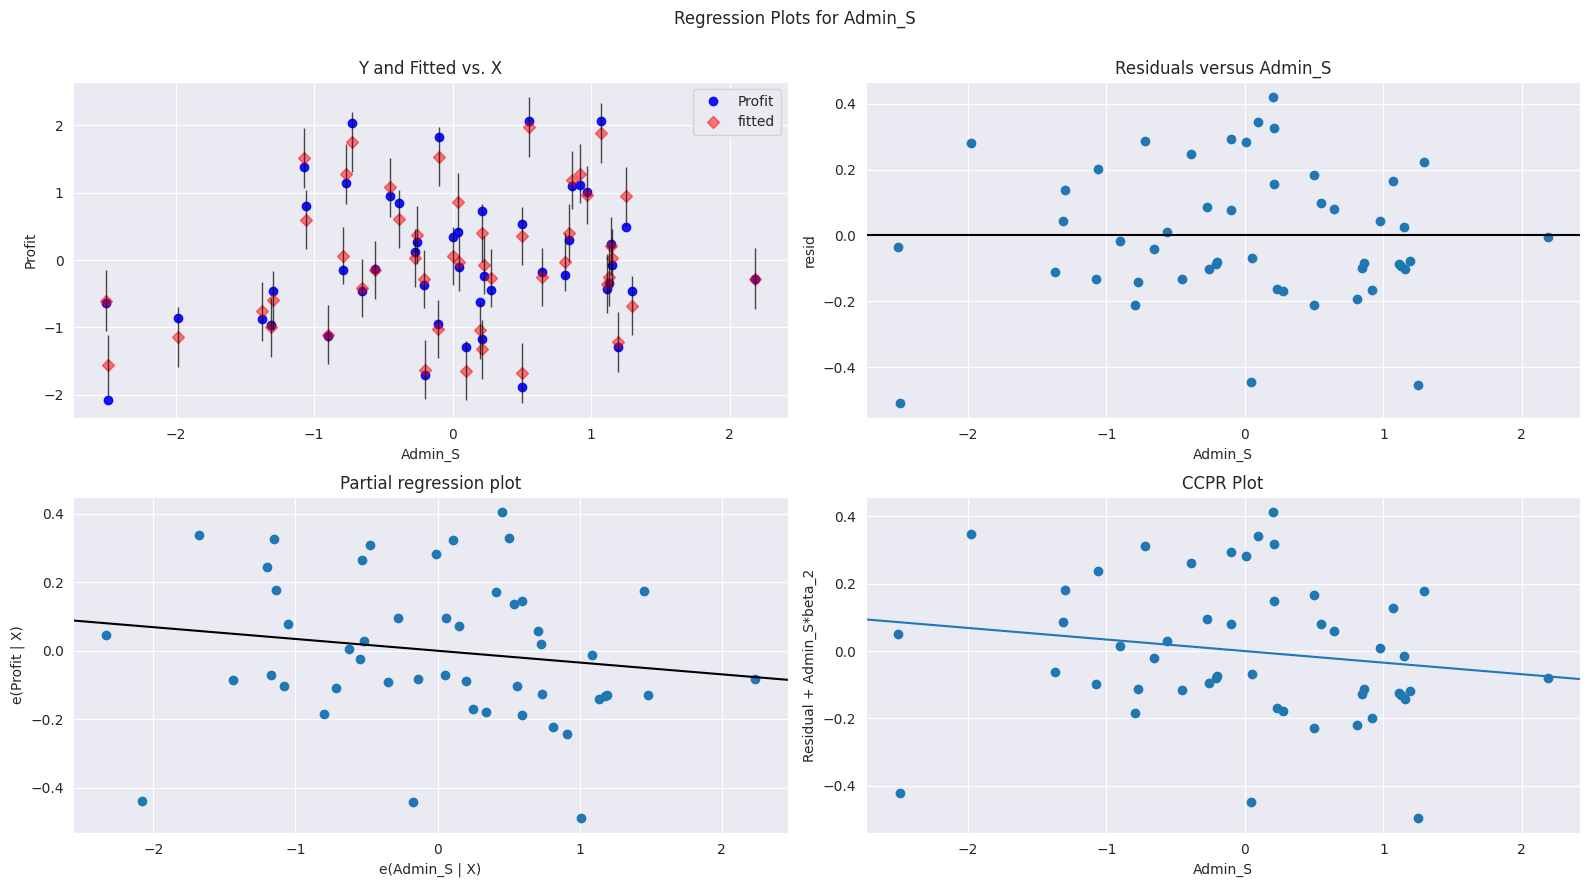

In [47]:
import statsmodels.api as sm

fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_admin_plus_RD,'Admin_S', fig = fig)
plt.show()

In [48]:
model_mrkt_plus_RD = smf.ols("Profit~RD_S+MRKT_S", data = scaled_features_df).fit()
model_mrkt_plus_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.74e-33
Time:                        17:07:41   Log-Likelihood:                 10.009
No. Observations:                  49   AIC:                            -14.02
Df Residuals:                      46   BIC:                            -8.342
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.029  -7.26e-15      1.000      -0.059       0.059
RD_S           0.9164      0.041     22.136      0.000       0.833       1.000
MRKT_S         0.0871      0.041      2.104      0.041       0.004       0.170
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

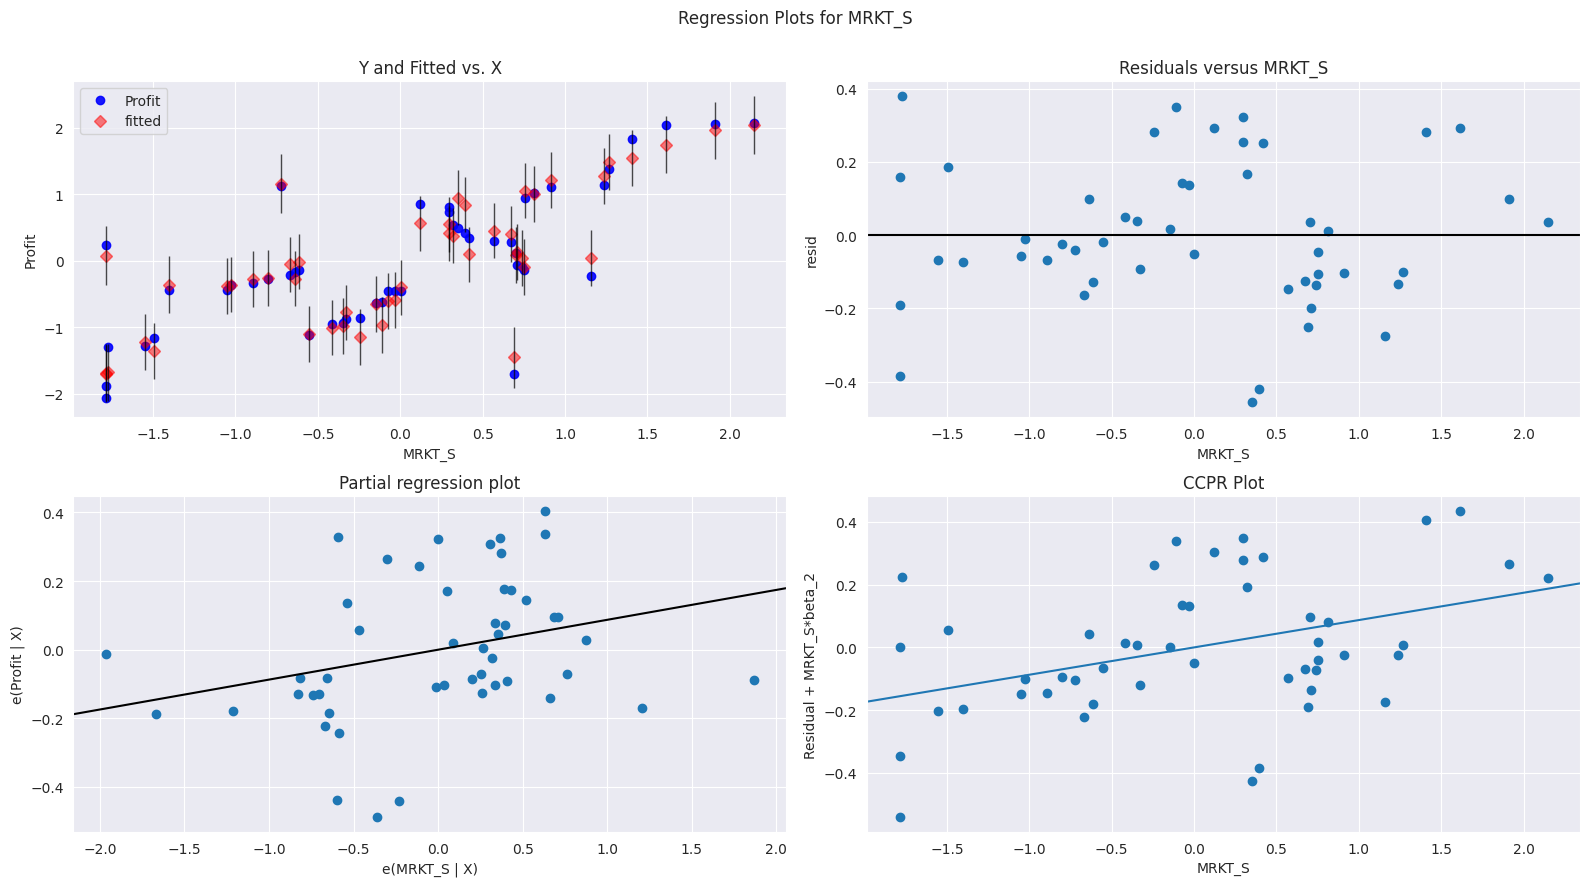

In [49]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_mrkt_plus_RD,'MRKT_S', fig = fig)
plt.show()

In [50]:
model_only_RD = smf.ols("Profit~RD_S", data = scaled_features_df).fit()
model_only_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           7.56e-34
Time:                        17:07:42   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.030  -7.01e-15      1.000      -0.061       0.061
RD_S           0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All our Assumptions are satisfied by the above model

Feature should be independent of each other there should'nt be any dependency upon each other

It is satisfied by the model using Marketing feature

While building a model using Marketing we got better results better AIC, BIC,

R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics

score by comparing it with the model in which Adminstration feature was used.

In [51]:
#compare the residuals of both the models to come up with an conclusion

###Model Validation

Comparing different models with respect to their Root Mean Squared Errors

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model's predicted target value and the actual target value.

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data2.columns

Index(['RD_S', 'Admin_S', 'MRKT_S', 'Profit'], dtype='object')

###Using all features

In [53]:
x = data2.drop('Profit', axis = 1).values
y = data2.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x:  (49, 3)
Shape of y: (49, 1)
Shape of X_train:  (36, 3)
Shape of X_test:  (13, 3)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [54]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [55]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9059814869956572
R2_score (train):  0.9650197585709105
R2_score (test):  0.9341582772336136
RMSE using all features:  8385.783571480788


**RD_S and MRKT_S Feature**

In [56]:
x = data2.drop(['Profit','Admin_S'],axis=1).values
y = data2.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x:  (49, 2)
Shape of y: (49, 1)
Shape of X_train:  (36, 2)
Shape of X_test:  (13, 2)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [57]:

from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [58]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_rnd_and_marketing_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_rnd_and_marketing_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_RnD_and_marketing = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_and_marketing_train)
print('R2_score (test): ', r2_score_rnd_and_marketing_test)
print("RMSE using RnD and Marketing feature: ", rmse_linear_using_RnD_and_marketing)

CV:  0.9114070932851247
R2_score (train):  0.9643536571553787
R2_score (test):  0.939185037123506
RMSE using RnD and Marketing feature:  8059.317765282762


### **only RD_S feature**

In [59]:
x = data2.iloc[:,:1].values
y = data2.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)


# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x:  (49, 1)
Shape of y: (49, 1)
Shape of X_train:  (36, 1)
Shape of X_test:  (13, 1)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [60]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear_using_rnd = LinearRegression()
regressor_linear_using_rnd.fit(x_train_scal, y_train_scal)

LinearRegression()

In [61]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear_using_rnd, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear_using_rnd.predict(x_train_scal)
r2_score_rnd_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear_using_rnd.predict(x_test_scal)
r2_score_rnd_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE on Test set results
rmse_linear_using_only_RnD = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_train)
print('R2_score (test): ', r2_score_rnd_test)
print("RMSE using only RnD feature: ", rmse_linear_using_only_RnD)

CV:  0.8900789292733178
R2_score (train):  0.957733077239081
R2_score (test):  0.9521017609333128
RMSE using only RnD feature:  7152.417057875889


compare the Root Mean Squared Error and check for the minimum value

In [62]:
rmse_linear_1 = rmse_linear_using_all_features
rmse_linear_2 = rmse_linear_using_RnD_and_marketing
rmse_linear_3 = rmse_linear_using_only_RnD


rmse_compare = {'Using All Features Model': rmse_linear_1,
                'Using RnD and Marketing Feature Model': rmse_linear_2,
                'Using only R&D Feauture Model': rmse_linear_3}
min(rmse_compare, key=rmse_compare.get)

'Using only R&D Feauture Model'

The Model that was build without using Administration and Marketing feature performed very well.

Scoring minimumn Root mean squared error and maximum R-squared and adjusted R-squared and highest linear relation

For further We are going to use the model which was build by using only R&D feature

#####**For  RD_S**

In [63]:
finalmodel_rd = smf.ols("Profit~RD_S", data = scaled_features_df).fit()
finalmodel_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           7.56e-34
Time:                        17:07:43   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.030  -7.01e-15      1.000      -0.061       0.061
RD_S           0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

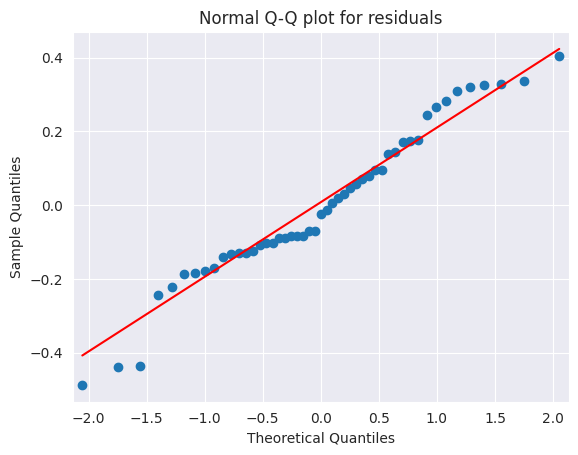

In [64]:
# Residual values = y - yhat
sm.qqplot(finalmodel_rd.resid, line = 'q')
plt.title("Normal Q-Q plot for residuals")
plt.show()

 Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

##Residual plot for Homoscedasticity

In [65]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

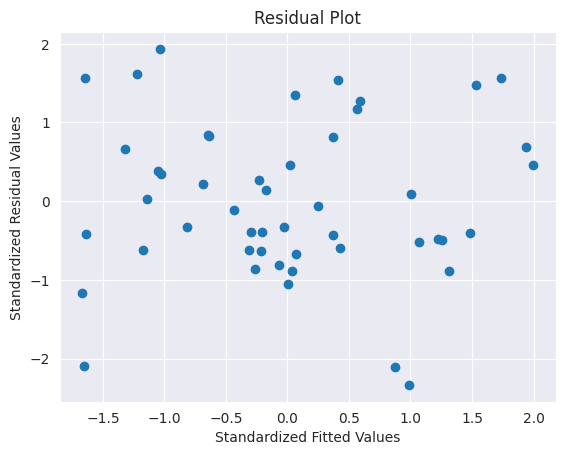

In [66]:
plt.scatter(get_standardized_values(finalmodel_rd.fittedvalues), get_standardized_values(finalmodel_rd.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Constant Variance (Homoscedasticity) in Error

###**Residual** **VS** **Regressors**

Plotting to visualize the partial relation of each independent features with the Dependent variable and errors

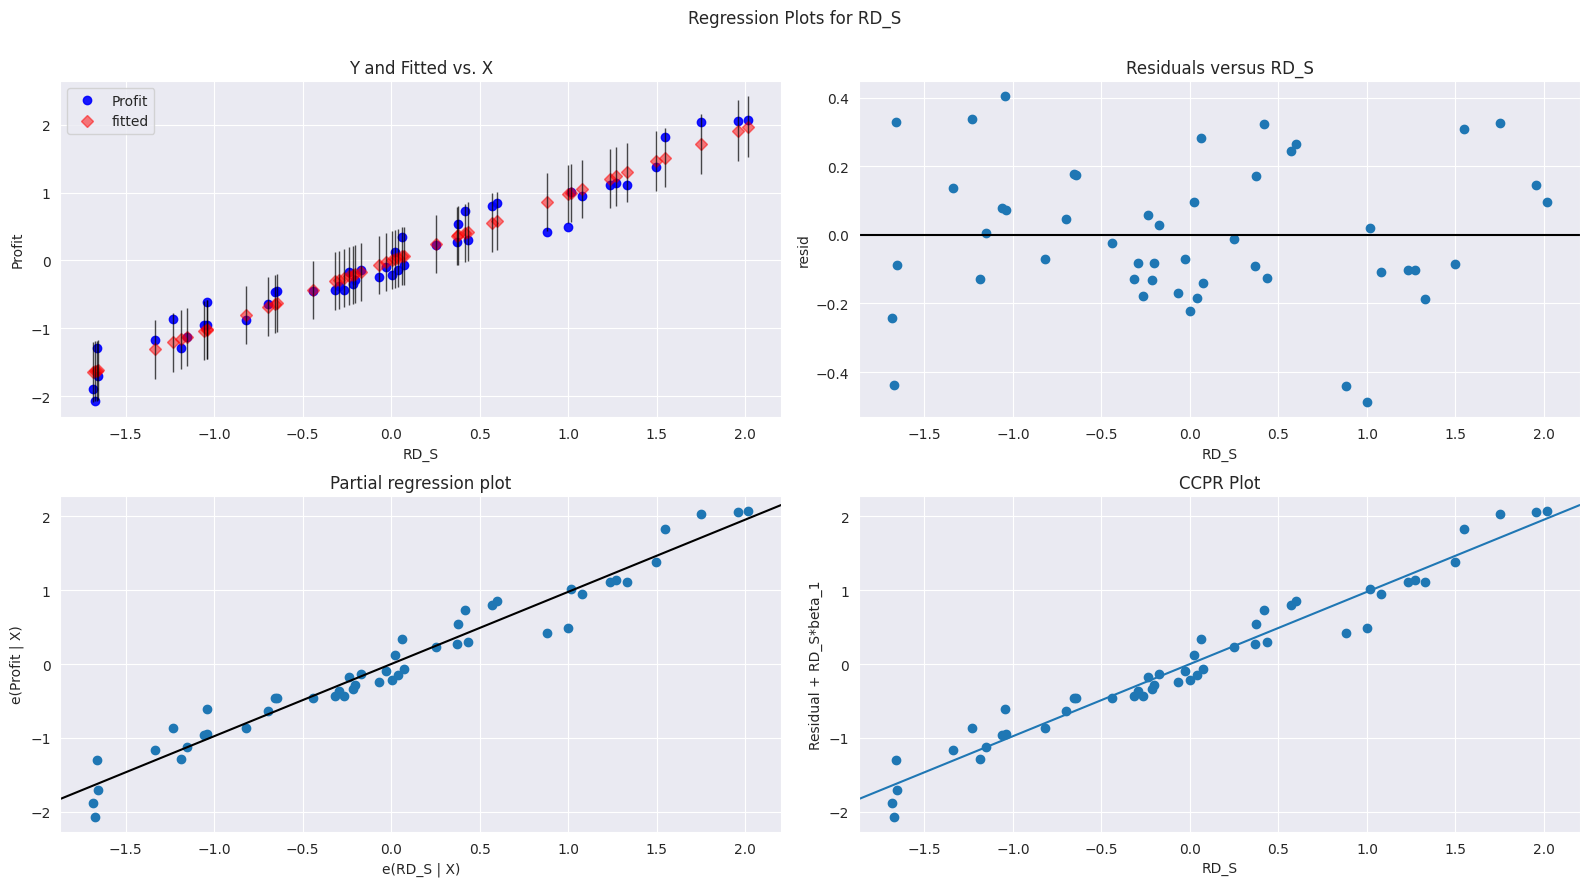

In [67]:
fig = plt.figure(figsize = (16,9))
plot_RD = sm.graphics.plot_regress_exog(finalmodel_rd,'RD_S', fig=fig)
plt.show()

Each Feature and Model Error (residuals) should be independent of each other

There should be a linear relation between the dependent variable and Independent variables

All our assumptions are satisfied. Hence, we can say our model is a good model let us test more to make it even better

## **Detecting Influencers/Outliers in the Model**

### Cook's Distance

In [68]:
influence_points=finalmodel_rd.get_influence()
c, p_value=influence_points.cooks_distance

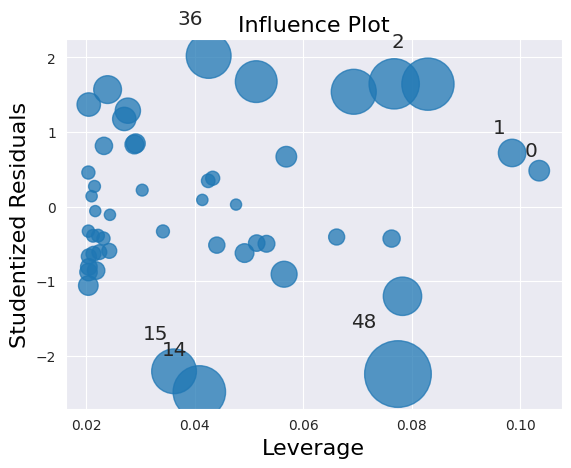

In [69]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(finalmodel_rd)
plt.show()

In [70]:
#Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints


k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


plot the influencers and also plot a cut off line using the stem plot

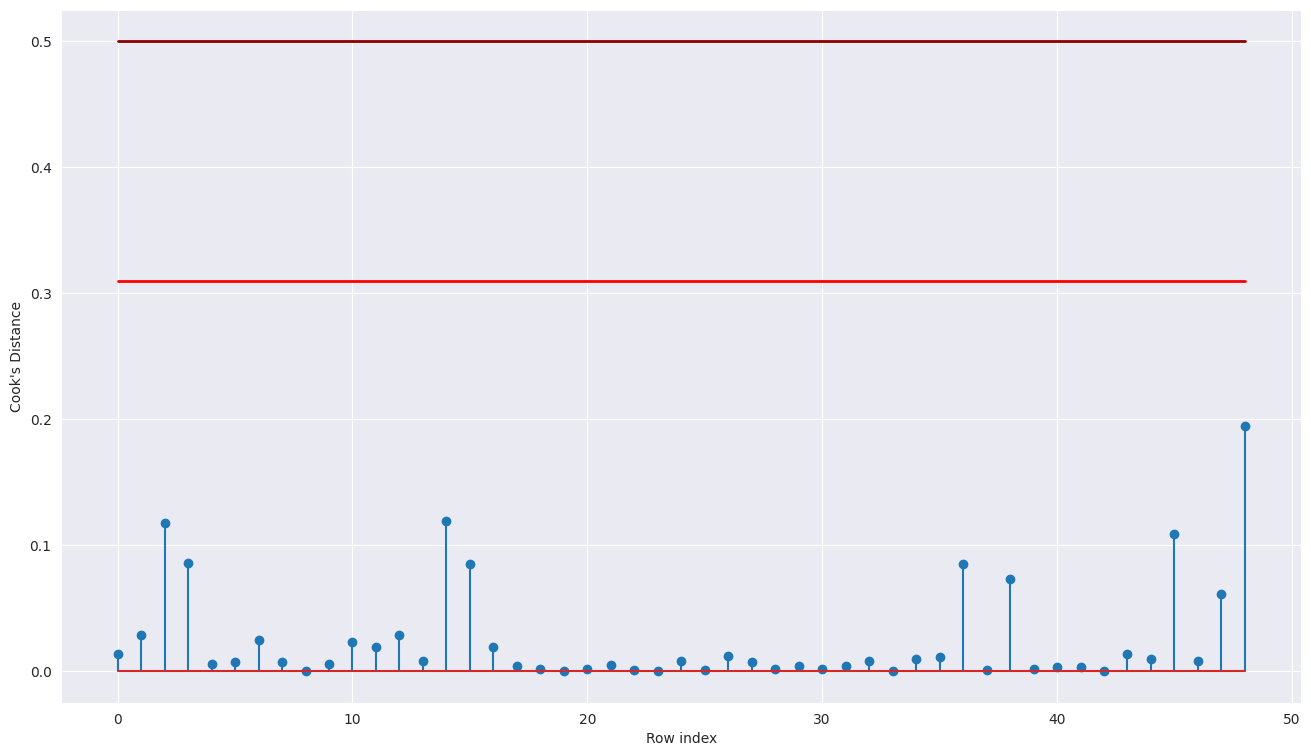

In [71]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

All the points are below our cut-off line
Hence, we can say that there are no influncers present in our model we can proceed with the predictions

### **Predicting values (from Model using same dataset)**

In [72]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(data2.values.reshape(-1,1))

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

prediction_unscaled = transformer_y.inverse_transform(prediction)
predicted = pd.DataFrame(prediction_unscaled, columns=['Predicted_Profit'])
predicted['Profit'] = data2.Profit
predicted['RD_S'] = data2.RD_S
predicted

Predicted_Profit     Profit       RD_S
0       188741.633166  192261.83  165349.20
1       165165.693431  191792.06  162597.70
2       442665.543246  191050.39  153441.51
3       211042.488062  182901.99  144372.41
4       186461.632949  166187.94  142107.34
..                ...        ...        ...
191      86993.489143        NaN        NaN
192      52176.000671        NaN        NaN
193      94603.229137        NaN        NaN
194      51726.836899        NaN        NaN
195      81287.215802        NaN        NaN

[196 rows x 3 columns]

R^2 value for each prepared model

In [73]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Using All Features Model','Using RnD and Marketing Feature Model','Using only R&D Feauture Model'],
        'R_squared':[model.rsquared,model_after_median_imputation.rsquared,model_after_mean_imputation.rsquared,model_after_removing_outlier.rsquared,r2_score_all_feature_train,r2_score_rnd_and_marketing_train,r2_score_rnd_train],
        'R_squared_adjusted':[model.rsquared_adj,model_after_median_imputation.rsquared_adj,model_after_mean_imputation.rsquared_adj,model_after_removing_outlier.rsquared_adj,model.rsquared_adj,model_mrkt.rsquared_adj,model_only_RD.rsquared_adj],
       'RMSE':[np.sqrt(model.mse_resid),np.sqrt(model_after_median_imputation.mse_resid),np.sqrt(model_after_mean_imputation.mse_resid),np.sqrt(model_after_removing_outlier.mse_resid),rmse_linear_using_all_features,rmse_linear_using_RnD_and_marketing,rmse_linear_using_only_RnD]}
model_table=pd.DataFrame(models)
model_table

Different_Models  R_squared  R_squared_adjusted  \
0                               Raw_data   0.950746            0.947534   
1              Median_Imputation_Outlier   0.918296            0.912967   
2                Mean_Imputation_outlier   0.918296            0.912967   
3                        Removed_outlier   0.961316            0.958737   
4               Using All Features Model   0.965020            0.947534   
5  Using RnD and Marketing Feature Model   0.964354            0.536927   
6          Using only R&D Feauture Model   0.957733            0.956432   

           RMSE  
0   9232.334837  
1  11148.345424  
2  11148.345424  
3   7753.807752  
4   8385.783571  
5   8059.317765  
6   7152.417058

Visualizing Models Performance

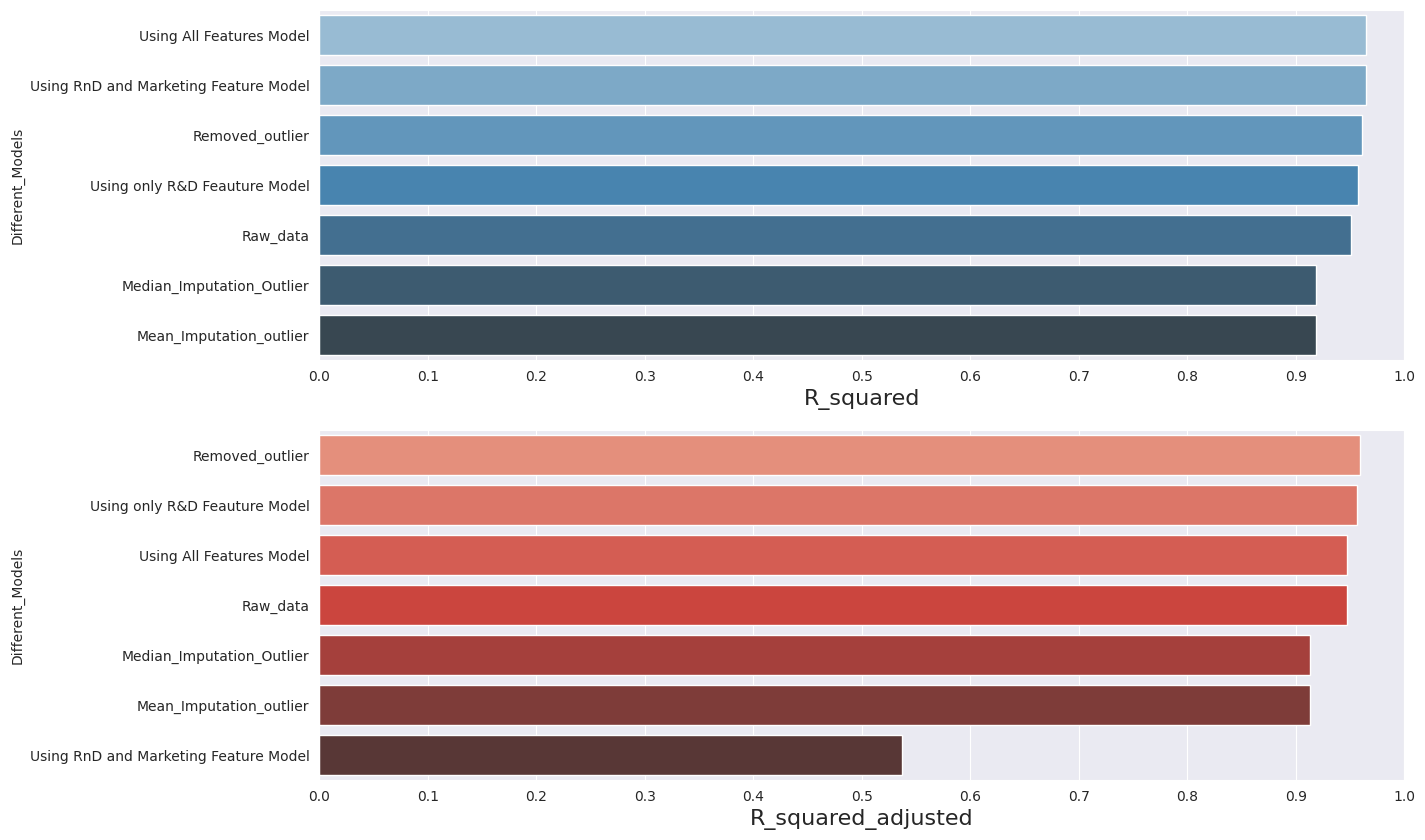

In [74]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

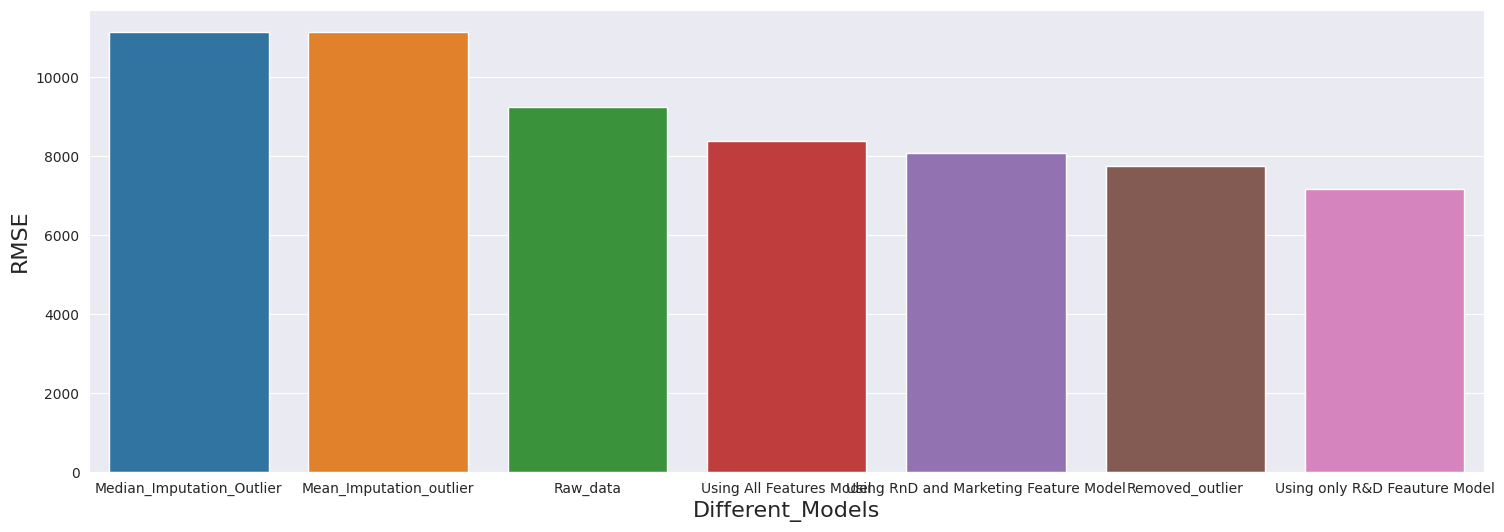

In [75]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

#2)Consider only the below columns and prepare a prediction model for predicting Price.

###Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
Model -- model of the car

Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

Mfg_Month -- Manufacturing month (1-12)

Mfg_Year -- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color -- Metallic Color? (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic -- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders -- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0)

Guarantee_Period -- Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag (Yes=1, No=0)

Airbag_2 -- Passenger Airbag (Yes=1, No=0)

Airco -- Airconditioning (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning (Yes=1, No=0)

Boardcomputer -- Boardcomputer (Yes=1, No=0)

CD_Player -- CD Player (Yes=1, No=0)

Central_Lock -- Central Lock (Yes=1, No=0)

Powered_Windows -- Powered Windows (Yes=1, No=0)

Power_Steering -- Power Steering (Yes=1, No=0)

Radio -- Radio (Yes=1, No=0)

Mistlamps -- Mistlamps (Yes=1, No=0)

Sport_Model -- Sport Model (Yes=1, No=0)

Backseat_Divider -- Backseat Divider (Yes=1, No=0)

Metallic_Rim --Metallic Rim (Yes=1, No=0)

Radio_cassette -- Radio Cassette (Yes=1, No=0)

Tow_Bar -- Tow Bar (Yes=1, No=0)

In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [77]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [78]:
#Read the data
corolla=pd.read_csv("ToyotaCorolla.csv",encoding = ('ISO-8859-1'))
corolla.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

##EDA

In [79]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [80]:
corolla.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [81]:
corolla.isnull()

Id  Model  Price  Age_08_04  Mfg_Month  Mfg_Year     KM  Fuel_Type  \
0     False  False  False      False      False     False  False      False   
1     False  False  False      False      False     False  False      False   
2     False  False  False      False      False     False  False      False   
3     False  False  False      False      False     False  False      False   
4     False  False  False      False      False     False  False      False   
...     ...    ...    ...        ...        ...       ...    ...        ...   
1431  False  False  False      False      False     False  False      False   
1432  False  False  False      False      False     False  False      False   
1433  False  False  False      False      False     False  False      False   
1434  False  False  False      False      False     False  False      False   
1435  False  False  False      False      False     False  False      False   

         HP  Met_Color  ...  Central_Lock  Powered_Windows  Power_Steering  \
0     False      False  ...         False            False           False   
1     False      False  ...         False            False           False   
2     False      False  ...         False            False           False   
3     False      False  ...         False            False           False   
4     False      False  ...         False            False           False   
...     ...        ...  ...           ...              ...             ...   
1431  False      False  ...         False            False           False   
1432  False      False  ...         False            False           False   
1433  False      False  ...         False            False           False   
1434  False      False  ...         False            False           False   
1435  False      False  ...         False            False           False   

      Radio  Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
0     False      False        False             False         False   
1     False      False        False             False         False   
2     False      False        False             False         False   
3     False      False        False             False         False   
4     False      False        False             False         False   
...     ...        ...          ...               ...           ...   
1431  False      False        False             False         False   
1432  False      False        False             False         False   
1433  False      False        False             False         False   
1434  False      False        False             False         False   
1435  False      False        False             False         False   

      Radio_cassette  Tow_Bar  
0              False    False  
1              False    False  
2              False    False  
3              False    False  
4              False    False  
...              ...      ...  
1431           False    False  
1432           False    False  
1433           False    False  
1434           False    False  
1435           False    False  

[1436 rows x 38 columns]

In [82]:
#check for missing values
corolla.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [83]:
corolla.shape

(1436, 38)

In [84]:
n_data=corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
n_data

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

##Renaming Columns to make it short

In [85]:
n_data=n_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
n_data

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [86]:
n_data.describe()

Price          Age             KM           HP           CC  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears           QT      Weight  
count  1436.000000  1436.000000  1436.000000  1436.00000  
mean      4.033426     5.026462    87.122563  1072.45961  
std       0.952677     0.188510    41.128611    52.64112  
min       2.000000     3.000000    19.000000  1000.00000  
25%       3.000000     5.000000    69.000000  1040.00000  
50%       4.000000     5.000000    85.000000  1070.00000  
75%       5.000000     5.000000    85.000000  1085.00000  
max       5.000000     6.000000   283.000000  1615.00000

##independent and dependent variable

###x(Independent) = dataset.iloc[ : , 1:].values
[ Age KM HP CC Doors Gears QT Weight ]

y= dataset.iloc[: , 1].values
[Price]

##Visualization

<Axes: >

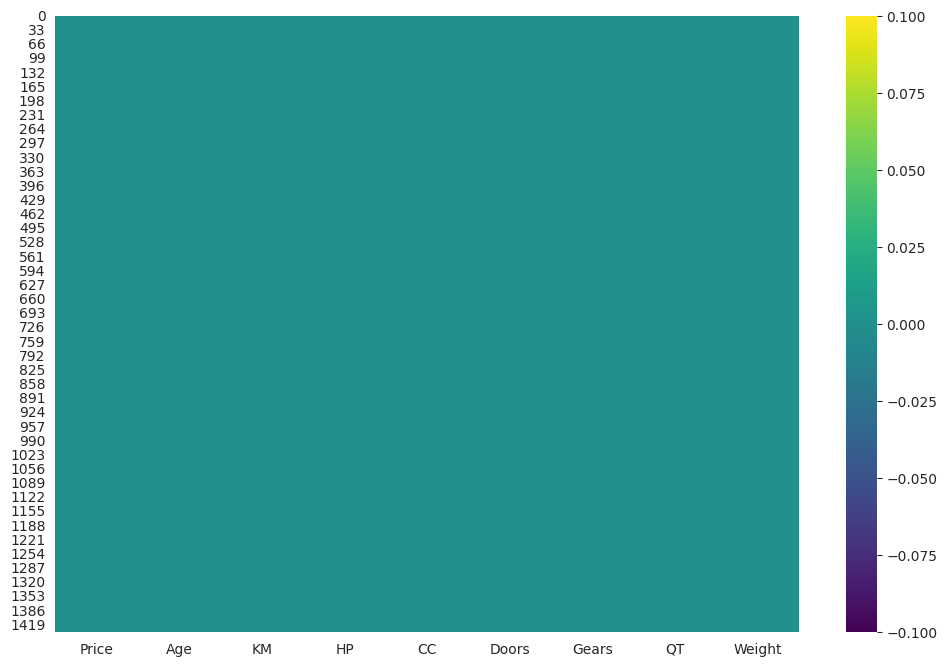

In [87]:
#Visualising missing Values
plt.figure(figsize=(12,8))
sns.heatmap(n_data.isnull(),cmap='viridis')

Feature 'HP' has missing Values in the data set

We will have to handle the missing values by observing the distribution and making the optimal choice

In [88]:
n_data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

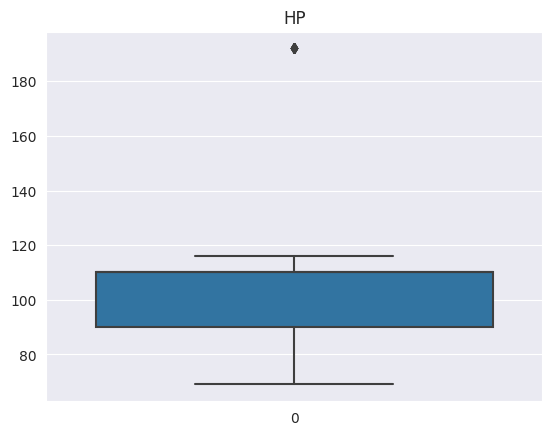

In [89]:
sns.boxplot(n_data['HP'])
plt.title('HP')
plt.show()

<Axes: >

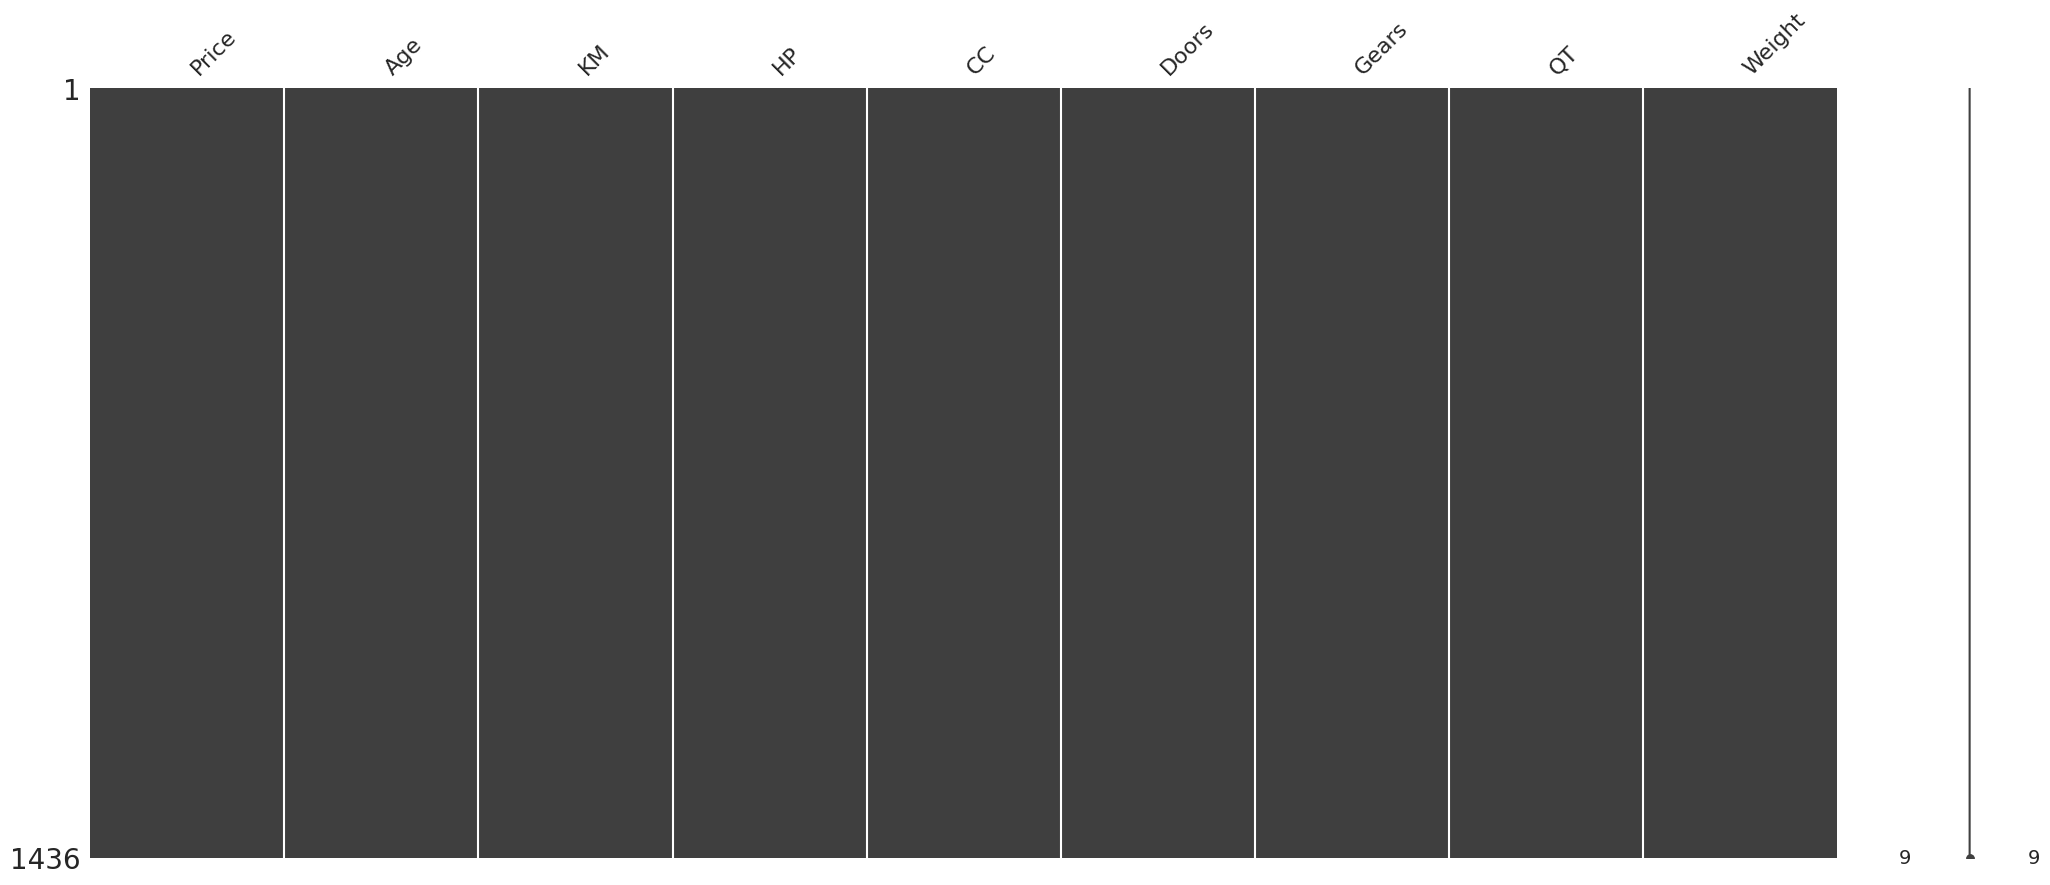

In [90]:
mn.matrix(n_data)

After checking above there is no null value present in the dataset

In [91]:
#Checking for Duplicates
n_data[n_data.duplicated()].shape

(1, 9)

In [92]:
n_data[n_data.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

There are duplicated values in the dataset Hence, we dropped those values

In [93]:
#checking discrete and continuous feature are their in our dataset by seperating them in variables
discrete_feature=[feature for feature in n_data.columns if len(n_data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))



continuous_feature=[feature for feature in n_data.columns if n_data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Discrete Variables Count: 5
Continuous Feature Count 4


##Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [94]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

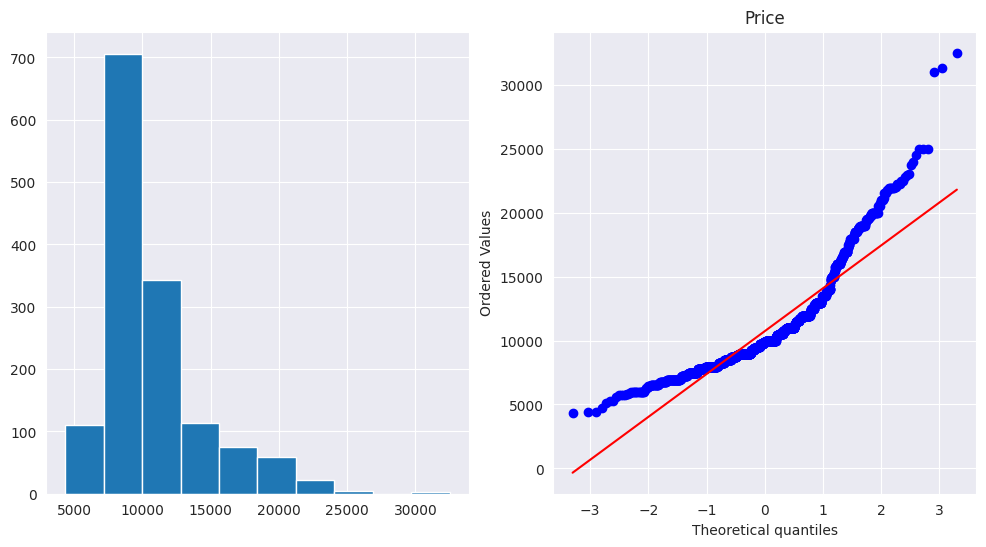

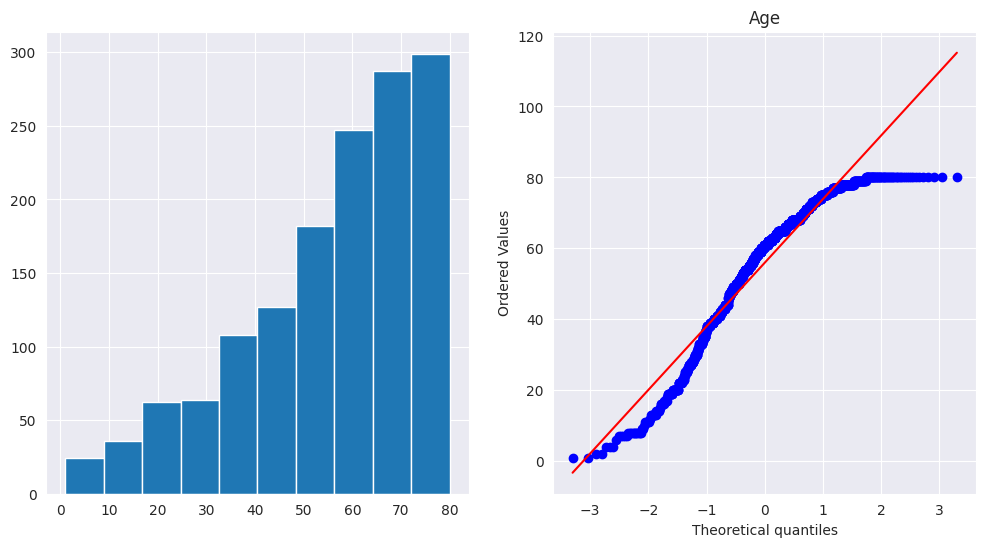

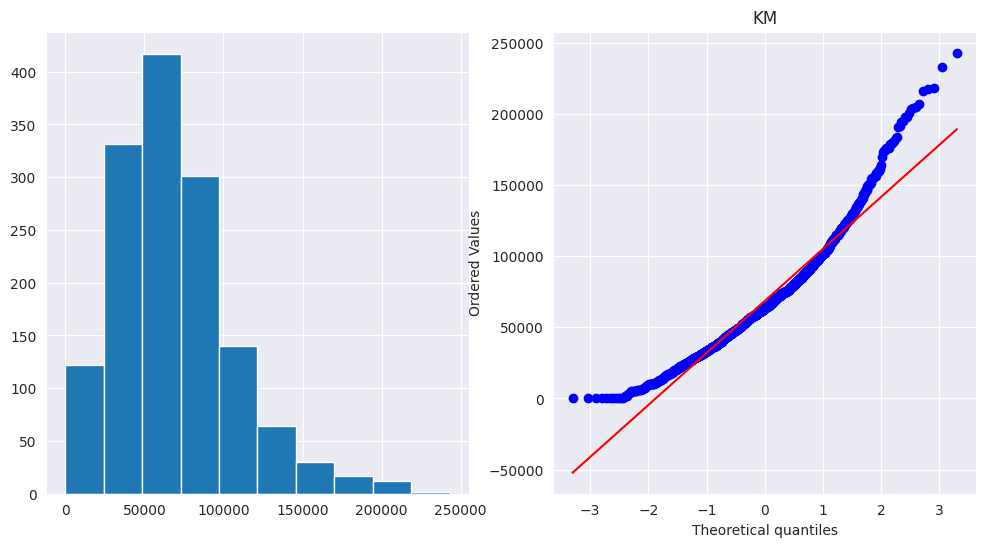

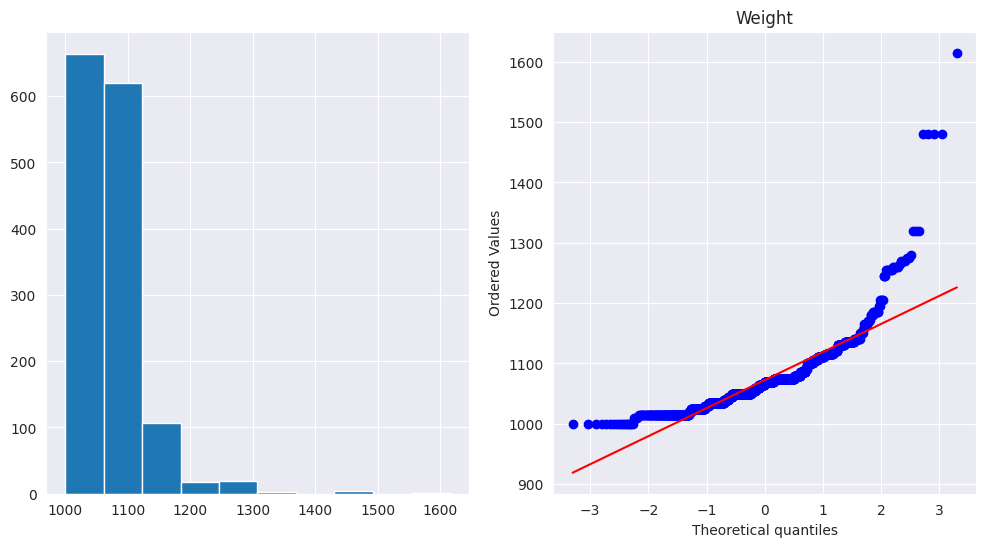

In [95]:
plot_data(n_data,'Price')
plt.title('Price')
plot_data(n_data,'Age')
plt.title('Age')
plot_data(n_data,'KM')
plt.title('KM')
plot_data(n_data,'Weight')
plt.title('Weight')

##Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

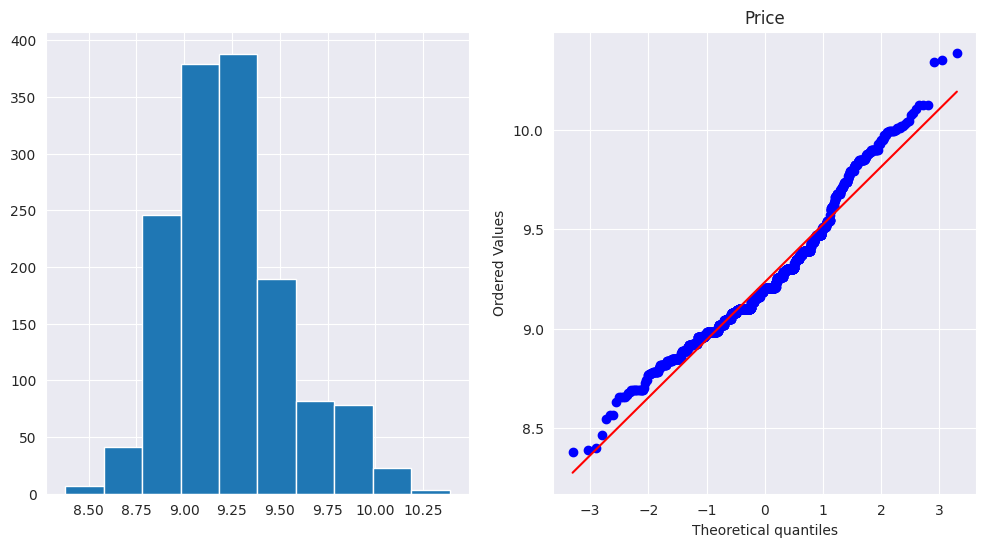

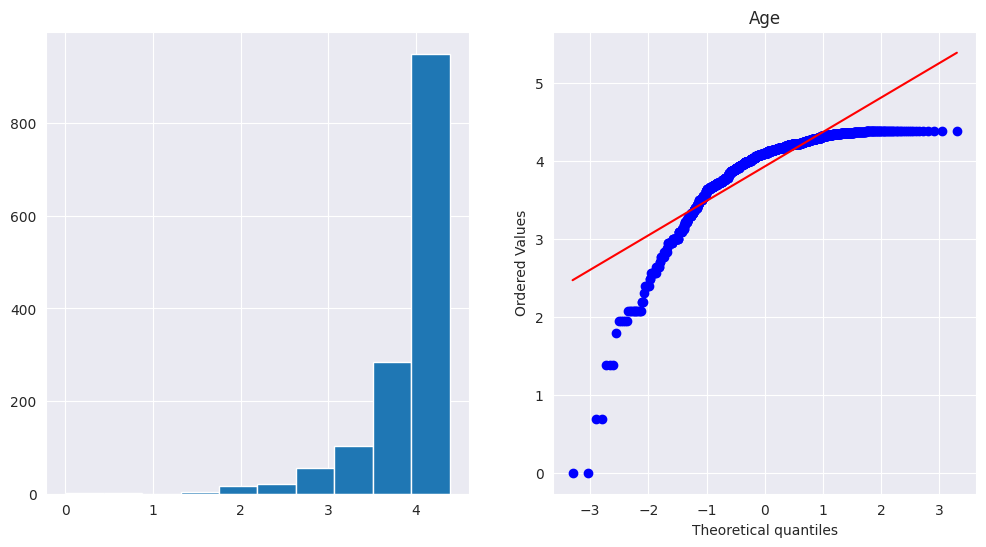

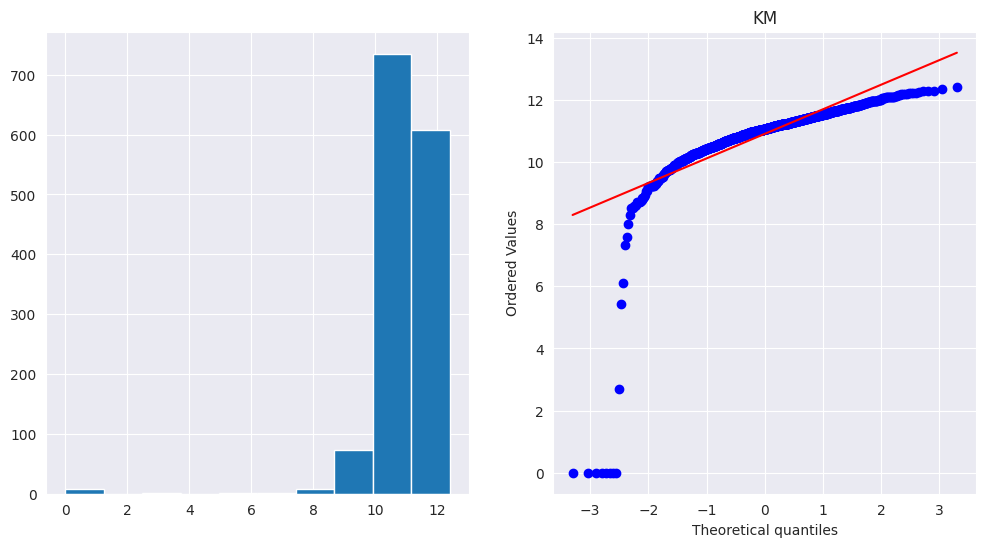

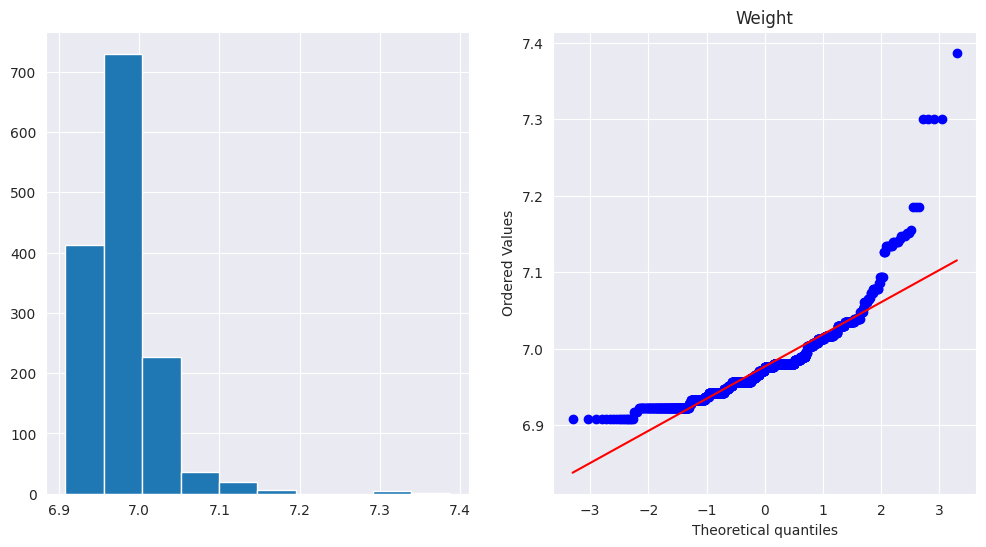

In [96]:
df=n_data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

##Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

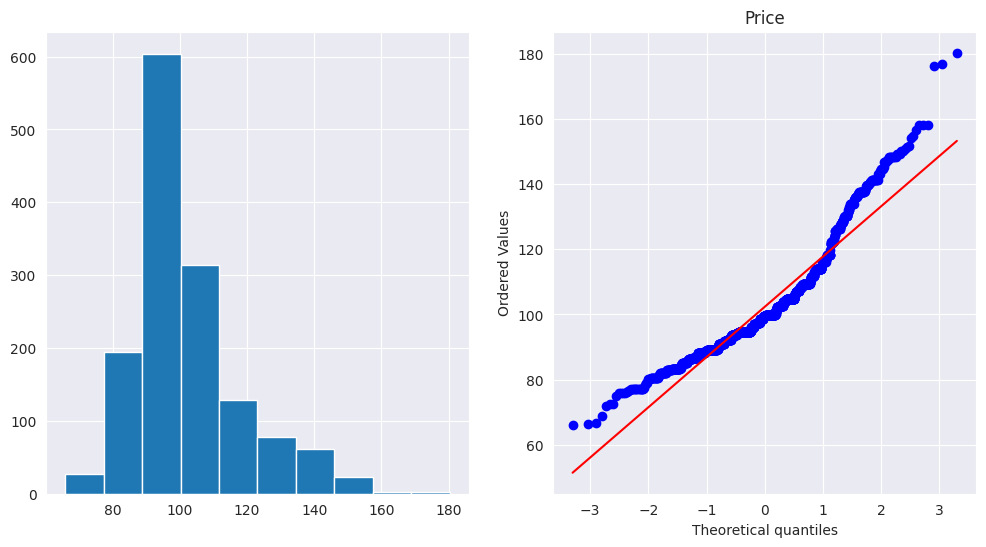

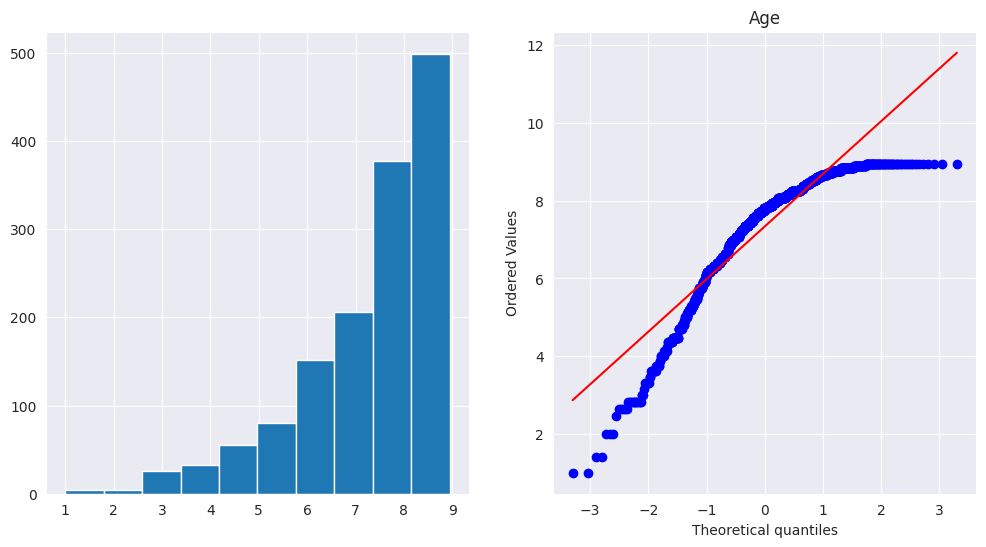

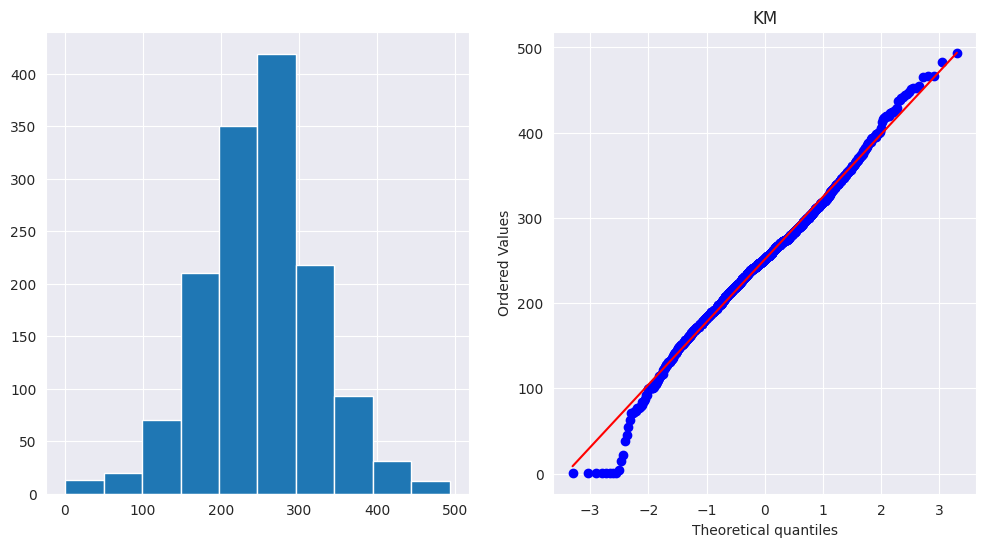

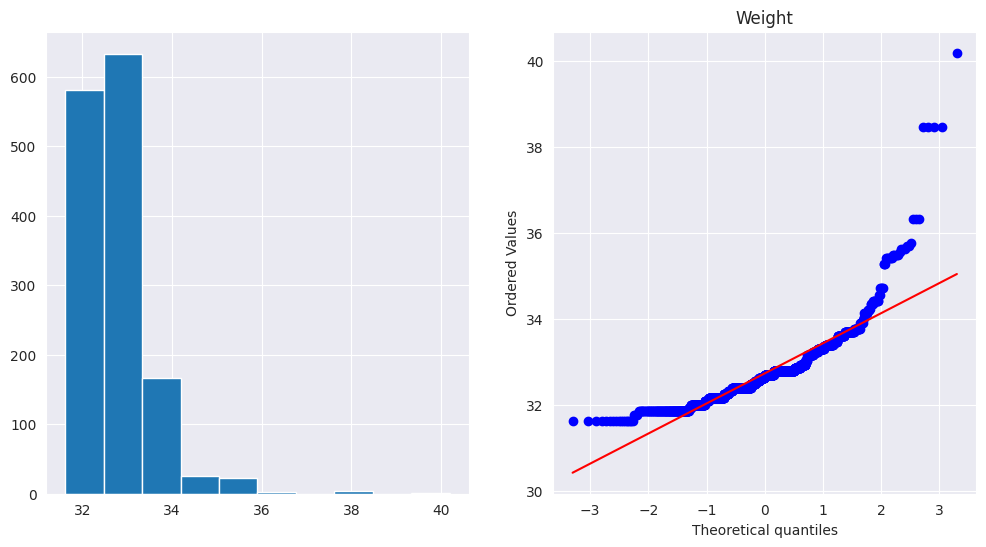

In [97]:
df=n_data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

##Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

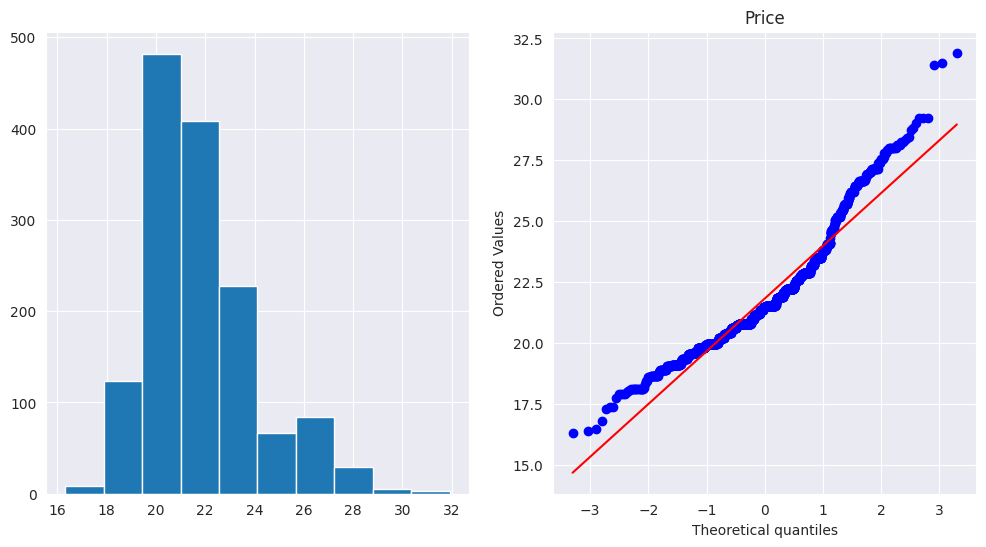

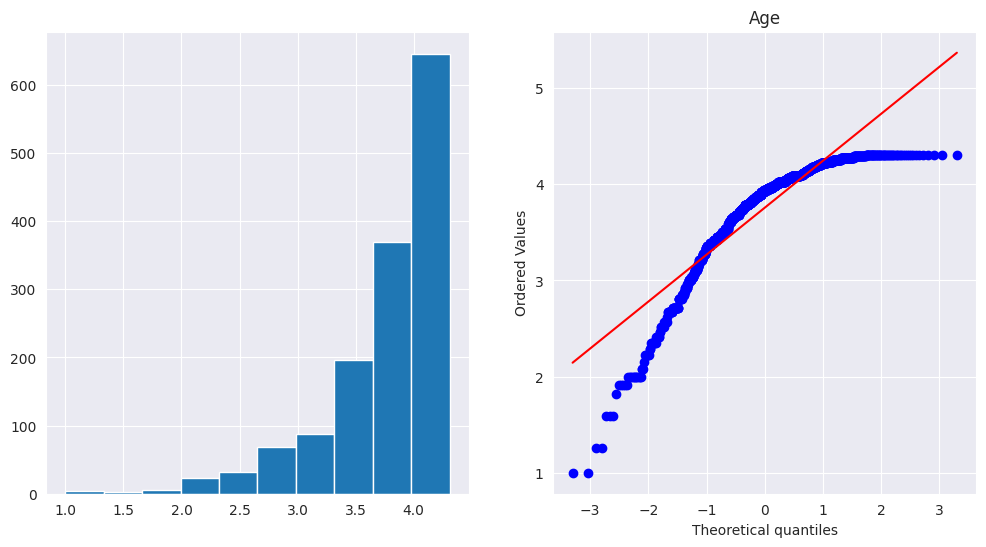

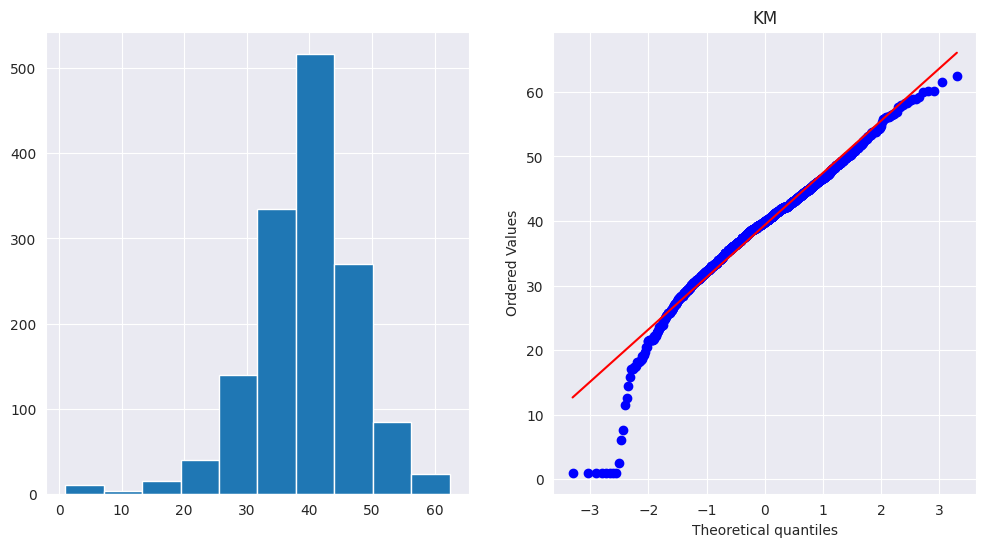

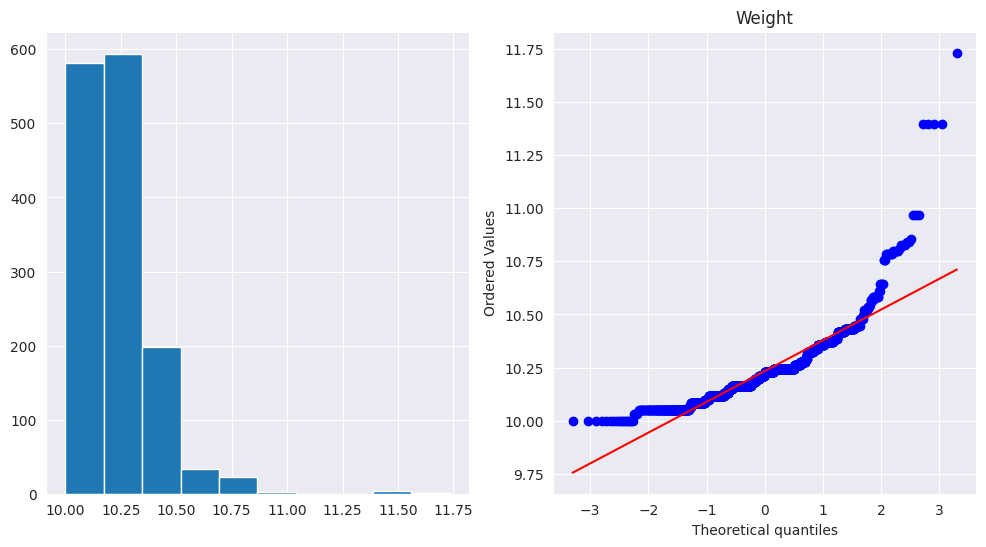

In [98]:
df=n_data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.

##Visualizing the Relation between each independent Feature with respect to the Dependent Feature

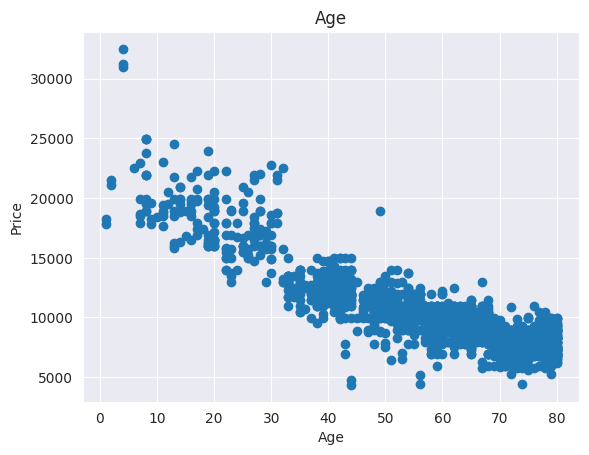

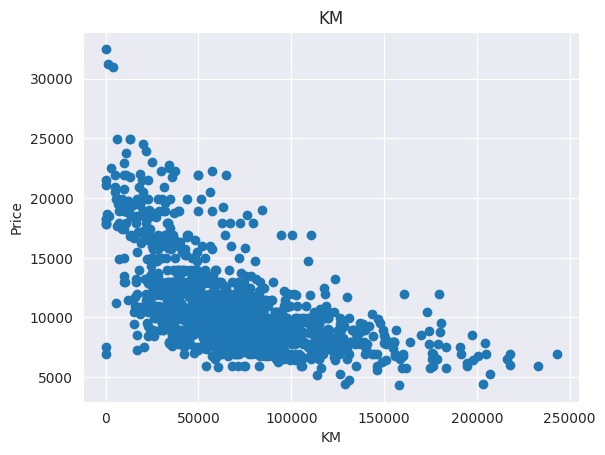

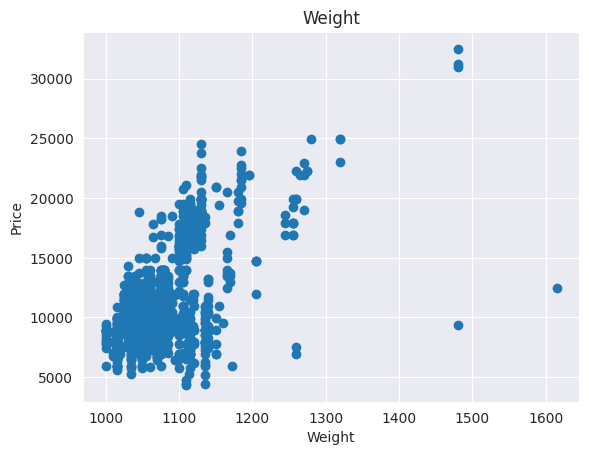

In [99]:
for feature in continuous_feature:
    if feature!="Price":
        df=n_data.copy()
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Age feature has a good linear relation with Price a Negative Correlation as compare to other features

##Relationship between the discrete variables and Price

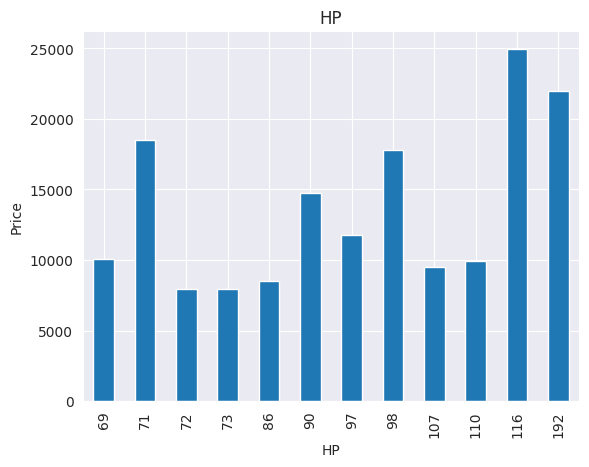

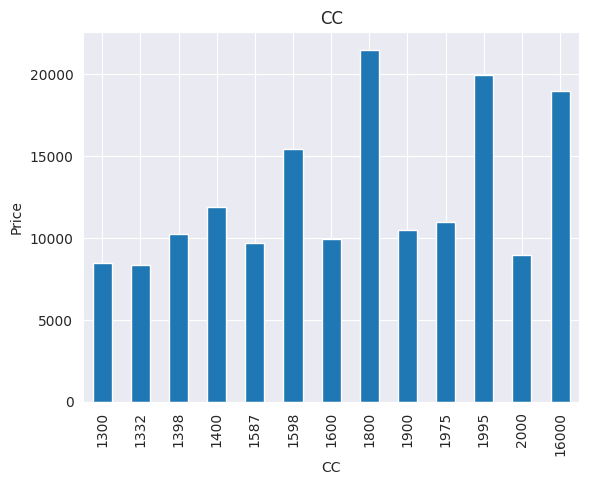

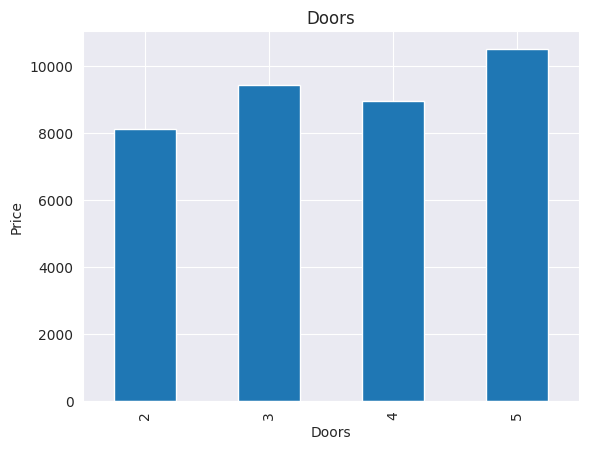

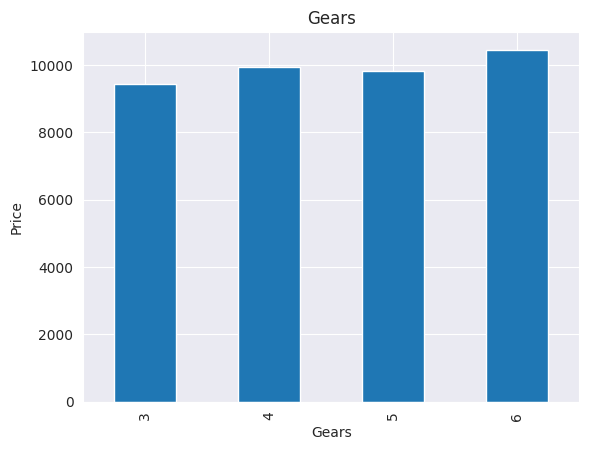

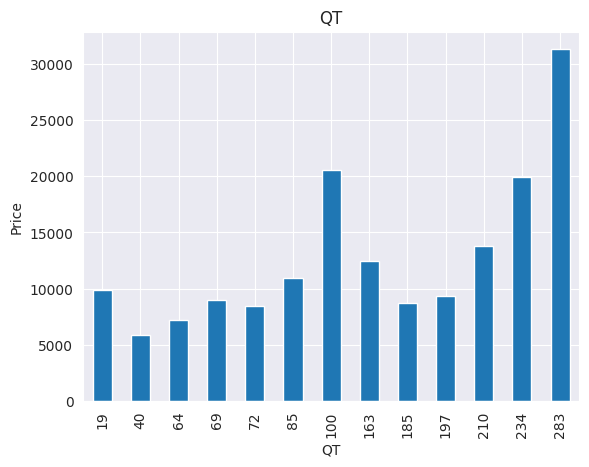

In [100]:
for feature in discrete_feature:
    df=n_data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation

##Visualizing Continuous Datatype for Outlier Detection

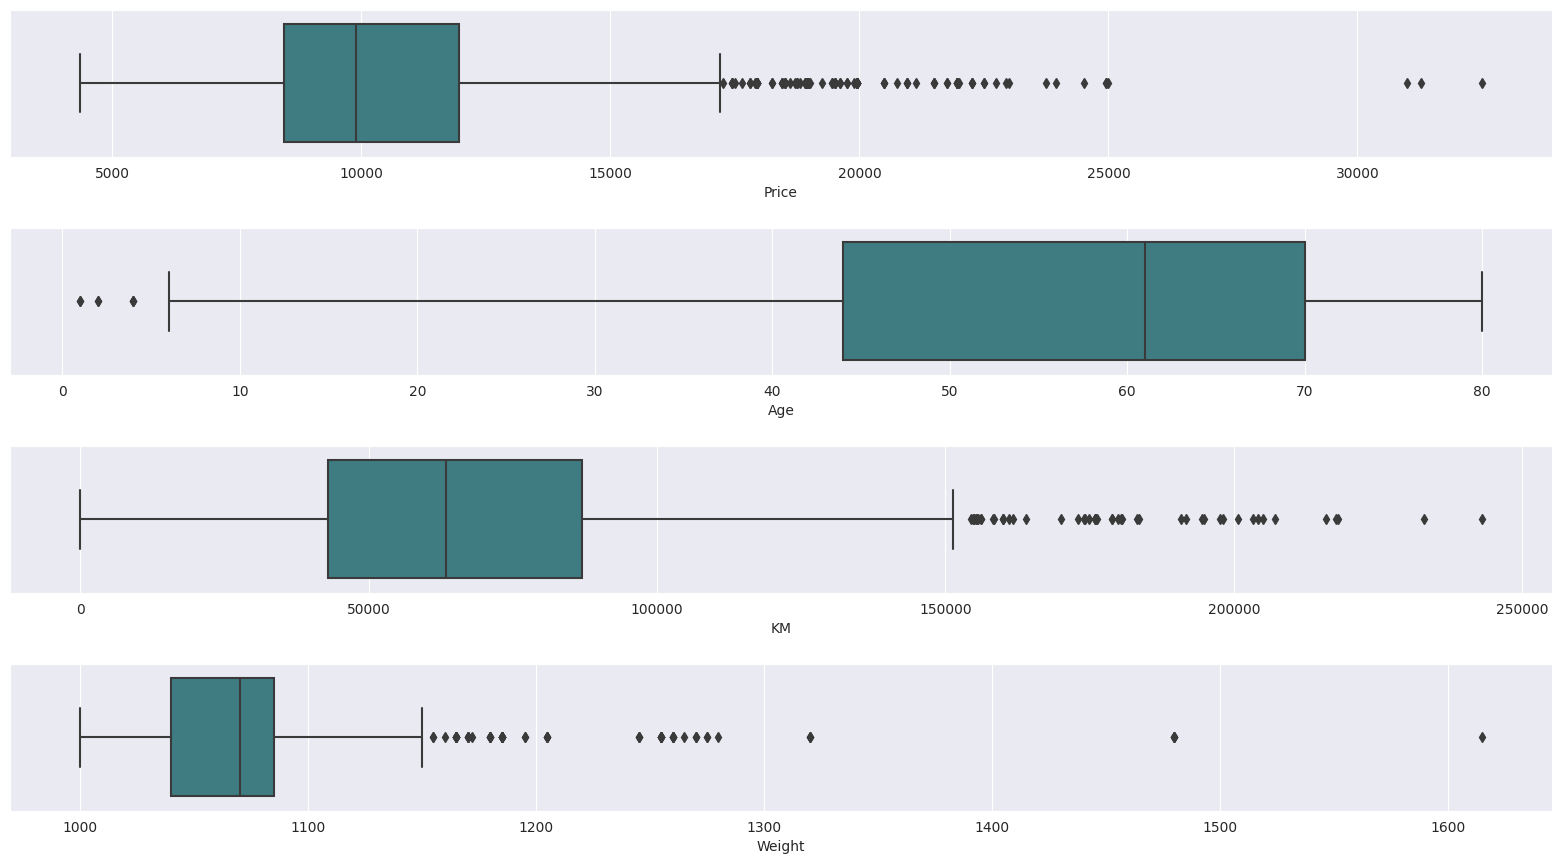

In [101]:
df=n_data.copy()
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

A significant amount of outliers are present in each continuous feature


##Median Imputation to handle Outlier in Price

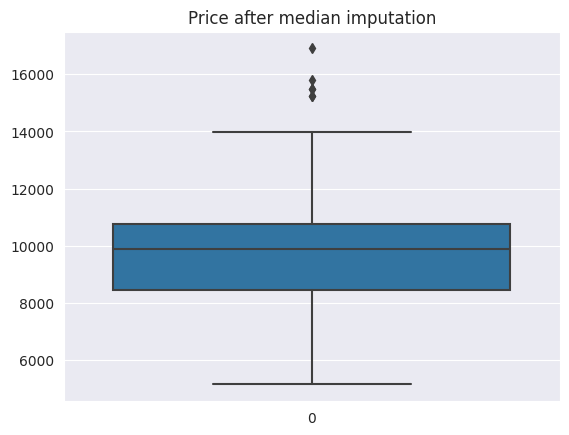

In [102]:
df1=n_data.copy()
for i in n_data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

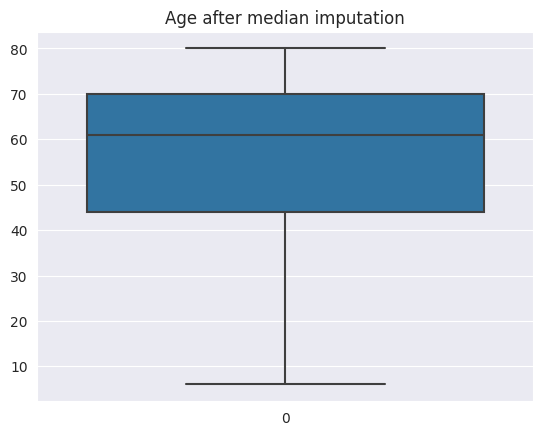

In [103]:
for i in n_data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

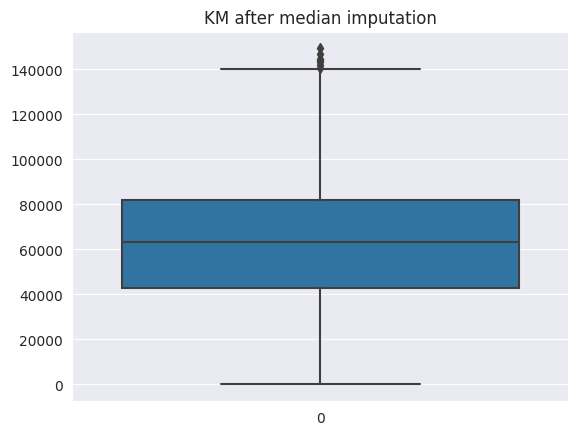

In [104]:
for i in n_data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

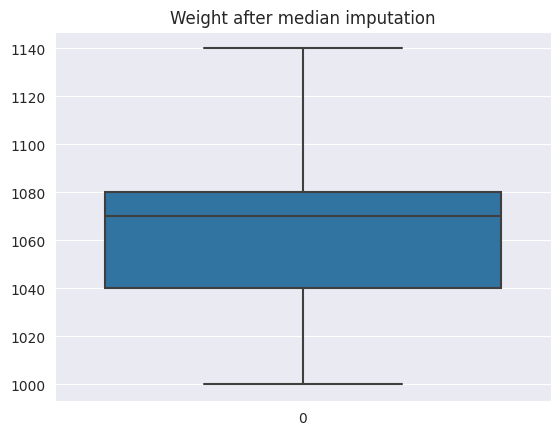

In [105]:
for i in n_data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

Testing data in model to find R-squared with median imputation data model

In [106]:
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.3405679683776378, 0.3391864766912781)

##Mean Imputation to handle Outlier in Profit

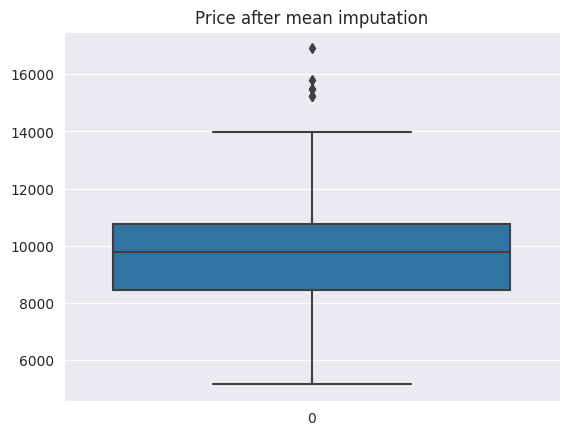

In [107]:
df2=n_data.copy()
for i in n_data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

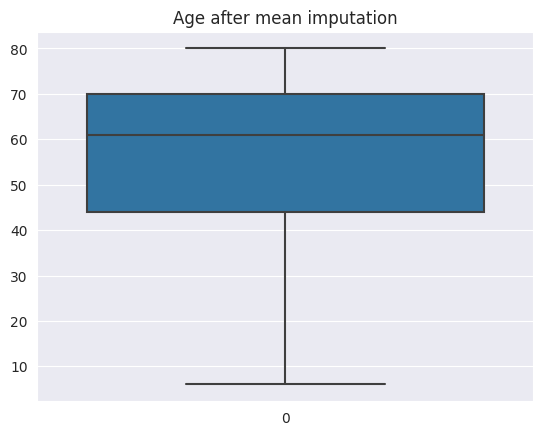

In [108]:
for i in n_data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

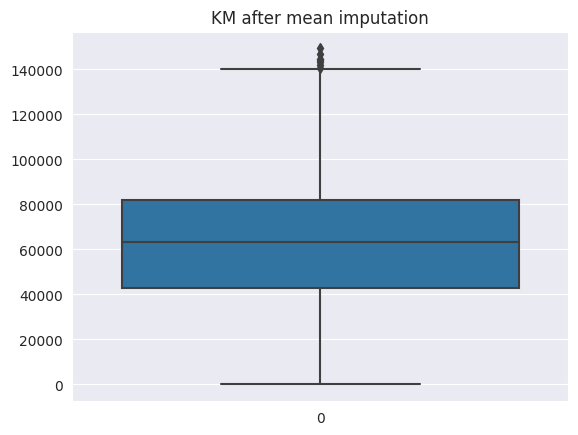

In [109]:
for i in n_data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

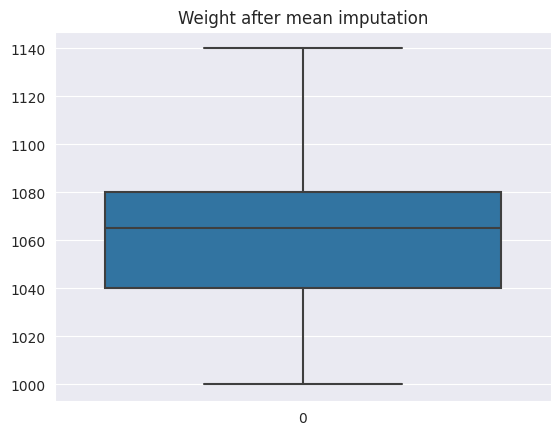

In [110]:
for i in n_data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

Test our data in model and find the R-squared with mean imputation data model

In [111]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.38750862526420227, 0.3862254729428284)

mean imputation the model is not performing well

In [112]:
#to remove the outlier and see the results

df3=n_data.copy()
def drop_outliers(n_data, field_name):
    iqr = 1.5*(np.percentile(n_data[field_name], 75) - np.percentile(n_data[field_name], 25))
    n_data.drop(n_data[n_data[field_name] > (iqr + np.percentile(n_data[field_name], 75))].index, inplace=True)
    n_data.drop(n_data[n_data[field_name] < (np.percentile(n_data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

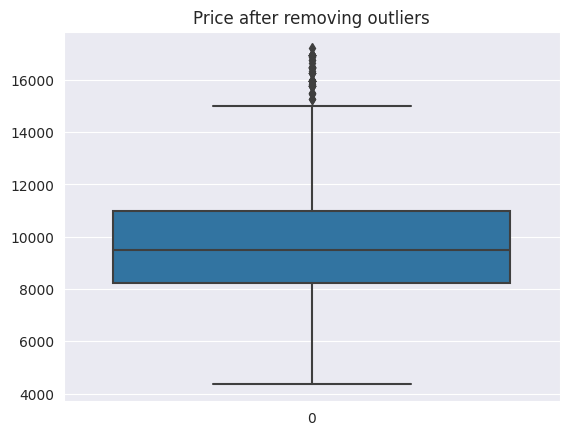

In [113]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

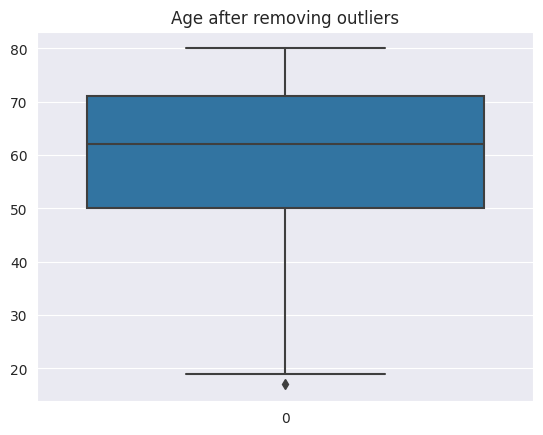

In [114]:
drop_outliers(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

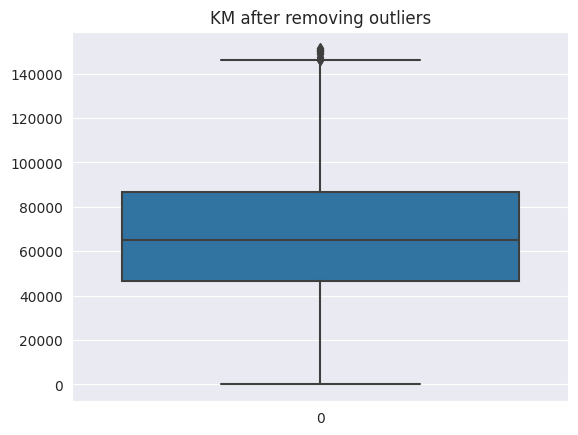

In [115]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

Test our data in model and compare the R-squared with without imputation data model

In [116]:
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.7674116644541189, 0.7668609422705059)

In [117]:
np.sqrt(removed_outlier_model.mse_resid)

1108.7145118436365

##Log transformation and visualize the result

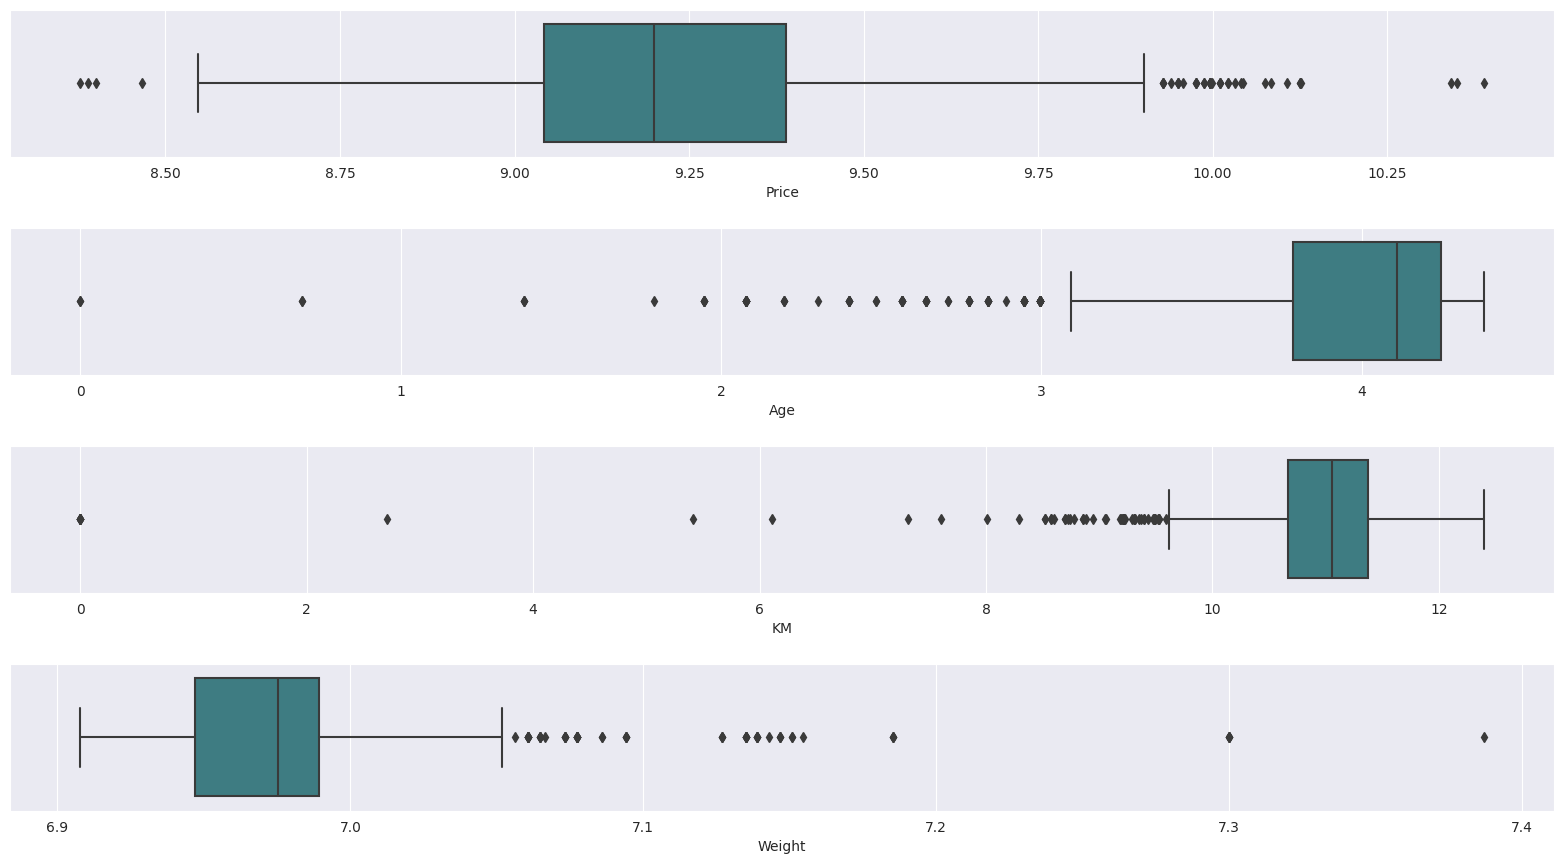

In [118]:
df=n_data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [119]:
log_transfomed = n_data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

(0.708744104883068, 0.7081339319184377)

The outliers are still present

##Cuberoot transformation and visualize the result

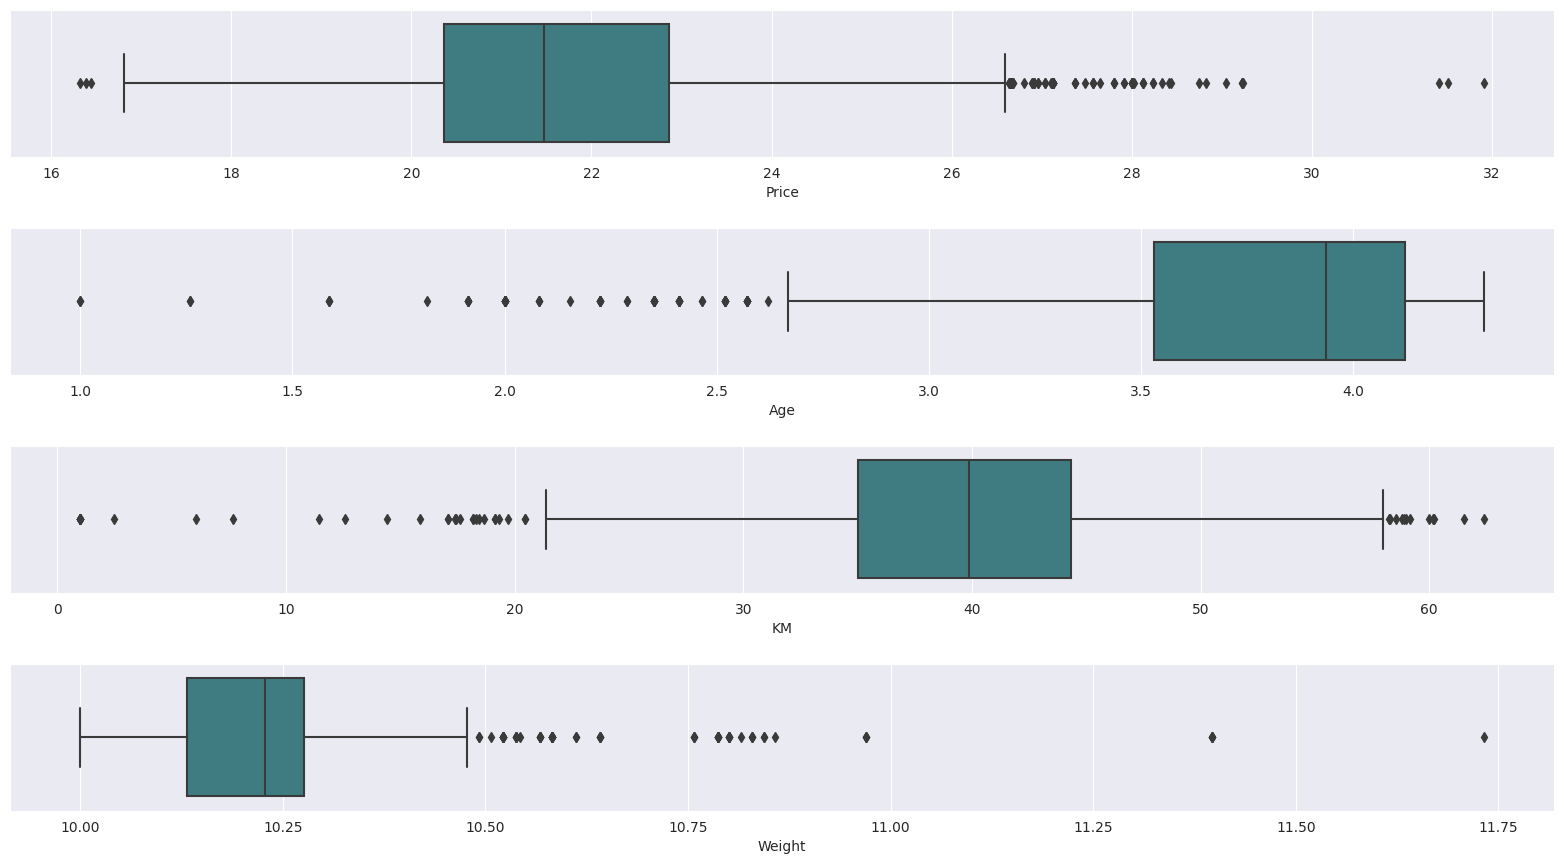

In [120]:
df=n_data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [121]:
cube_root_transfomed = n_data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj

(0.8160113818649388, 0.8156259308492928)

The outliers are still present

After removing Outliers the model performed very poorly than the raw data model

##Preapring Model(The original data)

In [122]:
n_data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [123]:
ndata_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = n_data).fit()

In [124]:
# Calculating Values

print("Model Parameters\n" ,ndata_model.params,"\n")

#tvalues and pvalues
print("t values\n" ,ndata_model.tvalues)
print("P values\n" ,ndata_model.pvalues,"\n")

#R squared values
print("Rsquared Values :\n","r_squared value " , ndata_model.rsquared,"\n" , " r_squared_adj_value :",ndata_model.rsquared_adj,)

Model Parameters
 Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
Weight         16.958632
HP             31.680906
CC             -0.121100
Gears         594.319936
QT              3.949081
Doors          -1.616641
dtype: float64 

t values
 Intercept    -3.948666
Age         -46.511852
KM          -16.621622
Weight       15.879803
HP           11.241018
CC           -1.344222
Gears         3.016007
QT            3.014535
Doors        -0.040410
dtype: float64
P values
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
Weight        2.048576e-52
HP            3.757218e-28
CC            1.790902e-01
Gears         2.606549e-03
QT            2.619148e-03
Doors         9.677716e-01
dtype: float64 

Rsquared Values :
 r_squared value  0.8637627463428191 
  r_squared_adj_value : 0.8629989775766962


In [125]:
ndata_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
np.sqrt(ndata_model.mse_resid)

1342.4719466619235

##Detecting Influencers/Outliers in the Model

2 Techniques : 1. Cook's Distance & 2. Leverage value

In [127]:
influence_points=ndata_model.get_influence()
c, p_value=influence_points.cooks_distance

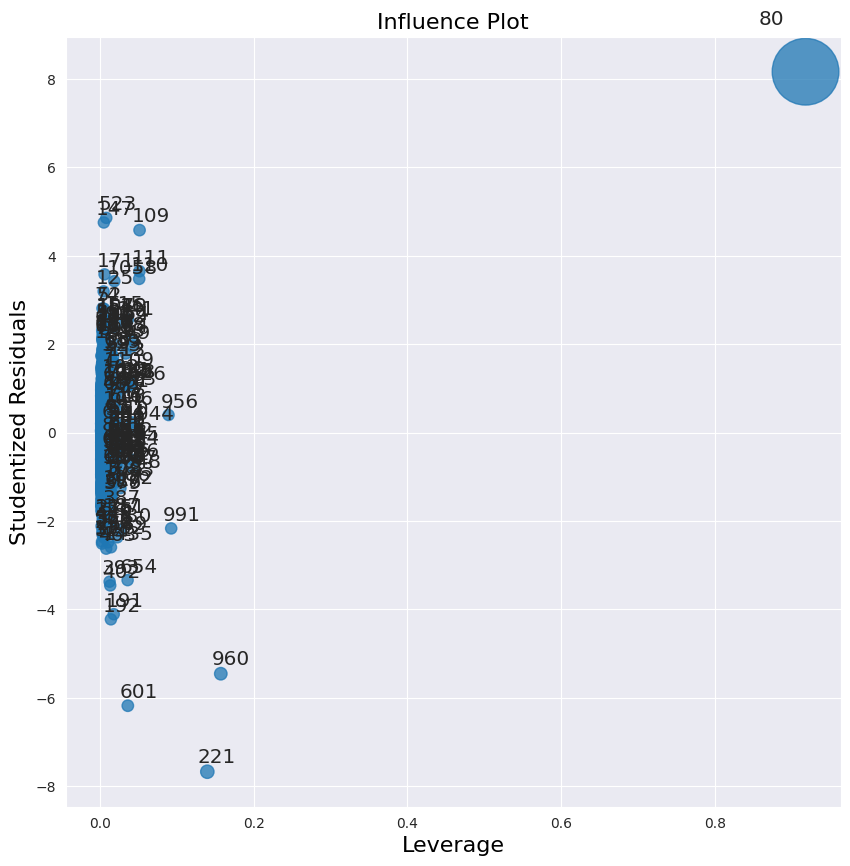

In [128]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(ndata_model,ax = ax)
plt.show()

Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [129]:
k=n_data.shape[1]
n=n_data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


plot the influencers and also plot a cut off line using the stem plo

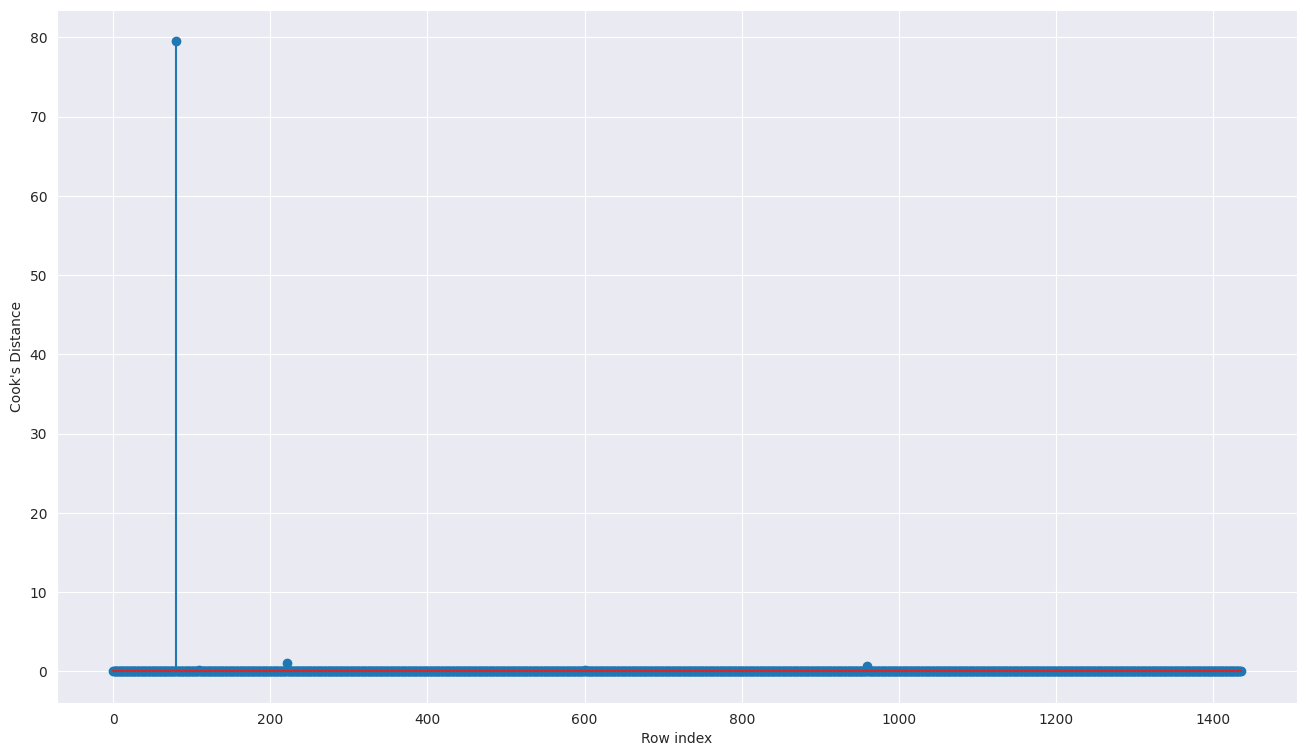

In [130]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(n_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [131]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624140922)

In [132]:
n_data[n_data.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

##Improve the model by deleting the influence point and creating a new dataframe

In [133]:
dataframe= n_data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [134]:
n_data.shape

(1436, 9)

In [135]:
while ndata_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        ndata_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        (c,_)=ndata_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8778445878599779
Thus model accuracy is improved to 0.8851845904421738
Thus model accuracy is improved to 0.8894191849749752
Thus model accuracy is improved to 0.8914204825569462
Thus model accuracy is improved to 0.8921467826162199
Thus model accuracy is improved to 0.8934037497368835
Thus model accuracy is improved to 0.8944954473640403
Thus model accuracy is improved to 0.8958333530393431
Thus model accuracy is improved to 0.8966334481080779
Thus model accuracy is improved to 0.8941835374074523
Thus model accuracy is improved to 0.8951069956497653
Thus model accuracy is improved to 0.8965514940097824
Thus model accuracy is improved to 0.8971531368893259
Thus model accuracy is improved to 0.8979680072945879
Thus model accuracy is improved to 0.8975421185310548
Thus model accuracy is improved to 0.8970095523065386
Thus model accuracy is improved to 0.8965434597967323
Thus model accuracy is improved to 0.8961255789744986
Thus model accuracy is impro

In [136]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [137]:
dataframe.shape

(1330, 9)

In [138]:
dataframe.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13750   23  72937  90  2000      3      5  210    1165
1  14950   26  48000  90  2000      3      5  210    1165
2  13750   30  38500  90  2000      3      5  210    1170
3  12950   32  61000  90  2000      3      5  210    1170
4  16900   27  94612  90  2000      3      5  210    1245

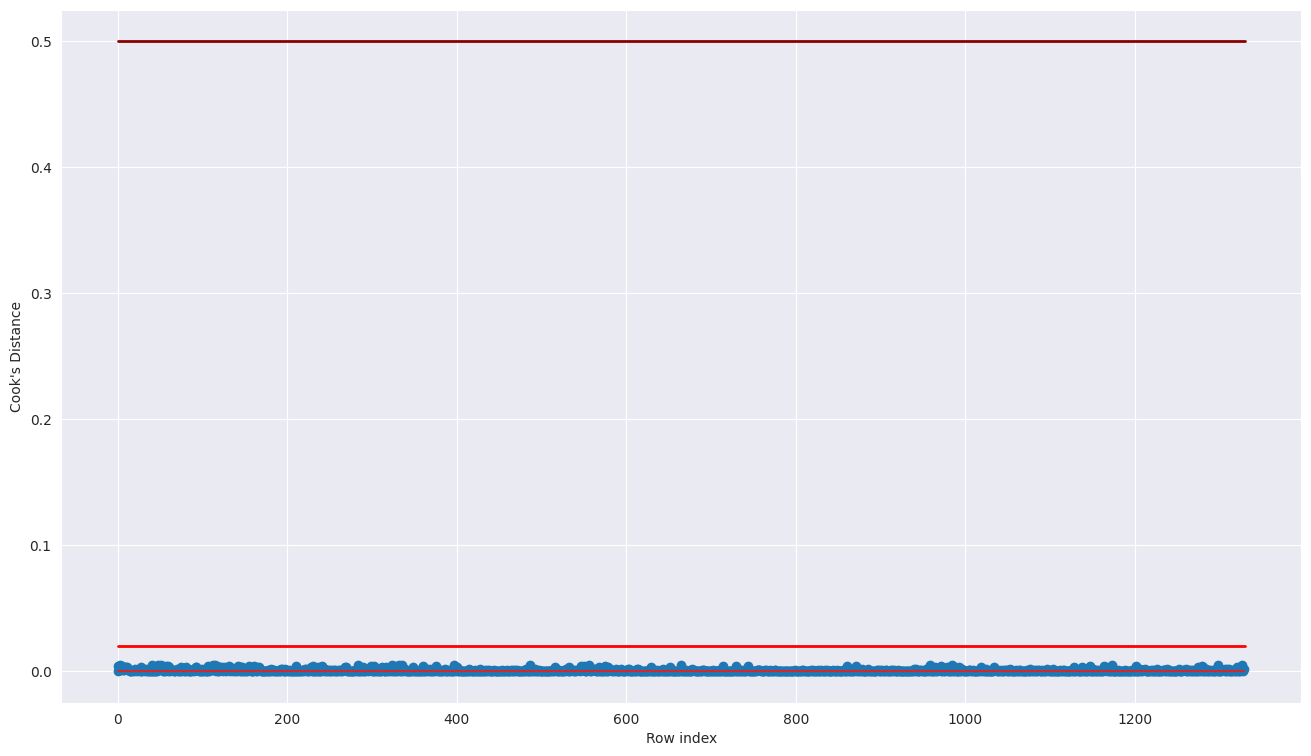

In [139]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

All the points are below our cut-off line

In [140]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:12   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
np.sqrt(final_model.mse_resid)

975.9271399262798

Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

##Log-Transformation

In [142]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

Age     Price         KM    Weight    CC  Doors  HP
0  3.135494  9.528794  11.197351  7.060476  2000      3  90
1  3.258097  9.612467  10.778956  7.060476  2000      3  90
2  3.401197  9.528794  10.558414  7.064759  2000      3  90
3  3.465736  9.468851  11.018629  7.064759  2000      3  90
4  3.295837  9.735069  11.457540  7.126891  2000      3  90

In [143]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     729.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:12   Log-Likelihood:                 843.01
No. Observations:                1330   AIC:                            -1672.
Df Residuals:                    1323   BIC:                            -1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3980      1.353     -3.991      0.000      -8.052      -2.745
Age           -0.4079      0.013    -30.586      0.000      -0.434      -0.382
KM             0.0034      0.006      0.594      0.552      -0.008       0.015
HP             0.0032      0.000     11.096      0.000       0.003       0.004
CC            -0.0003   3.33e-05     -8.494      0.000      -0.000      -0.000
Doors         -0.0039      0.004     -0.927      0.354      -0.012       0.004
Weight         2.3427      0.197     11.867      0.000       1.955       2.730
==============================================================================
Omnibus:                      284.802   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.768
Skew:                          -0.976   Prob(JB):                    4.31e-249
Kurtosis:                       7.103   Cond. No.                     6.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Cube-Root Transformation

In [144]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['QT'] = dataframe['QT']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

Age      Price         KM     Weight    CC   QT  Doors  Gears  HP
0  2.843867  23.957099  41.781366  10.522251  2000  210      3      5  90
1  2.962496  24.634688  36.342412  10.522251  2000  210      3      5  90
2  3.107233  23.957099  33.766567  10.537282  2000  210      3      5  90
3  3.174802  23.483163  39.364972  10.537282  2000  210      3      5  90
4  3.000000  25.662299  45.566822  10.757791  2000  210      3      5  90

In [145]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     991.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:12   Log-Likelihood:                -1505.8
No. Observations:                1330   AIC:                             3030.
Df Residuals:                    1321   BIC:                             3076.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5991      3.723     -4.996      0.000     -25.902     -11.296
Age           -2.5835      0.069    -37.297      0.000      -2.719      -2.448
KM            -0.0450      0.004    -11.317      0.000      -0.053      -0.037
HP             0.0139      0.002      6.029      0.000       0.009       0.018
CC            -0.0013      0.000     -5.690      0.000      -0.002      -0.001
Doors         -0.0179      0.025     -0.707      0.480      -0.067       0.032
Gears          0.2967      0.126      2.350      0.019       0.049       0.544
QT            -0.0016      0.001     -1.232      0.218      -0.004       0.001
Weight         5.0086      0.375     13.353      0.000       4.273       5.744
==============================================================================
Omnibus:                       83.976   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.525
Skew:                          -0.447   Prob(JB):                     2.79e-34
Kurtosis:                       4.410   Cond. No.                     2.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Square-Root Transformation

In [146]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['QT'] = dataframe['QT']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

Age       Price          KM     Weight    CC   QT  Doors  Gears  HP
0  4.795832  117.260394  270.068510  34.132096  2000  210      3      5  90
1  5.099020  122.270193  219.089023  34.132096  2000  210      3      5  90
2  5.477226  117.260394  196.214169  34.205263  2000  210      3      5  90
3  5.656854  113.798067  246.981781  34.205263  2000  210      3      5  90
4  5.196152  130.000000  307.590637  35.284558  2000  210      3      5  90

In [147]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1229.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:12   Log-Likelihood:                -3993.0
No. Observations:                1330   AIC:                             8004.
Df Residuals:                    1321   BIC:                             8051.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7308     15.607     -6.454      0.000    -131.348     -70.114
Age           -6.7197      0.157    -42.795      0.000      -7.028      -6.412
KM            -0.0384      0.003    -13.802      0.000      -0.044      -0.033
HP             0.0766      0.015      5.084      0.000       0.047       0.106
CC            -0.0082      0.001     -5.622      0.000      -0.011      -0.005
Doors         -0.2049      0.164     -1.251      0.211      -0.526       0.116
Gears          2.0321      0.819      2.481      0.013       0.425       3.639
QT            -0.0209      0.008     -2.563      0.010      -0.037      -0.005
Weight         7.9388      0.500     15.875      0.000       6.958       8.920
==============================================================================
Omnibus:                        7.852   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.528
Skew:                          -0.128   Prob(JB):                       0.0141
Kurtosis:                       3.297   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Robust transformation

The Robust Scaler is not sensitive to outliers.

This scaler removes the median from the data Scales the data by the InterQuartile Range(IQR) The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [148]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

Price       Age        KM  HP    CC  Doors  Gears   QT    Weight
0  1.175000 -1.583333  0.211503  90  2000      3      5  210  2.222222
1  1.538636 -1.458333 -0.375961  90  2000      3      5  210  2.222222
2  1.175000 -1.291667 -0.599762  90  2000      3      5  210  2.333333
3  0.932576 -1.208333 -0.069708  90  2000      3      5  210  2.333333
4  2.129545 -1.416667  0.722122  90  2000      3      5  210  4.000000

In [149]:
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:12   Log-Likelihood:                -262.35
No. Observations:                1330   AIC:                             542.7
Df Residuals:                    1321   BIC:                             589.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9936      0.285      3.487      0.001       0.435       1.553
Age           -0.7873      0.016    -49.648      0.000      -0.818      -0.756
KM            -0.1989      0.013    -14.830      0.000      -0.225      -0.173
HP             0.0024      0.001      2.586      0.010       0.001       0.004
CC            -0.0007   8.83e-05     -7.799      0.000      -0.001      -0.001
Doors         -0.0452      0.010     -4.600      0.000      -0.064      -0.026
Gears          0.0762      0.050      1.537      0.124      -0.021       0.173
QT            -0.0035      0.000     -7.144      0.000      -0.004      -0.003
Weight         0.5042      0.020     25.566      0.000       0.466       0.543
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Standard Scaler

the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal.

Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [150]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

Price       Age        KM        HP        CC     Doors     Gears  \
0  1.057454 -1.915503  0.136289 -0.883769  2.526466 -1.067888 -0.137393   
1  1.446875 -1.746462 -0.576515 -0.883769  2.526466 -1.067888 -0.137393   
2  1.057454 -1.521074 -0.848065 -0.883769  2.526466 -1.067888 -0.137393   
3  0.797839 -1.408380 -0.204921 -0.883769  2.526466 -1.067888 -0.137393   
4  2.079684 -1.690115  0.755851 -0.883769  2.526466 -1.067888 -0.137393   

         QT    Weight  
0  3.424789  2.456469  
1  3.424789  2.456469  
2  3.424789  2.580538  
3  3.424789  2.580538  
4  3.424789  4.441570

In [151]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:12   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After the transformation and building models the R-Squared had varince with respect to other transformations

For building Multi Linear Resgression there are assumption regarding the data set.

They are as follows:-

Feature should be independent of each other there should'nt be any dependency upon each other

There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)

Each Feature and Model Error (residuals) should be independent of each other

Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

There should be a linear relation between the dependent variable and Independent variables

##Preparing a Model

In [152]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:12   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the values we are concerned with are -

The coefficients and significance (p-values) R-squared F statistic and its significance

R - squared is 0.896 Meaning that 89.9% of the variance in cnt with registered This is a decent R-squared value.

F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

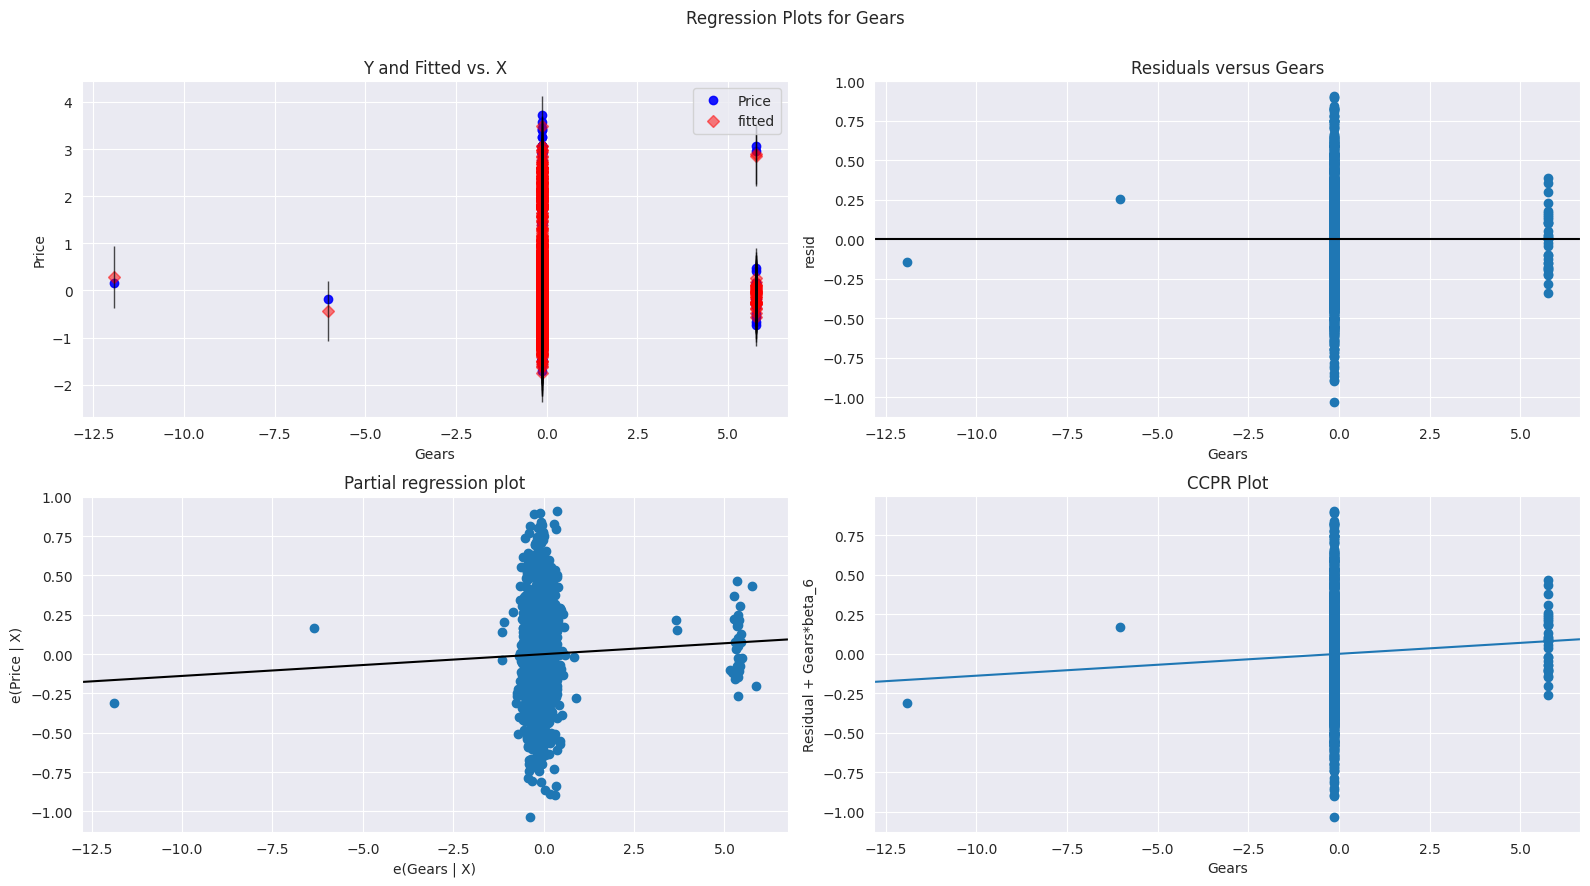

In [153]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

No Linear Relation found in QT Feature with the Dependent feature

###Model Testing

As Y = Beta0 + Beta1(X1) + Beta2(X2) +Beta3(X3) + .................. + Beta n(Xn)

Finding Coefficient Parameters (Beta0 and Beta1's values) Assupmtion for multi linear Regression fails

Feature should be independent of each other there should'nt be any dependency upon each other

Here, (Intercept) Beta0 p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

If the p-value is not less than .05 for Gears features, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data providing those features dependency towards the dependent variable Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

##VIF ( Variance Inflation Factor )

In [154]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('QT~HP+Weight+CC+Doors+Age+Gears+KM', dataframe).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM~HP+Weight+CC+Doors+QT+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+CC+Doors+QT+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+CC+Age+QT+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [155]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

VIF
Variables          
Gears      1.075124
Doors      1.336868
KM         1.858592
Age        2.091177
HP         2.094861
CC         3.725960
Weight     4.744228
QT         4.863714

Generally want a VIF that is less than 5. As you can see QT has the highest value among others lets investigate

In [156]:
#Simple Linear Model using QT
qt_model = smf.ols('Price~QT', data=df_standard_scaled).fit()
qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     24.53
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           8.27e-07
Time:                        17:13:15   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3754.
Df Residuals:                    1328   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e-16      0.027   9.33e-15      1.000      -0.053       0.053
QT             0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.046   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.056
Skew:                           1.259   Prob(JB):                    5.15e-103
Kurtosis:                       4.469   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08310
Date:                Fri, 01 Sep 2023   Prob (F-statistic):              0.773
Time:                        17:13:15   Log-Likelihood:                -1887.1
No. Observations:                1330   AIC:                             3778.
Df Residuals:                    1328   BIC:                             3789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e-16      0.027   9.25e-15      1.000      -0.054       0.054
Gears          0.0079      0.027      0.288      0.773      -0.046       0.062
==============================================================================
Omnibus:                      289.163   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.772
Skew:                           1.333   Prob(JB):                    4.10e-115
Kurtosis:                       4.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
gears_qt_weight_model = smf.ols('Price~Gears+QT', data=df_standard_scaled).fit()
gears_qt_weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           5.08e-06
Time:                        17:13:15   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3756.
Df Residuals:                    1327   BIC:                             3772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e-16      0.027   9.33e-15      1.000      -0.053       0.053
Gears          0.0085      0.027      0.313      0.754      -0.045       0.062
QT             0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.324   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.601
Skew:                           1.260   Prob(JB):                    3.92e-103
Kurtosis:                       4.468   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Significance level - Backward elimination

We have different techniques to find out the features which have the maximum effect on the output.

Here we are going to look at the Backward elimination.

In this process we need to add one column of ones in the starting of the column.

In backward elimination we delete the value one by one whose significance level is less.

i.e In general we have a P-value and a significance level

P_value = 1 - (minus) significane level

or in other terms

p_value+ significance level = 1

if P_value is high significance level is less.

Hence we will be deleating features one by one whose P_value is high which means it has less significance level.

By eliminating process we get to the values which are of most significance

###Model1

Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Gears as it has a very high P Value of 0.75 in SLR and 0.12 in MLR has R square score of 0

In [159]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)


x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [160]:
model_1 = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1703.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:15   Log-Likelihood:                -354.65
No. Observations:                1330   AIC:                             725.3
Df Residuals:                    1322   BIC:                             766.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6233      0.013    -49.609      0.000      -0.648      -0.599
KM            -0.1743      0.012    -14.750      0.000      -0.197      -0.151
HP             0.0360      0.012      2.915      0.004       0.012       0.060
CC            -0.1329      0.017     -7.955      0.000      -0.166      -0.100
Doors         -0.0493      0.010     -5.016      0.000      -0.069      -0.030
QT            -0.1350      0.019     -7.057      0.000      -0.172      -0.097
Weight         0.4850      0.019     25.656      0.000       0.448       0.522
==============================================================================
Omnibus:                        4.861   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.872
Skew:                           0.148   Prob(JB):                       0.0875
Kurtosis:                       2.984   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As our Multicollinearity problem has been solved

###Correlation Coefficient

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

In [161]:
n_data.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876590 -0.569960  0.314990  0.126389  0.185326  0.063104   
Age    -0.876590  1.000000  0.505672 -0.156622 -0.098084 -0.148359 -0.005364   
KM     -0.569960  0.505672  1.000000 -0.333538  0.102683 -0.036197  0.015023   
HP      0.314990 -0.156622 -0.333538  1.000000  0.035856  0.092424  0.209477   
CC      0.126389 -0.098084  0.102683  0.035856  1.000000  0.079903  0.014629   
Doors   0.185326 -0.148359 -0.036197  0.092424  0.079903  1.000000 -0.160141   
Gears   0.063104 -0.005364  0.015023  0.209477  0.014629 -0.160141  1.000000   
QT      0.219197 -0.198431  0.278165 -0.298432  0.306996  0.109363 -0.005452   
Weight  0.581198 -0.470253 -0.028598  0.089614  0.335637  0.302618  0.020613   

              QT    Weight  
Price   0.219197  0.581198  
Age    -0.198431 -0.470253  
KM      0.278165 -0.028598  
HP     -0.298432  0.089614  
CC      0.306996  0.335637  
Doors   0.109363  0.302618  
Gears  -0.005452  0.020613  
QT      1.000000  0.626134  
Weight  0.626134  1.000000

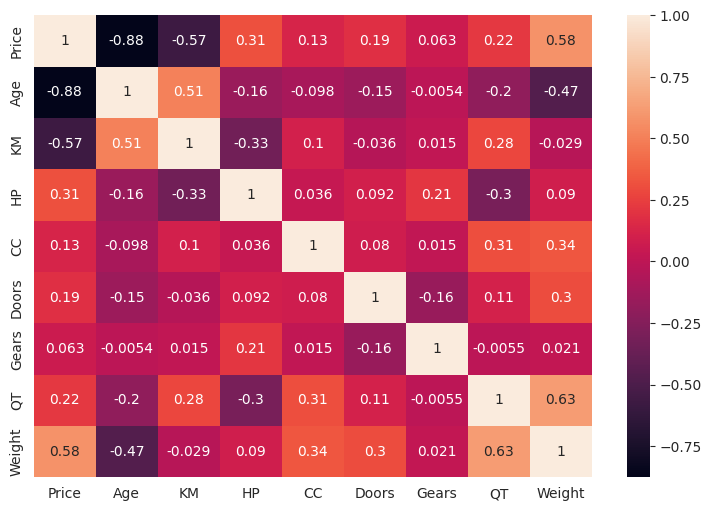

In [162]:
plt.figure(figsize = (9,6))
sns.heatmap(n_data.corr(), annot = True)
plt.show()

##Pairplot

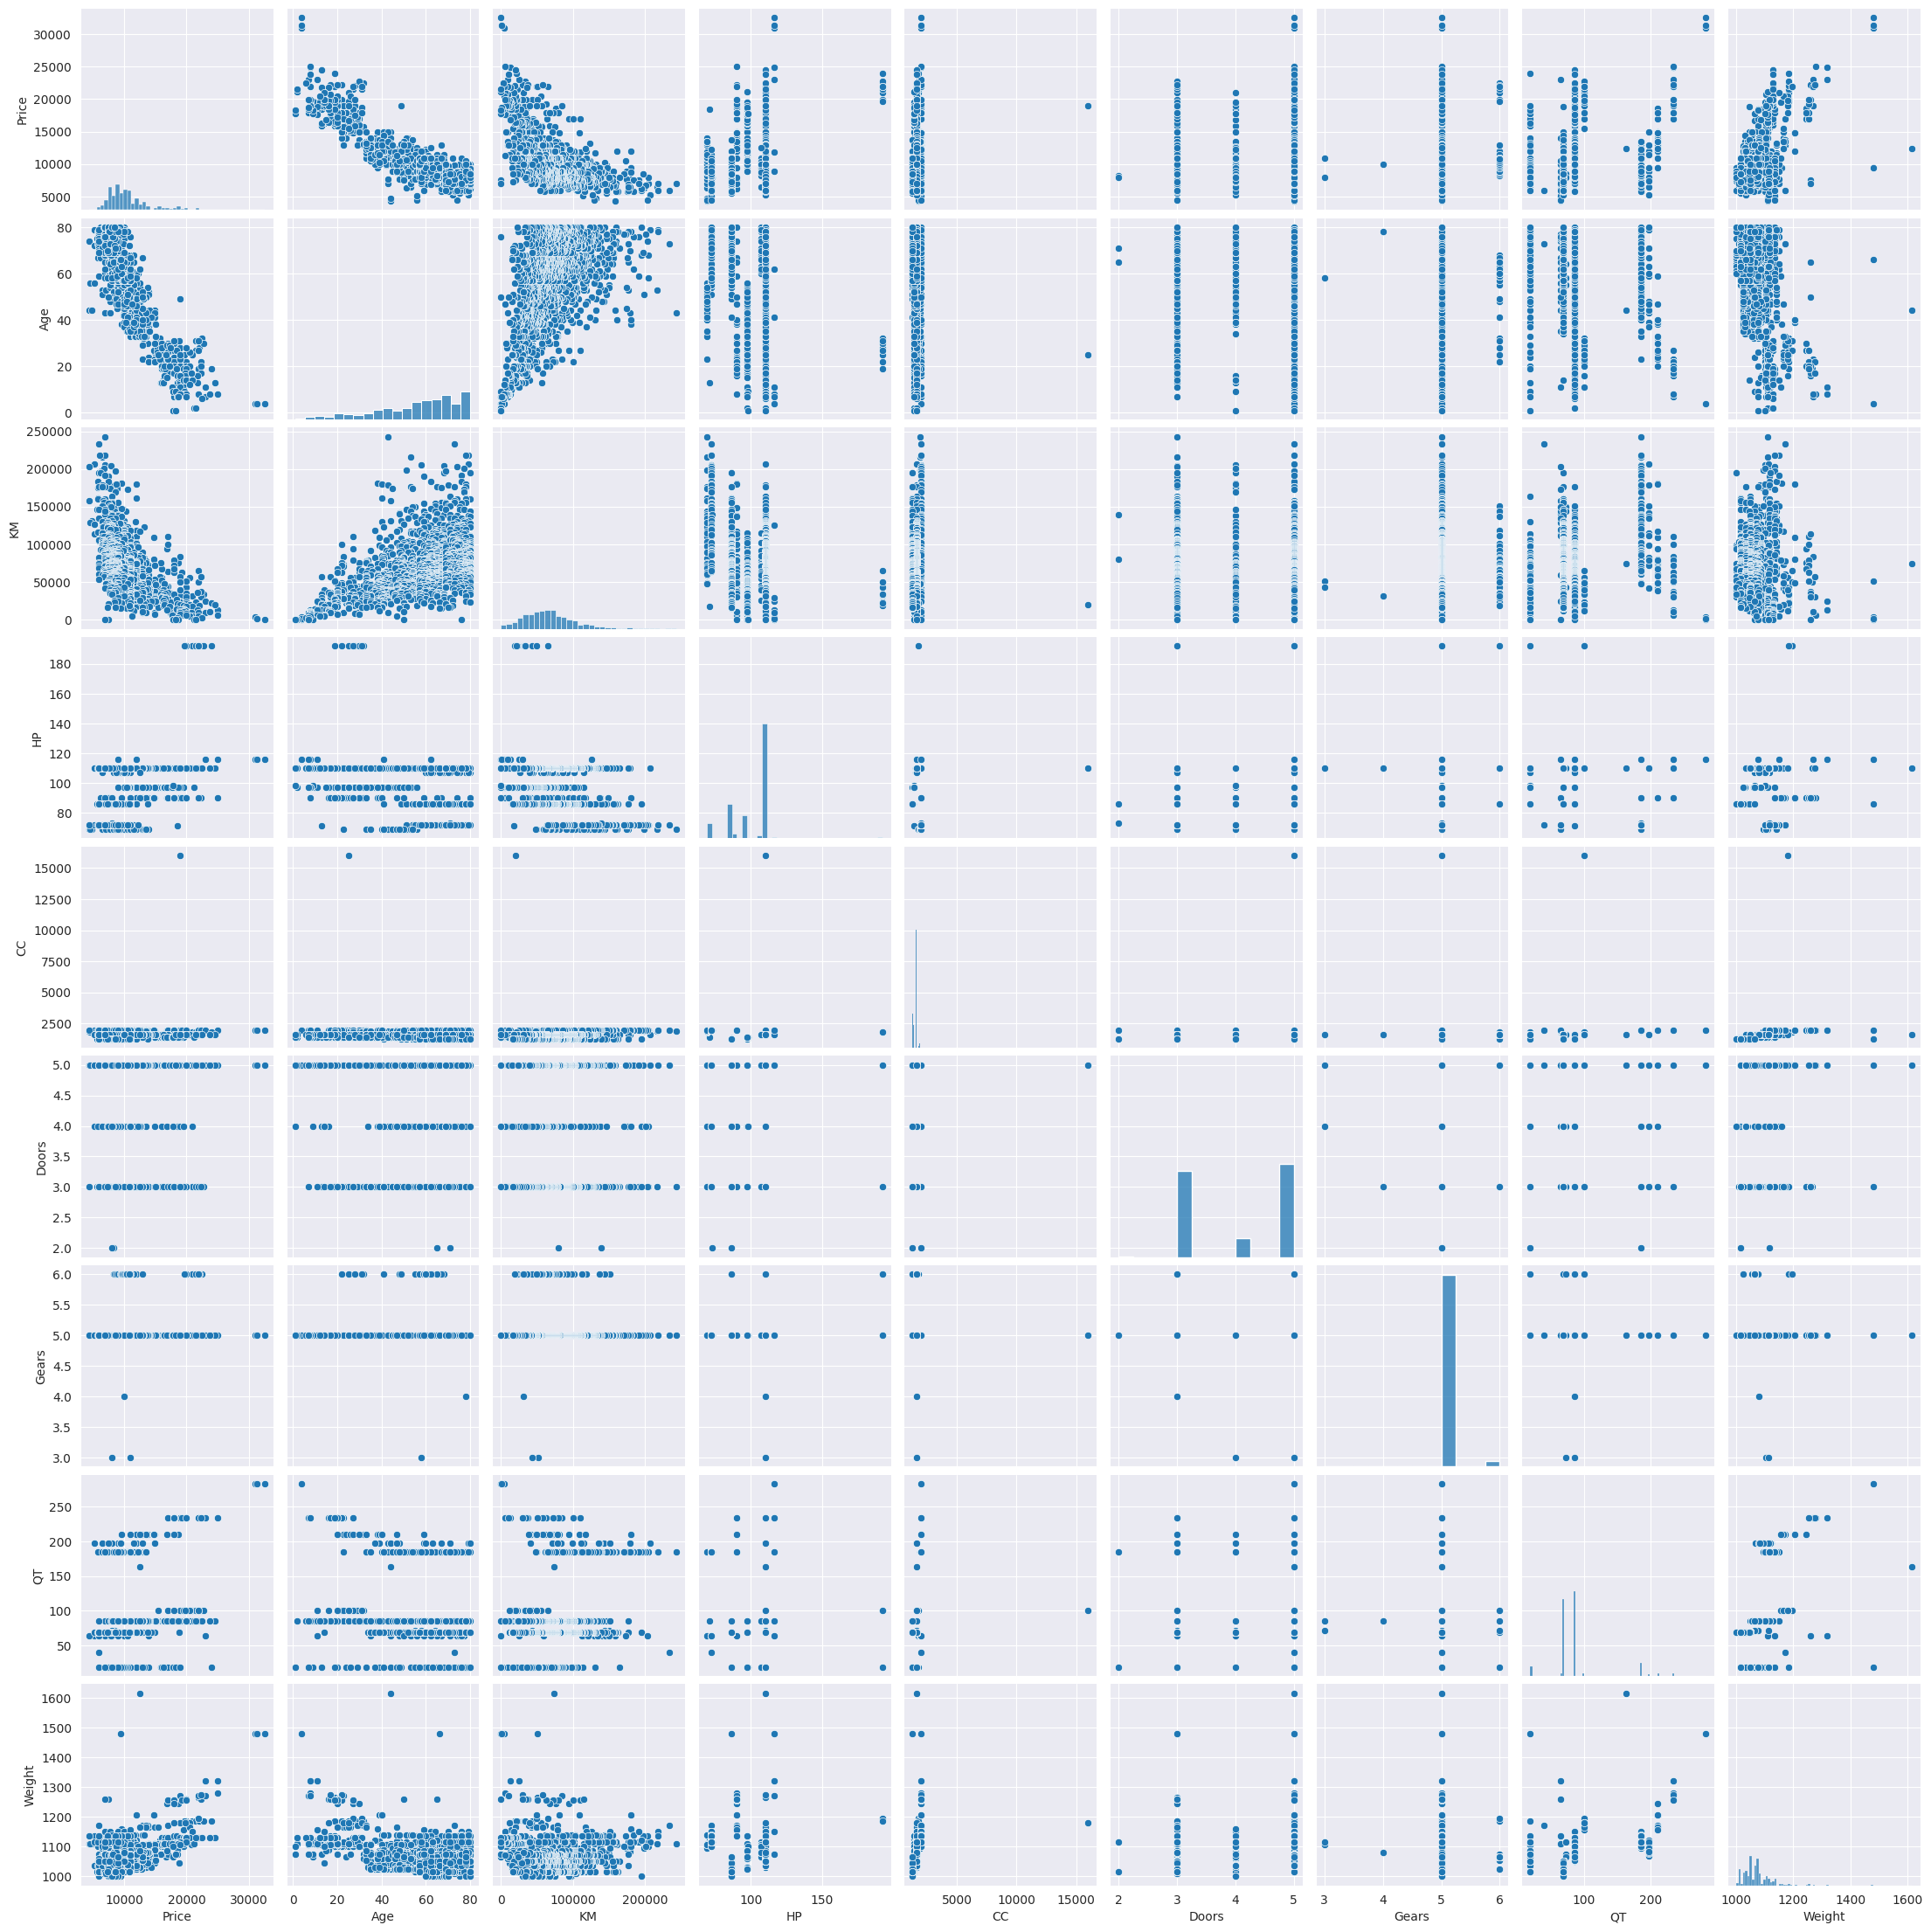

In [163]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(n_data)

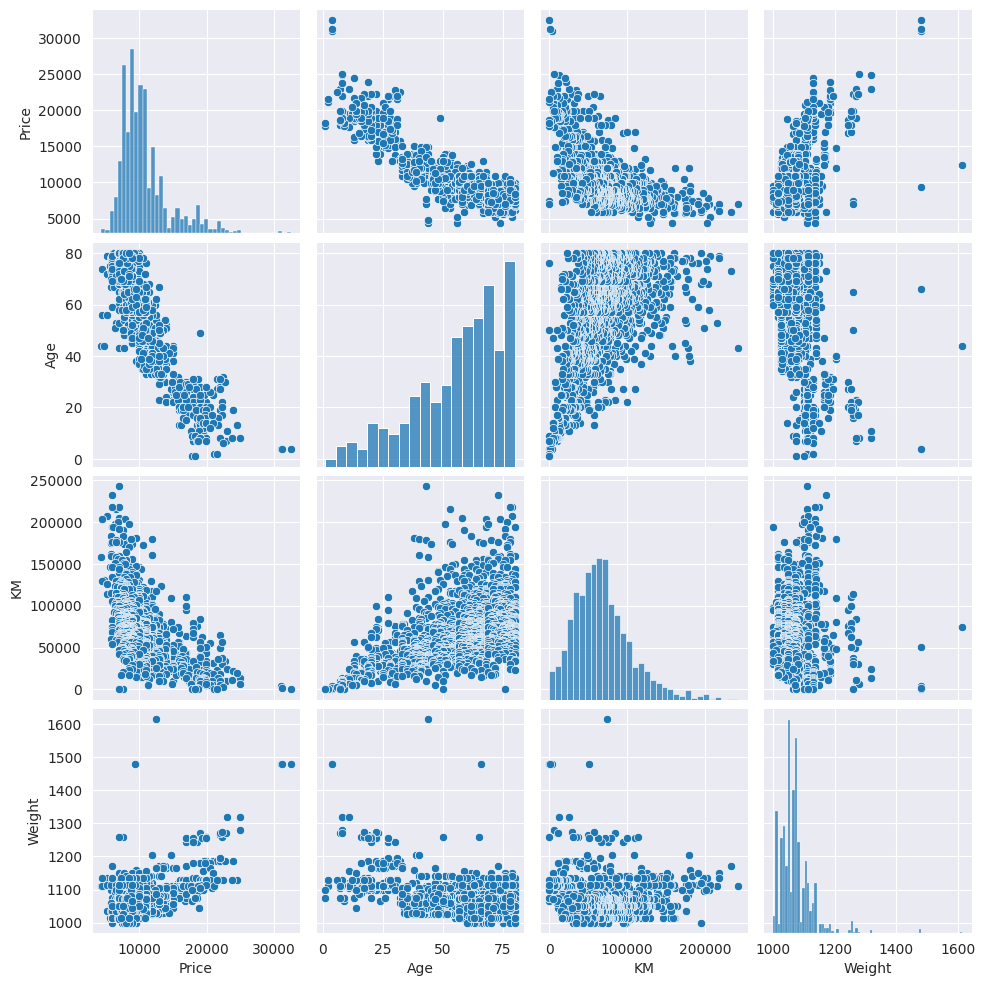

In [164]:
sns.set_style(style='darkgrid')
sns.pairplot(n_data[continuous_feature])

Age and KM has the highest score of correlation with Price but a negative correlation

QT and Weight also have a collinearity among themselves which will affect our model.

KM and Age also have a collinearity among themselves which will affect our model.

##PCA on Standard Scaled Dataset

seperate the x and y values

In [165]:
df_standard_scaled.head()

Price       Age        KM        HP        CC     Doors     Gears  \
0  1.057454 -1.915503  0.136289 -0.883769  2.526466 -1.067888 -0.137393   
1  1.446875 -1.746462 -0.576515 -0.883769  2.526466 -1.067888 -0.137393   
2  1.057454 -1.521074 -0.848065 -0.883769  2.526466 -1.067888 -0.137393   
3  0.797839 -1.408380 -0.204921 -0.883769  2.526466 -1.067888 -0.137393   
4  2.079684 -1.690115  0.755851 -0.883769  2.526466 -1.067888 -0.137393   

         QT    Weight  
0  3.424789  2.456469  
1  3.424789  2.456469  
2  3.424789  2.580538  
3  3.424789  2.580538  
4  3.424789  4.441570

In [166]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

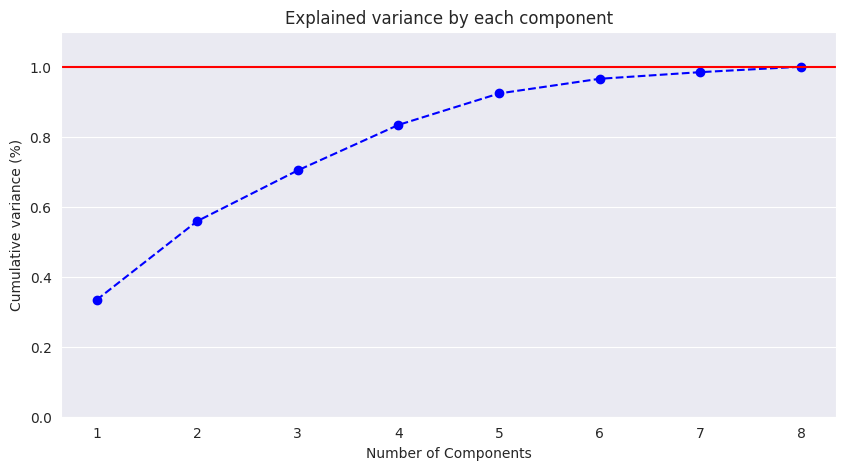

In [167]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [168]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.33354904, 0.22519775, 0.1451224 , 0.12991156, 0.08985917,
       0.04191581, 0.01895074, 0.01549353])

Text(0.5, 1.0, 'Explained variance by each component')

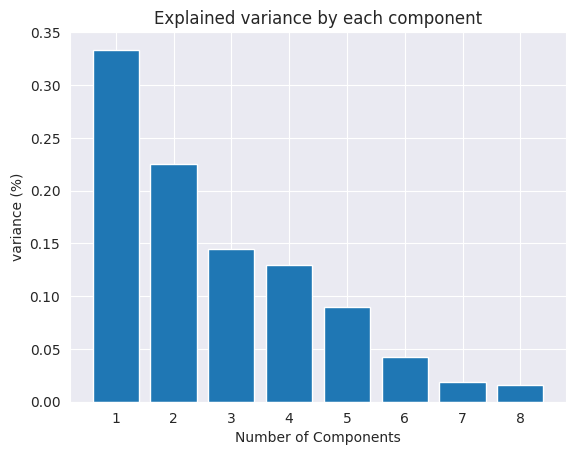

In [169]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [170]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 33.35,  55.87,  70.38,  83.37,  92.36,  96.55,  98.45, 100.  ])

In [171]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(1330, 8)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.829707  0.064931 -0.190264 -2.190636  1.159079  0.025216 -0.015311   
1  4.679884  0.404151 -0.150193 -2.314266  1.205529 -0.589953 -0.009888   
2  4.660639  0.468144 -0.154145 -2.295954  1.226273 -0.921497  0.114514   
3  4.744045  0.012750 -0.214820 -2.074836  1.192697 -0.529197  0.180736   
4  5.995403 -0.033057 -0.328856 -1.946975  1.098213  0.357084  1.346511   

        PC8  
0 -0.514560  
1 -0.474104  
2 -0.377730  
3 -0.380472  
4  0.465162

In [172]:
dataframe.Price

0       13750
1       14950
2       13750
3       12950
4       16900
        ...  
1325     8450
1326     7500
1327    10845
1328     8500
1329     7250
Name: Price, Length: 1330, dtype: int64

In [173]:
pca_std_df['Price'] = y
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.829707  0.064931 -0.190264 -2.190636  1.159079  0.025216 -0.015311   
1  4.679884  0.404151 -0.150193 -2.314266  1.205529 -0.589953 -0.009888   
2  4.660639  0.468144 -0.154145 -2.295954  1.226273 -0.921497  0.114514   
3  4.744045  0.012750 -0.214820 -2.074836  1.192697 -0.529197  0.180736   
4  5.995403 -0.033057 -0.328856 -1.946975  1.098213  0.357084  1.346511   

        PC8     Price  
0 -0.514560 -1.915503  
1 -0.474104 -1.746462  
2 -0.377730 -1.521074  
3 -0.380472 -1.408380  
4  0.465162 -1.690115

In [174]:
import statsmodels.formula.api as sm
pca_model= sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.393e+31
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:58   Log-Likelihood:                 43515.
No. Observations:                1330   AIC:                        -8.701e+04
Df Residuals:                    1321   BIC:                        -8.697e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.061e-15   4.11e-17     25.793      0.000     9.8e-16    1.14e-15
PC1           -0.1952   2.52e-17  -7.76e+15      0.000      -0.195      -0.195
PC2           -0.5630   3.06e-17  -1.84e+16      0.000      -0.563      -0.563
PC3           -0.0925   3.82e-17  -2.42e+15      0.000      -0.092      -0.092
PC4            0.4131   4.03e-17   1.02e+16      0.000       0.413       0.413
PC5            0.0314   4.85e-17   6.48e+14      0.000       0.031       0.031
PC6           -0.6137    7.1e-17  -8.64e+15      0.000      -0.614      -0.614
PC7            0.2681   1.06e-16   2.54e+15      0.000       0.268       0.268
PC8            0.1273   1.17e-16   1.09e+15      0.000       0.127       0.127
==============================================================================
Omnibus:                      116.948   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.485
Skew:                           0.620   Prob(JB):                     1.31e-43
Kurtosis:                       4.424   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  1.0
R2_Adjusted_score :  1.0
RMSE :  6012.984866656376


In [176]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.829707  0.064931 -0.190264 -2.190636  1.159079  0.025216 -0.015311   
1  4.679884  0.404151 -0.150193 -2.314266  1.205529 -0.589953 -0.009888   
2  4.660639  0.468144 -0.154145 -2.295954  1.226273 -0.921497  0.114514   
3  4.744045  0.012750 -0.214820 -2.074836  1.192697 -0.529197  0.180736   
4  5.995403 -0.033057 -0.328856 -1.946975  1.098213  0.357084  1.346511   

        PC8  Price  
0 -0.514560  13750  
1 -0.474104  14950  
2 -0.377730  13750  
3 -0.380472  12950  
4  0.465162  16900

In [177]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((931, 8), (399, 8), (931,), (399,))

In [178]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1))
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [179]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9010967686242178
R2_score (train):  0.9058327433544345
R2_score (test):  0.8859113536009
RMSE using all features:  1044.486068620271


##Forward Selection

In [180]:
X = dataframe.drop('Price', axis =1)
Y = dataframe[['Price']]

In [181]:
#find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [182]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((931, 8), (399, 8), (931, 1), (399, 1))

In [183]:
# step forward feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(RandomForestRegressor(),
           k_features=4,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=3)

In [184]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(),
           k_features=4,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train), y_train)


[2023-09-01 17:14:03] Features: 1/4 -- score: 0.859286664812021
[2023-09-01 17:14:07] Features: 2/4 -- score: 0.8844777226886519
[2023-09-01 17:14:11] Features: 3/4 -- score: 0.9056413207088081
[2023-09-01 17:14:15] Features: 4/4 -- score: 0.9085907265036459

In [185]:
sfs1.k_feature_idx_

(0, 1, 3, 7)

In [186]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age', 'KM', 'CC', 'Weight'], dtype='object')

##Regularization

In [187]:
#checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'Price ~ Age + KM + HP + CC + Doors + Weight + QT + Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]})
print(coef_df)

         coef         err varname
0 -108.257335    4.277641     Age
1   -0.015465    0.002046      KM
2    7.853334    5.958445      HP
3   -2.273119    0.571776      CC
4 -149.187276   63.623867   Doors
5   36.976781    2.837352  Weight
6  -11.618726    3.190591      QT
7  251.436316  320.864248   Gears


<Axes: title={'center': 'Modal Coefficients'}, xlabel='varname'>

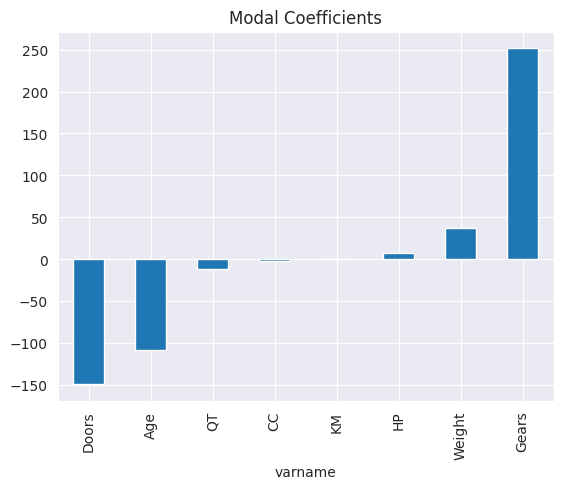

In [188]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

##Ridge Regression

In [189]:
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from  sklearn.preprocessing import normalize

## training the model

ridgeReg = Ridge(alpha=0.05)

ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05)

The value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually

In [190]:
print('sklearn' , sklearn.__version__)
#print('Ridge' , Ridge.__version__)
#print('openCV',cv2.__version__)

sklearn 1.2.2


In [191]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.9010968049811842
R2_score (train):  0.9058327430164795
R2_score (test):  0.8859107588146694
RMSE:  1044.4887912624513


In [192]:
ridgeReg.coef_.flatten()

array([-1.10797340e+02, -1.60318151e-02,  5.87050780e+00, -1.93704939e+00,
       -1.21348232e+02,  1.82078855e+02, -1.17576167e+01,  3.51679959e+01])

In [193]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef varname
0 -110.797340     Age
1   -0.016032      KM
2    5.870508      HP
3   -1.937049      CC
4 -121.348232   Doors
5  182.078855   Gears
6  -11.757617      QT
7   35.167996  Weight


<Axes: title={'center': 'alpha = 0.01'}, xlabel='varname'>

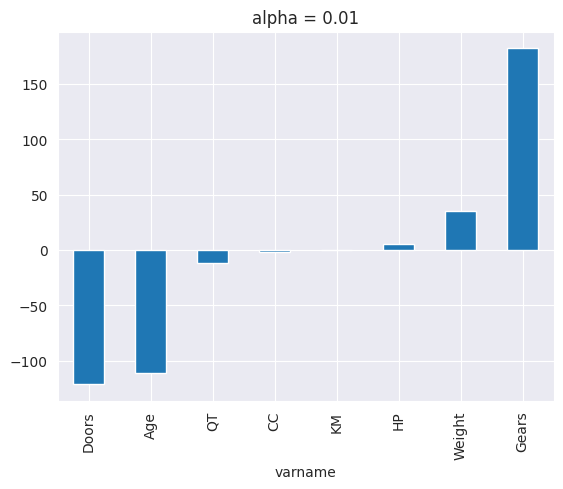

In [194]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()
coef.plot(kind='bar', title='alpha = 0.01')

<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

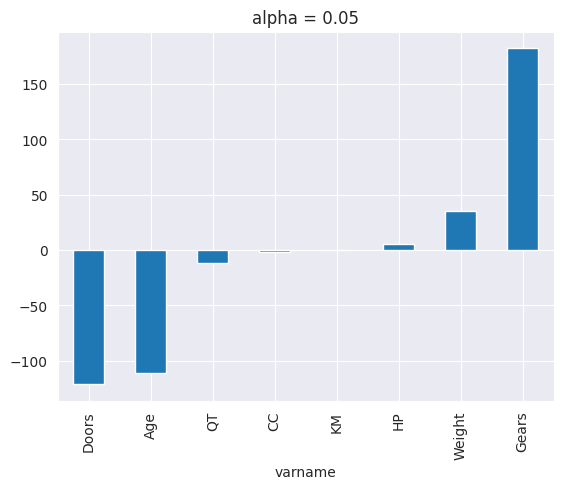

In [195]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

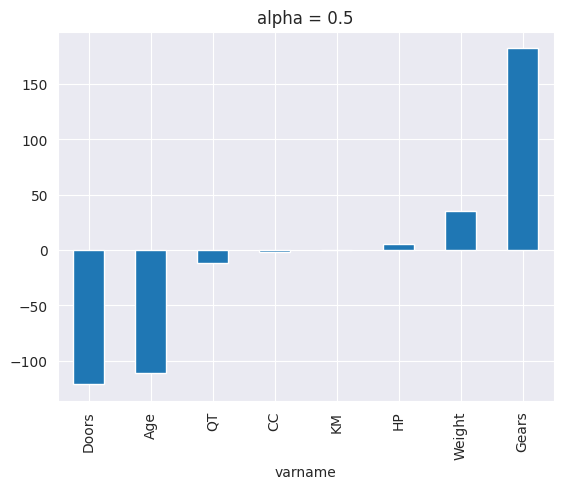

In [196]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

<Axes: title={'center': 'alpha = 5'}, xlabel='varname'>

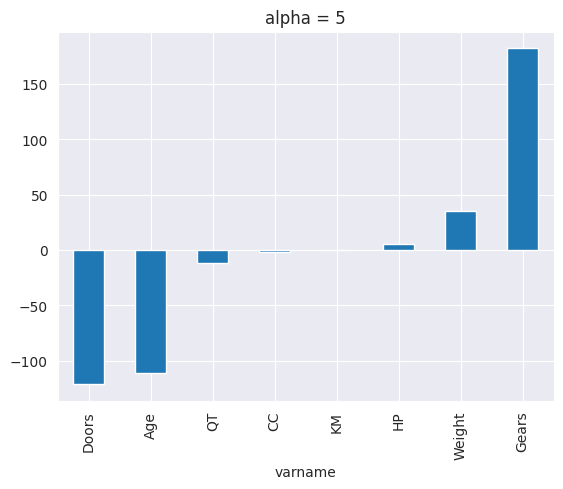

In [197]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5')

<Axes: title={'center': 'alpha = 10'}, xlabel='varname'>

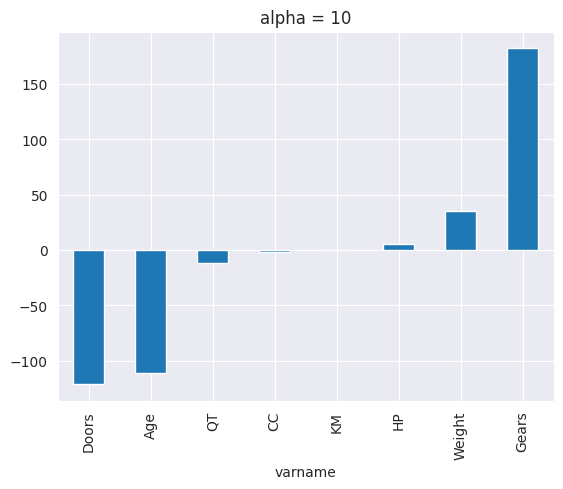

In [198]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10')

As we increase the value of alpha, the magnitude of the coefficients decreases.

But if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha=0.05. So we have to choose it wisely by iterating it through a range of values and using the one which gives us lowest error.

In [199]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [200]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results

cv_ridge = cross_val_score(estimator = ridge_pipe, X = x_train, y = y_train.values.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)


CV:  0.8866230882383886
R2_score (train):  0.9209526910958892
R2_score (test):  0.8987821125529671
RMSE:  983.8073715686073


Here, again I will train a Ridge Linear regression and select the non zero features in one line.

the linear regression object from sklearn does not allow for regularisation.

So If we want to make a regularised linear regression need to import specifically "Ridge" that is the l1 version of the linear regression

alpha is the penalisation here, so I set it high in order to force the algorithm to shrink some coefficients

In [201]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

total features: 8
selected features: 3
Index(['Age', 'Doors', 'Gears'], dtype='object')


It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

It reduces the model complexity by coefficient shrinkage.

It uses L2 regularization technique

##Lasso Regression

Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting.

In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors.

From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [202]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge

lassoReg = Lasso(alpha=0.5)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

In [203]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.9010917952587484
R2_score (train):  0.9058318653979672
R2_score (test):  0.8858757584694079
RMSE:  1044.6489933314072


In [204]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef varname
0 -110.800687     Age
1   -0.016027      KM
2    5.909473      HP
3   -1.937800      CC
4 -121.282989   Doors
5  165.834692   Gears
6  -11.744417      QT
7   35.158588  Weight


<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

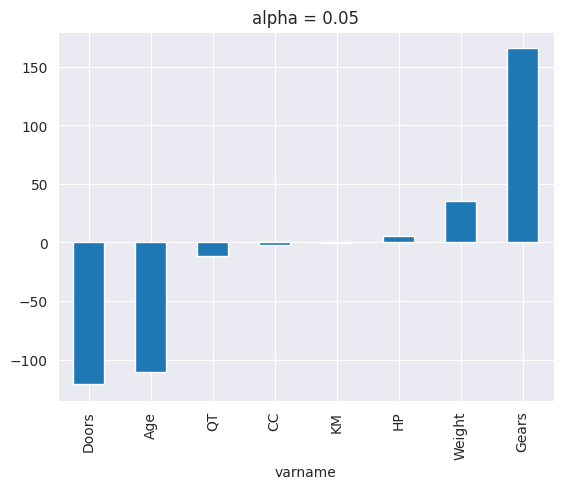

In [205]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

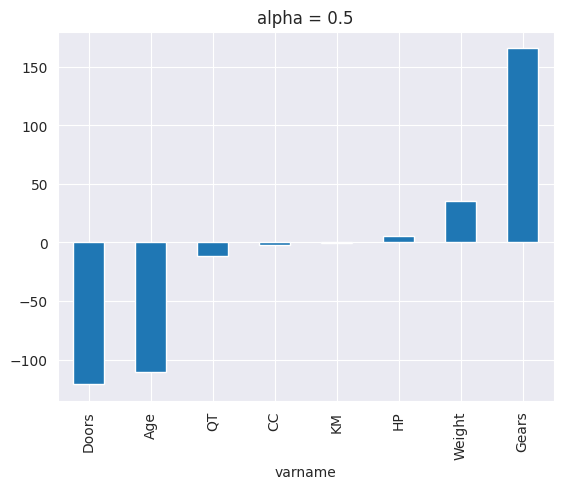

In [206]:
#checking the magnitude of coefficients
coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')


Even at small values of alpha, the magnitude of coefficients have reduced a lot.

Difference between ridge and lasso

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if we see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes.

Therefore, lasso selects the only some feature while reduces the coefficients of others to zero.

This property is known as feature selection and which is absent in case of ridge.

In [207]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [208]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.8868613507163357
R2_score (train):  0.920892824744604
R2_score (test):  0.8991355999668053
RMSE:  982.0879734916061


In [209]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

Here, again we will train a Lasso Linear regression and select the non zero features in one line.

the linear regression object from sklearn does not allow for regularisation.

So If we want to make a regularised linear regression need to import specifically "Lasso" that is the l1 version of the linear regression

alpha is the penalisation here, so I set it high in order to force the algorithm to shrink some coefficient

In [210]:
sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [211]:
sel_lasso.get_support()

array([ True,  True,  True,  True, False, False,  True,  True])

In [212]:
#make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 8
selected features: 6
features with coefficients shrank to zero: 2


##Model Validation

Comparing different models with respect to their Root Mean Squared Errors

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value

In [213]:
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.9001980293966751
R2_Adjusted_score :  0.8996695772073988
RMSE :  973.4891302577998


In [214]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age','Weight','KM','HP','CC','Doors']]))

In [215]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [216]:
print('Raw Model=', np.sqrt(ndata_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 976.7658733249547 
After Removing Influencers= 975.9271399262798 
After Log Transformation on both Model= 1795.826559210394 
After Cube-root Transformation on both Model= 1152.5577948742425 
After Sqaure Root Transformation on both Model= 1010.8979447569402 
After Removing Influencers from model 975.9271399262798 
Final Model without Multicollinearity Model= 973.4891302577998


###Compare the Root Mean Squared Error and check for the minimum value

In [217]:
rmse_compare = {'Raw Model': np.sqrt(ndata_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'Final Model without Multicollinearity Model'

The Model that was build without Multicollinearity Issue and using Standard Scaler Transformation performed very well.

Scoring minimumn Root mean squared error and a good R-squared and adjusted R-square

In [219]:
Final_model = sm.ols("y~Age+KM+HP+CC+Doors+QT+Weight",data=X).fit()
# Finding rsquared values
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1703.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:15:22   Log-Likelihood:                -11039.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1322   BIC:                         2.214e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.75e+04   1319.793    -13.257      0.000   -2.01e+04   -1.49e+04
Age         -108.2237      2.182    -49.609      0.000    -112.503    -103.944
KM            -0.0154      0.001    -14.750      0.000      -0.017      -0.013
HP             8.7091      2.987      2.915      0.004       2.849      14.570
CC            -2.3113      0.291     -7.955      0.000      -2.881      -1.741
Doors       -159.3409     31.769     -5.016      0.000    -221.663     -97.018
QT           -11.4610      1.624     -7.057      0.000     -14.647      -8.275
Weight        37.0835      1.445     25.656      0.000      34.248      39.919
==============================================================================
Omnibus:                        4.861   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.872
Skew:                           0.148   Prob(JB):                       0.0875
Kurtosis:                       2.984   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Residual Analysis

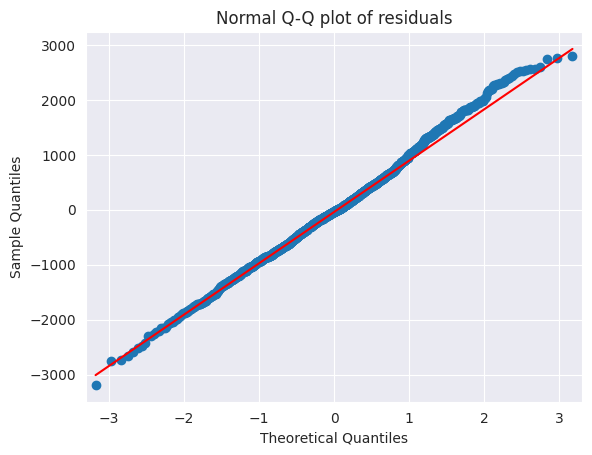

In [220]:
#Residuals values  = y - yhat
import statsmodels.api as sm

sm.qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

##Residual Plot for Homoscedasticity

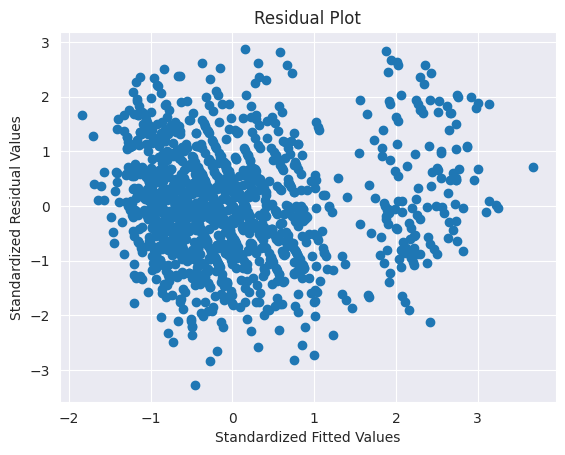

In [221]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()



plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

##Residual VS Regressors

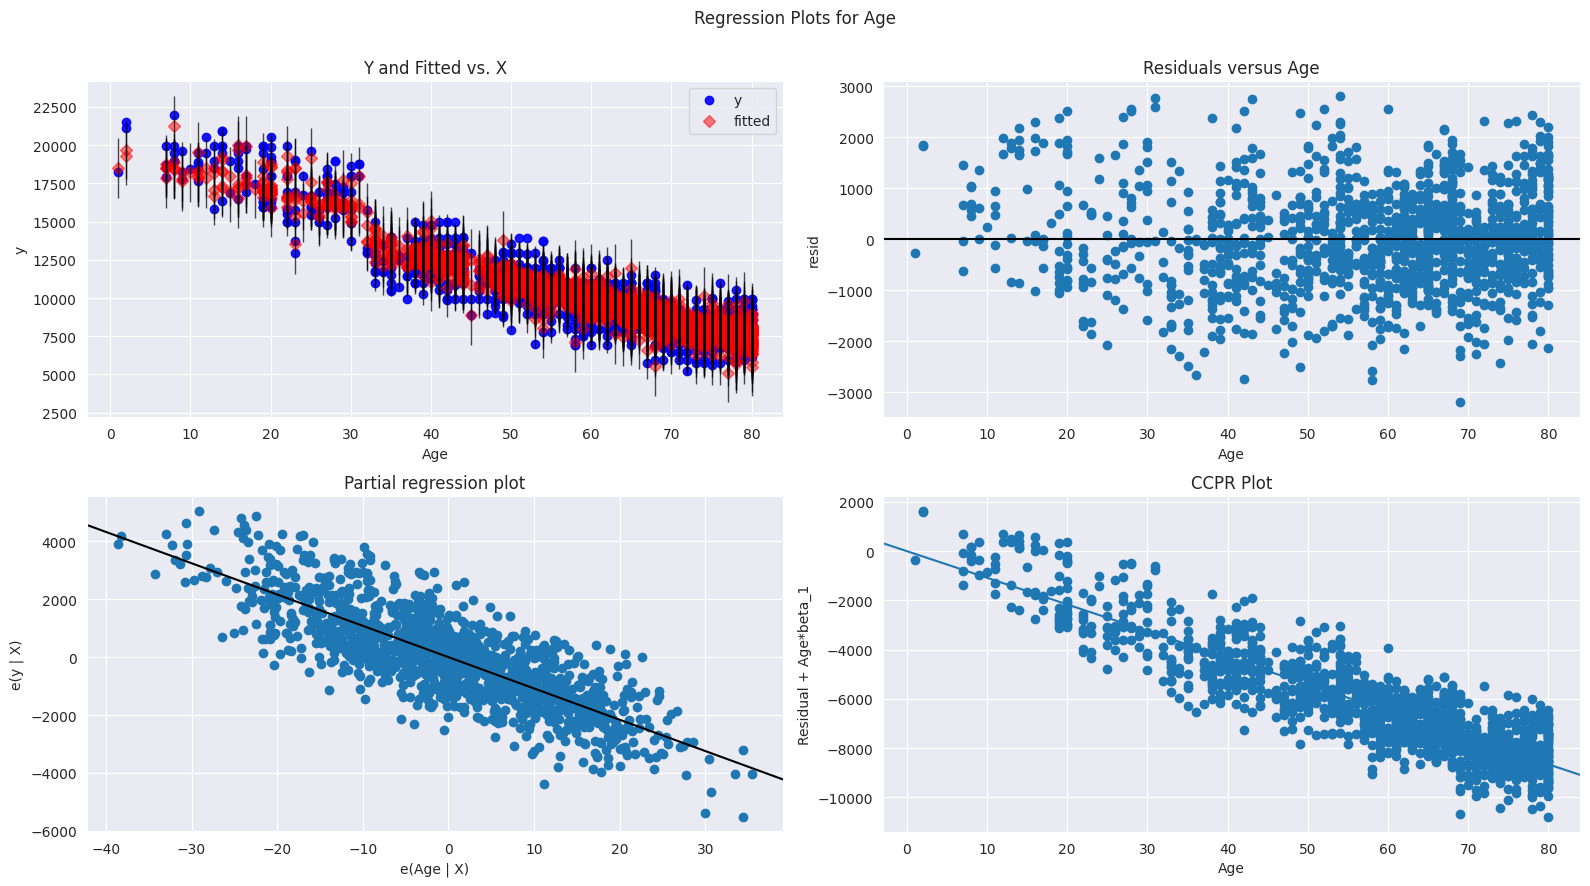

In [222]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

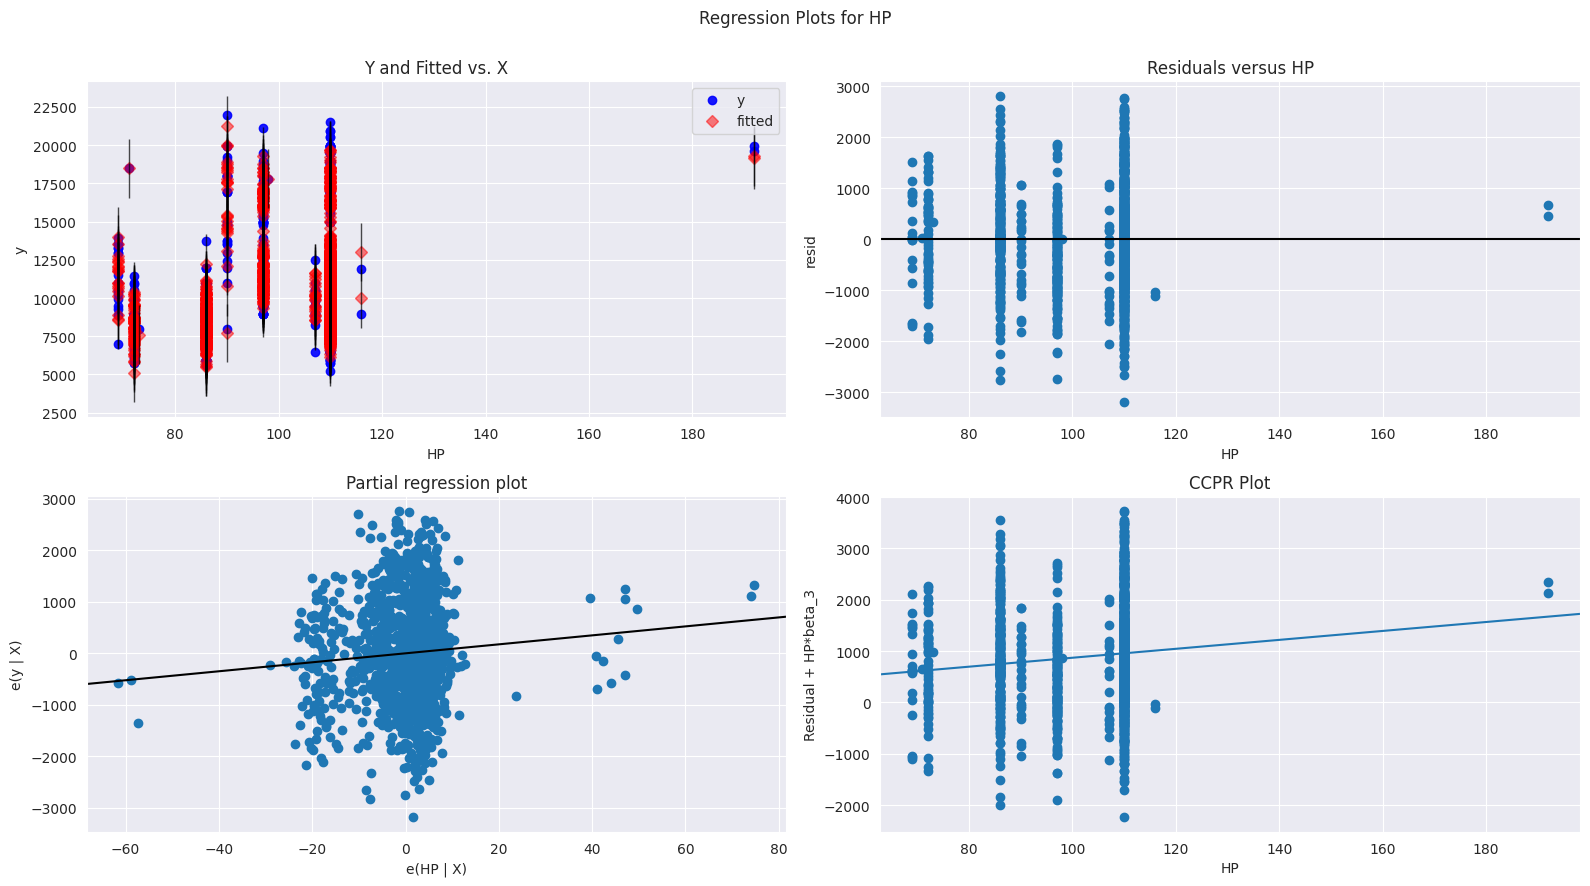

In [223]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

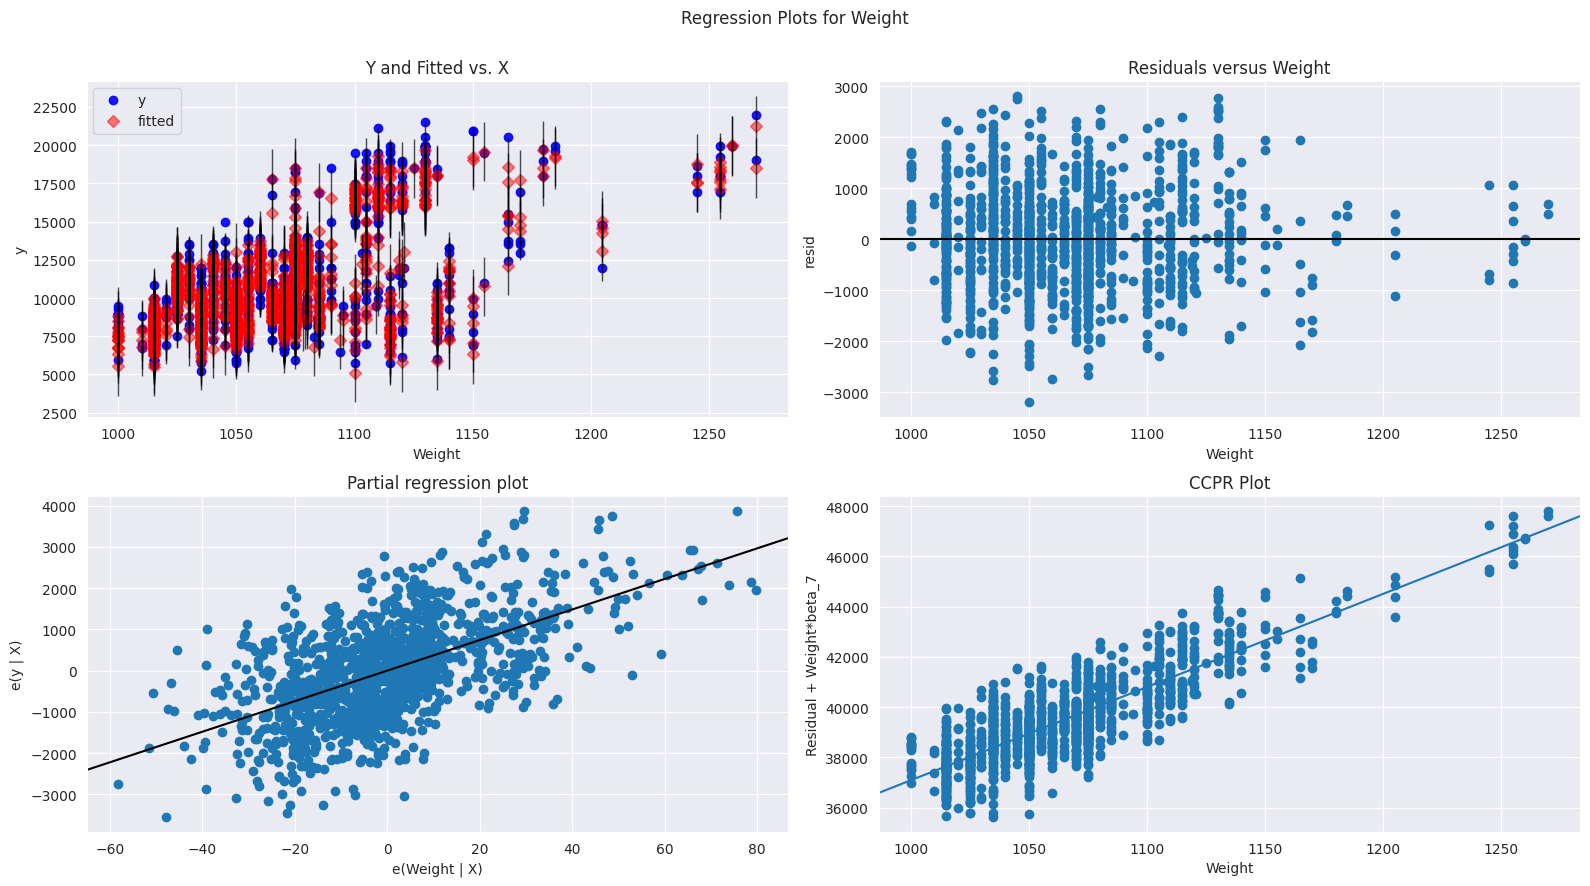

In [224]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

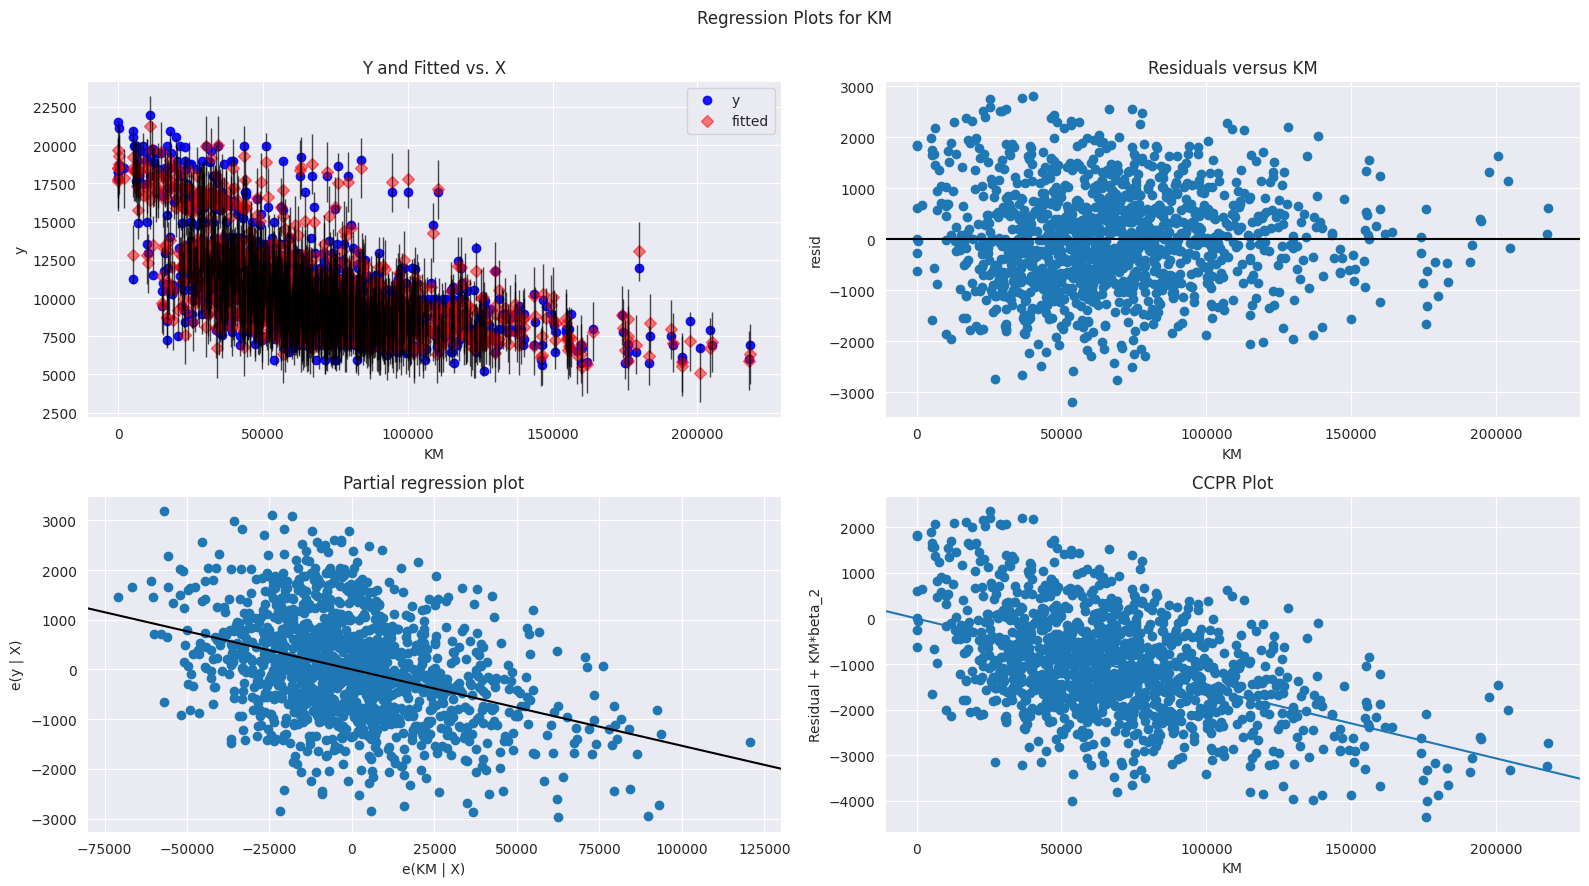

In [225]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

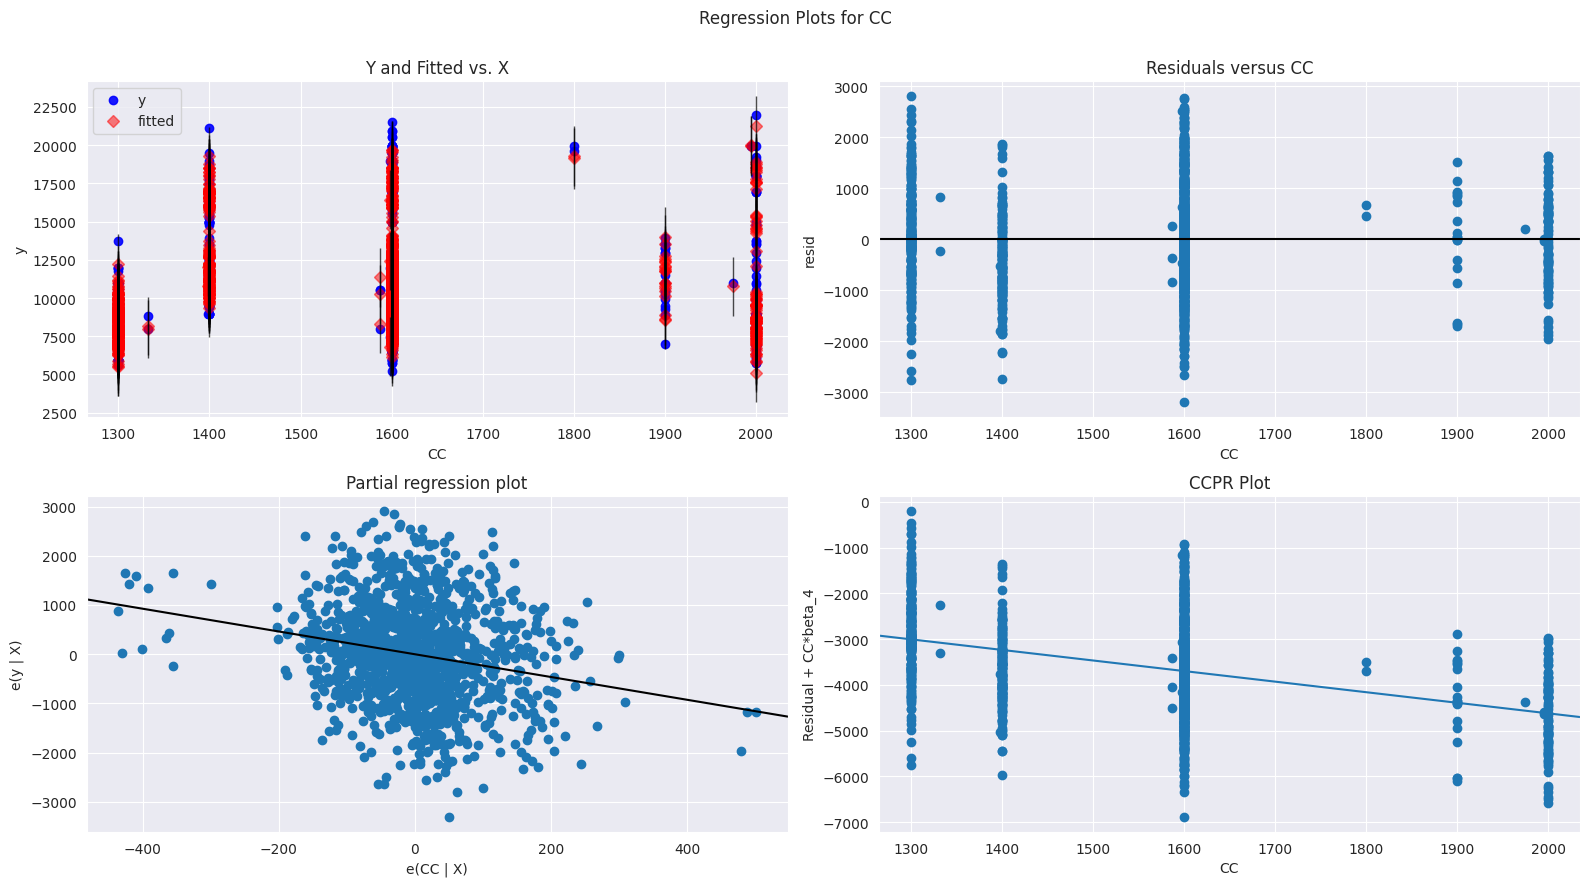

In [226]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

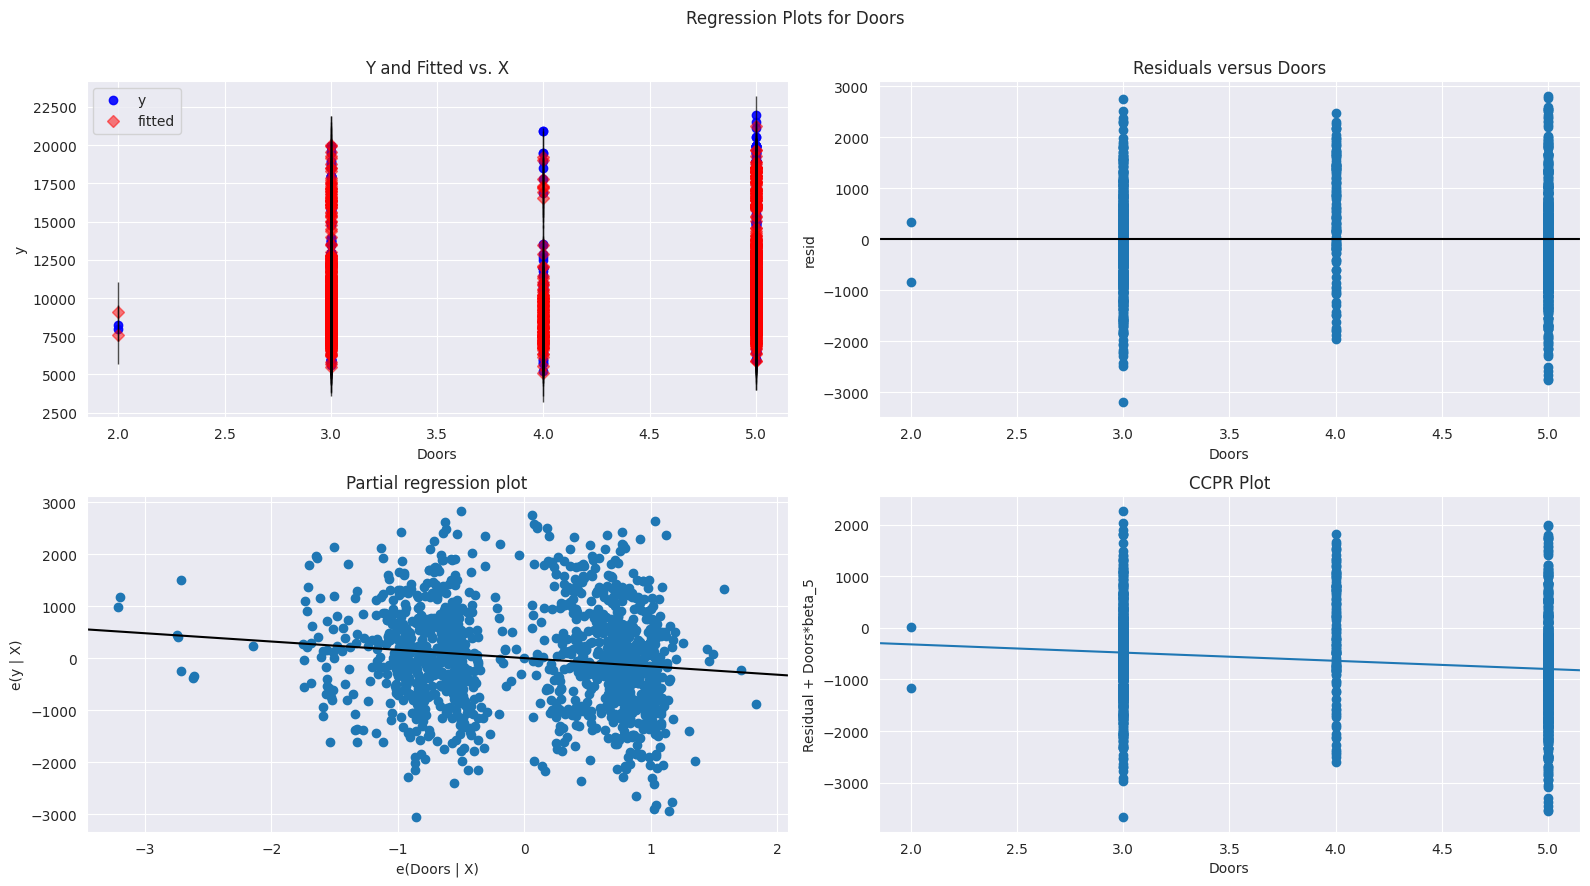

In [227]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

Some of the feature doesn't suggest linear relationship with the Dependent feature like Gears, QT, CC, Doors, Weight and HP

Only KM and Age is having a linear relation with the Price Feature

##Predicting values from Model using same dataset

In [228]:

x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[-52623626.22384399],
       [-52679966.16046348],
       [-52740940.52359789],
       ...,
       [-53812709.03927291],
       [-53793915.13791829],
       [-53775123.78406814]])

In [229]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

53918144.91267735

In [230]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted

Predicted_Price  Price  Age     KM  Weight  HP    CC   QT  Doors
0       -5.262363e+07  13750   23  72937    1165  90  2000  210      3
1       -5.267997e+07  14950   26  48000    1165  90  2000  210      3
2       -5.274094e+07  13750   30  38500    1170  90  2000  210      3
3       -5.277855e+07  12950   32  61000    1170  90  2000  210      3
4       -5.247198e+07  16900   27  94612    1245  90  2000  210      3
...               ...    ...  ...    ...     ...  ..   ...  ...    ...
1325    -5.396304e+07   8450   80  23000    1015  86  1300   69      3
1326    -5.372798e+07   7500   69  20544    1025  86  1300   69      3
1327    -5.381271e+07  10845   72  19000    1015  86  1300   69      3
1328    -5.379392e+07   8500   71  17016    1015  86  1300   69      3
1329    -5.377512e+07   7250   70  16916    1015  86  1300   69      3

[1330 rows x 9 columns]

In [231]:
models={'Different_Models':['Raw_data_Model','After_Removing_Influencers','After_Log Transformation_Model','After_Cube-root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[ndata_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_1.rsquared],
        'R_squared_adjusted':[ndata_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
       'RMSE':[np.sqrt(ndata_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table=pd.DataFrame(models)
model_table

Different_Models  R_squared  R_squared_adjusted  \
0                               Raw_data_Model   0.900224            0.899620   
1                   After_Removing_Influencers   0.900376            0.899773   
2               After_Log Transformation_Model   0.767907            0.766855   
3         After_Cube-root_Transformation_Model   0.857248            0.856384   
4       After_Sqaure_Root_Transformation_Model   0.881555            0.880837   
5  Final_Model_without_Multicollinearity_Model   0.900198            0.899670   

          RMSE  
0   976.765873  
1   975.927140  
2  1795.826559  
3  1152.557795  
4  1010.897945  
5   973.489130

##Visualizing Models Performance

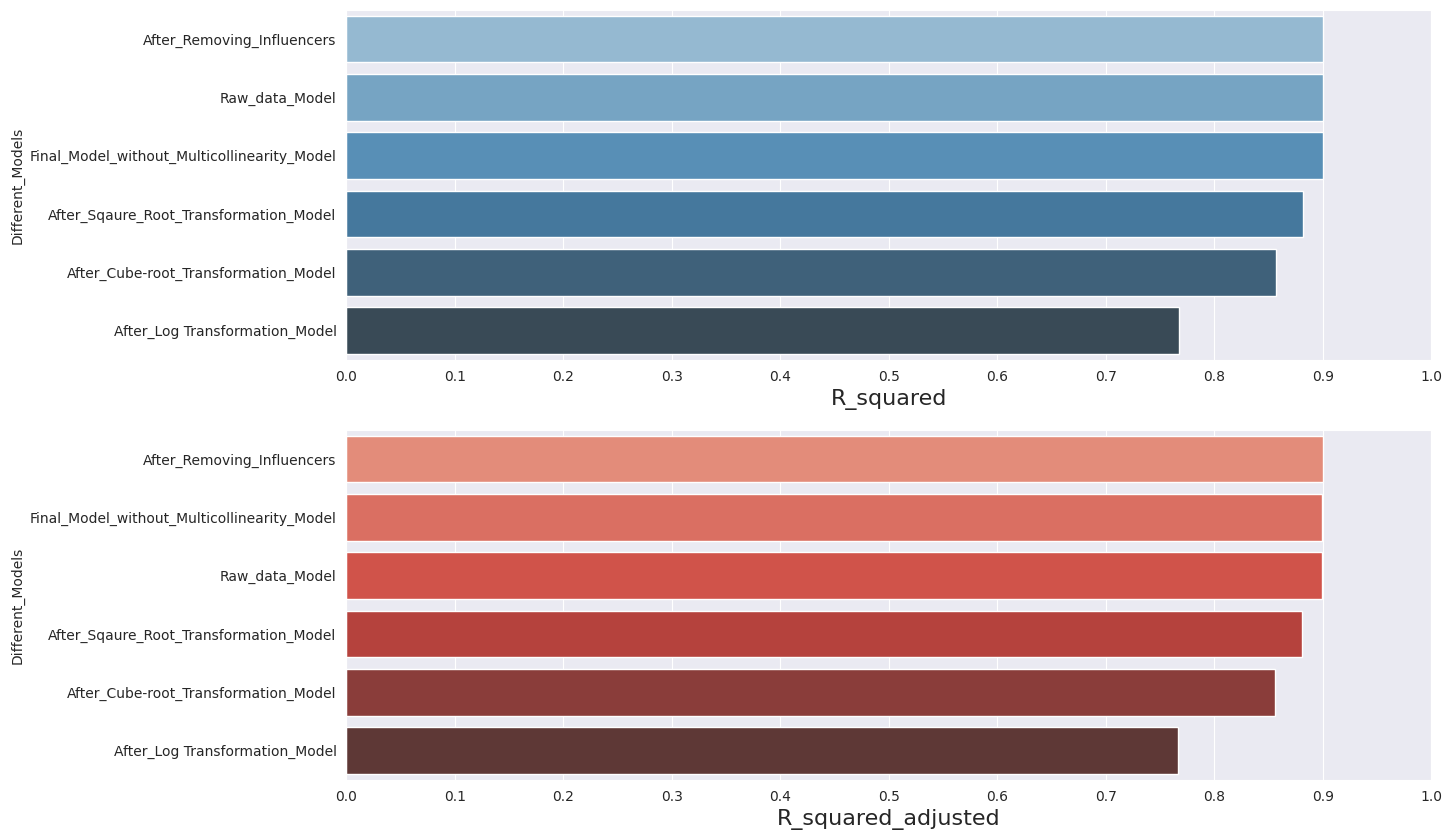

In [232]:

f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

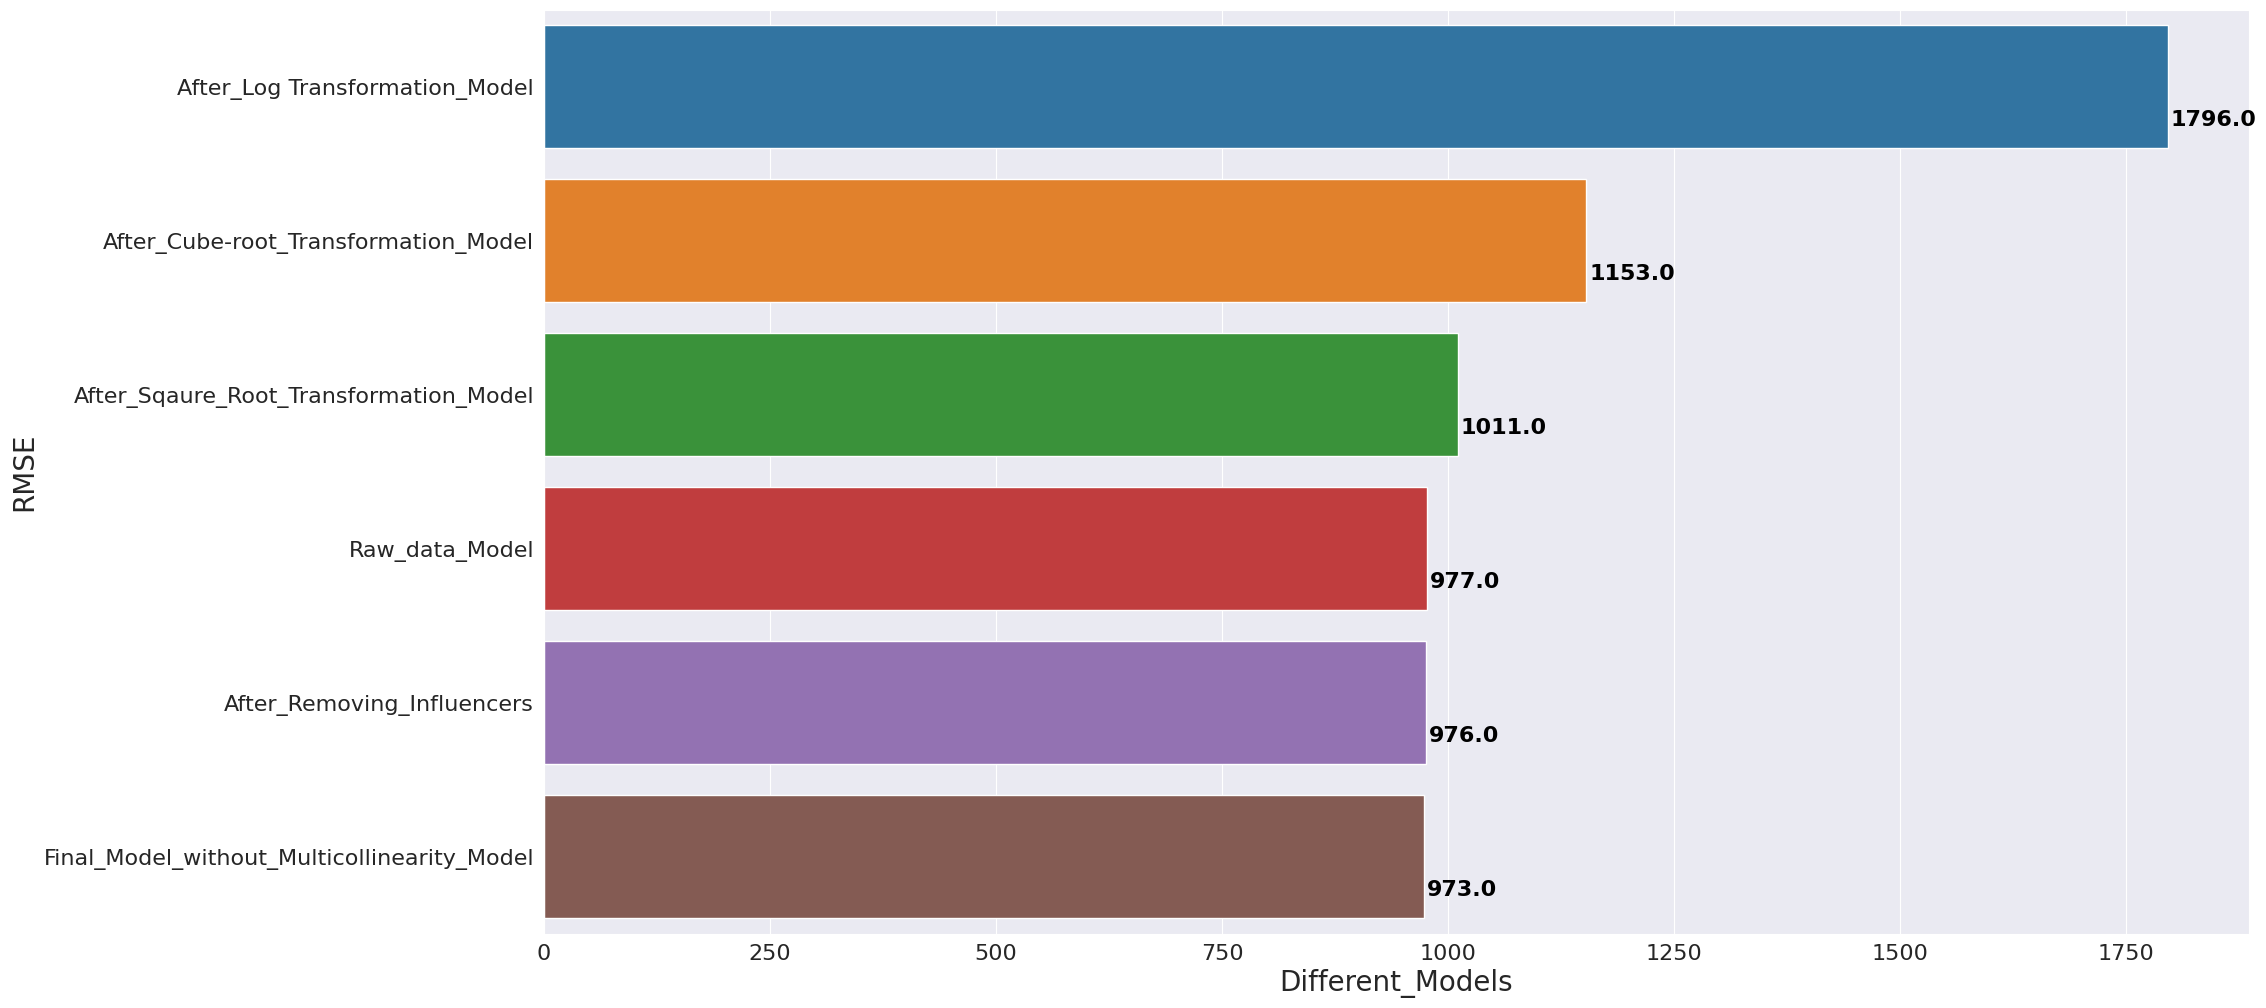

In [233]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(22,12))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

In [235]:
x_train.shape

(931, 8)

In [236]:
#Linear Regression
reg_model = LinearRegression().fit(x_train, y_train)
print(reg_model.score(x_train, y_train),reg_model.score(x_test, y_test))

0.9058327433544346 0.8859113536009003


In [237]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(random_state=1).fit(x_train, y_train)
print(gd_model.score(x_train, y_train),gd_model.score(x_test, y_test))

0.9468993459075202 0.9057740529602339


In [238]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)
print(rfr_model.score(x_train, y_train),rfr_model.score(x_test, y_test))

0.9869709995485009 0.8929708659923393


In [239]:
print('Linear Regression Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, reg_model.predict(x_test))))
print('Gradient Booster Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, gd_model.predict(x_test))))
print('Random Forest Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rfr_model.predict(x_test))))

Linear Regression Root Mean Squared Error: 1044.4860686202694
Gradient Booster Regressor Root Mean Squared Error: 949.2195920340561
Random Forest Regressor Root Mean Squared Error: 1011.6550265508564
